# Selectivity of MOFs

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/henry-constants-for-coremofs-csv/Henry constants for COREMOFs.csv")

In [4]:
sns.set()

In [5]:
df.head()

MOF name   CSD Refcode Database  Acronym Generic Identity  Calculation Type  \
0   ABAVIJ  ABAVIJ_clean         CoRE 2019             Real  Machine Learning   
1   ABAYIO  ABAYIO_clean         CoRE 2019             Real  Machine Learning   
2   ABAYOU  ABAYOU_clean         CoRE 2019             Real  Machine Learning   
3   ABESUX  ABESUX_clean         CoRE 2019             Real  Machine Learning   
4   ABETAE  ABETAE_clean         CoRE 2019             Real  Machine Learning   

    Density  Gravimetric Surface Area  Volumetric Surface Area  Void Fraction  \
0  1.524930                     0.000                     0.00         0.3792   
1  0.949126                  1505.310                  1428.73         0.6636   
2  0.979267                  1494.400                  1463.42         0.6638   
3  3.742910                   466.934                  1747.69         0.5646   
4  3.699280                   492.461                  1821.75         0.5720   

   Pore Volume  ...  Kh N2/Kh H2O  Kh N2O/Kh H2O  Kh O2/Kh H2O  Kh N2O/Kh N2  \
0     0.248667  ...  1.354412e-01   2.981735e+01  4.323529e-01    220.149837   
1     0.699170  ...  1.764526e-03   1.928414e-02  9.013832e-03     10.928793   
2     0.677854  ...  2.410000e-06   2.700000e-05  1.180000e-05     11.201201   
3     0.150845  ...  4.270000e-12   8.570000e-08  5.100000e-12  20078.358210   
4     0.154625  ...  2.690000e-11   4.590000e-07  3.290000e-11  17054.153850   

   Kh O2/Kh N2  Kh O2/Kh N2O       LCD      PLD        SA  Void Fraction.1  
0     3.192182      0.014500   4.45543  2.49720   650.086          0.38194  
1     5.108359      0.467422  11.39486  4.32260  3064.340          0.66204  
2     4.894895      0.436997  11.27344  4.51080  3036.560          0.66192  
3     1.194030      0.000060   5.87931  4.42585   637.771          0.55732  
4     1.223077      0.000072   5.88295  4.42122   656.744          0.56220  

[5 rows x 64 columns]

In [6]:
df.shape

(7664, 64)

In [7]:
target_col = ["Kh CH4/Kh N2", "Kh CO2/Kh N2", "Kh O2/Kh N2"]

# Taking only physical properties

In [8]:
dp = pd.concat([df.iloc[:,5:12], df["Kh CH4/Kh N2"], df["Kh CO2/Kh N2"], df["Kh O2/Kh N2"]], axis=1)

In [9]:
dp.head()

Density  Gravimetric Surface Area  Volumetric Surface Area  Void Fraction  \
0  1.524930                     0.000                     0.00         0.3792   
1  0.949126                  1505.310                  1428.73         0.6636   
2  0.979267                  1494.400                  1463.42         0.6638   
3  3.742910                   466.934                  1747.69         0.5646   
4  3.699280                   492.461                  1821.75         0.5720   

   Pore Volume  Largest Cavity Diameter  Pore Limiting Diameter  Kh CH4/Kh N2  \
0     0.248667                  4.45543                 2.49720      1.824104   
1     0.699170                 11.39486                 4.32260      5.015480   
2     0.677854                 11.27344                 4.51080      4.954955   
3     0.150845                  5.87931                 4.42492      1.156716   
4     0.154625                  5.88295                 4.42033      1.184615   

   Kh CO2/Kh N2  Kh O2/Kh N2  
0    348.786102     3.192182  
1     10.123839     5.108359  
2     10.480480     4.894895  
3  34398.507460     1.194030  
4  22087.384620     1.223077

In [10]:
dp.shape

(7664, 10)

In [11]:
dp.describe()

Density  Gravimetric Surface Area  Volumetric Surface Area  \
count  7664.000000               7664.000000              7664.000000   
mean      1.353633               1068.341482              1047.518236   
std       0.485377               1145.453116               844.094945   
min       0.126526                  0.000000                 0.000000   
25%       1.042973                  0.000000                 0.000000   
50%       1.286360                775.989500              1077.710000   
75%       1.605595               1629.607500              1718.305000   
max       5.180170               7061.420000              3565.690000   

       Void Fraction  Pore Volume  Largest Cavity Diameter  \
count    7664.000000  7664.000000              7664.000000   
mean        0.548544     0.500471                 6.654945   
std         0.113283     0.374116                 3.408346   
min         0.229600     0.060798                 2.694880   
25%         0.464600     0.290825                 4.645412   
50%         0.534200     0.405929                 5.606550   
75%         0.629600     0.579666                 7.451388   
max         0.939200     7.422990                71.641190   

       Pore Limiting Diameter  Kh CH4/Kh N2  Kh CO2/Kh N2   Kh O2/Kh N2  
count             7664.000000  7.664000e+03  7.664000e+03  7.664000e+03  
mean                 4.694775  2.531635e+00  2.341322e+08  3.752553e+00  
std                  2.483766  2.077937e+00  1.672880e+10  7.072349e+00  
min                  2.400160  2.110000e-25  2.590000e-20  6.270000e-20  
25%                  3.205470  7.418621e-01  1.714451e+01  1.489355e+00  
50%                  4.002530  2.431877e+00  5.354652e+01  2.869126e+00  
75%                  5.388912  3.662860e+00  3.137545e+02  4.413779e+00  
max                 71.501970  1.652008e+01  1.460000e+12  3.122807e+02

In [12]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Density                   7664 non-null   float64
 1   Gravimetric Surface Area  7664 non-null   float64
 2   Volumetric Surface Area   7664 non-null   float64
 3   Void Fraction             7664 non-null   float64
 4   Pore Volume               7664 non-null   float64
 5   Largest Cavity Diameter   7664 non-null   float64
 6   Pore Limiting Diameter    7664 non-null   float64
 7   Kh CH4/Kh N2              7664 non-null   float64
 8   Kh CO2/Kh N2              7664 non-null   float64
 9   Kh O2/Kh N2               7664 non-null   float64
dtypes: float64(10)
memory usage: 598.9 KB


In [13]:
dp.isnull().sum()

Density                     0
Gravimetric Surface Area    0
Volumetric Surface Area     0
Void Fraction               0
Pore Volume                 0
Largest Cavity Diameter     0
Pore Limiting Diameter      0
Kh CH4/Kh N2                0
Kh CO2/Kh N2                0
Kh O2/Kh N2                 0
dtype: int64

## Data Visualisation

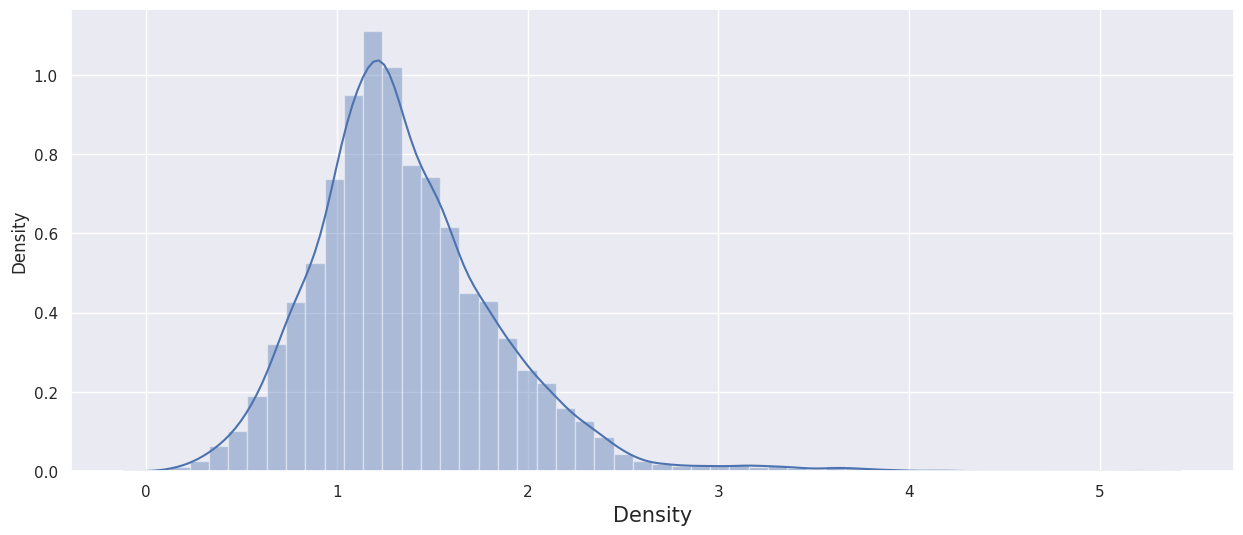

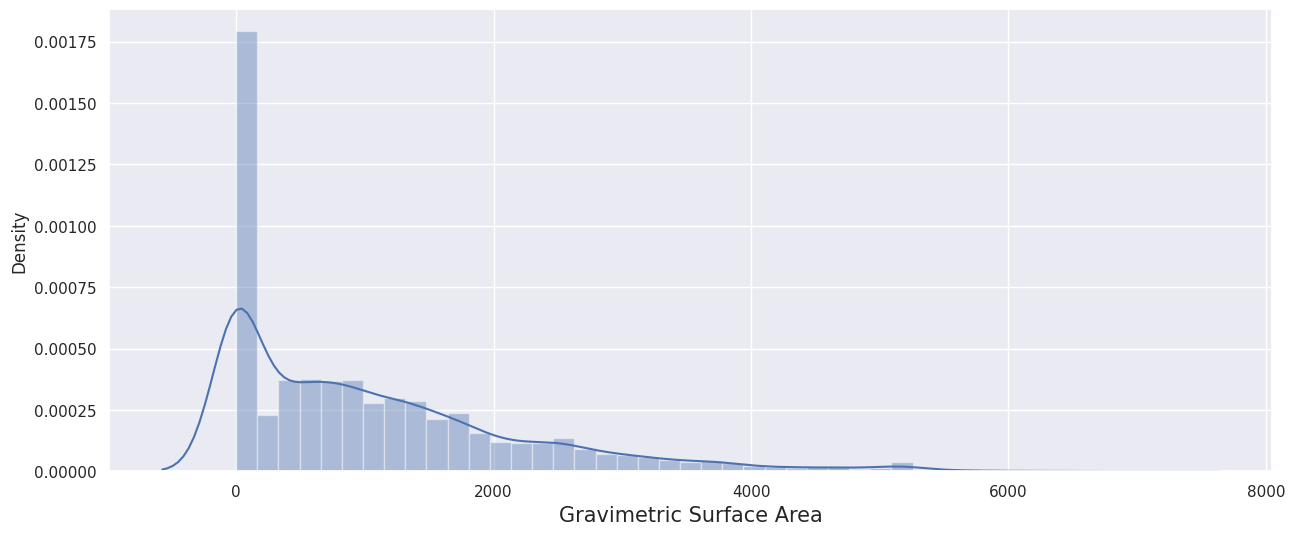

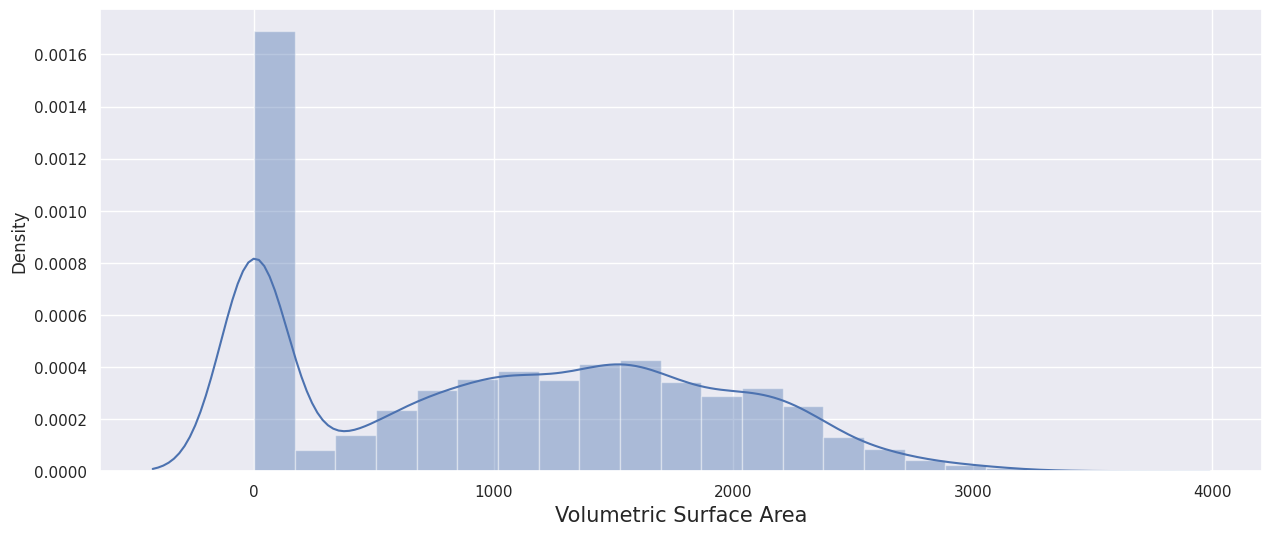

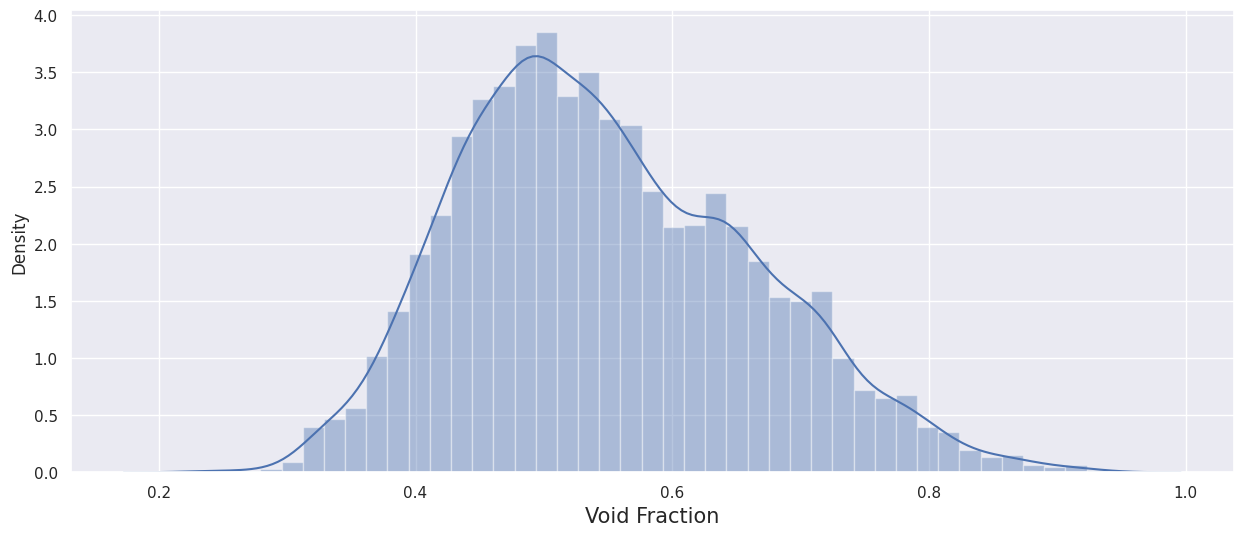

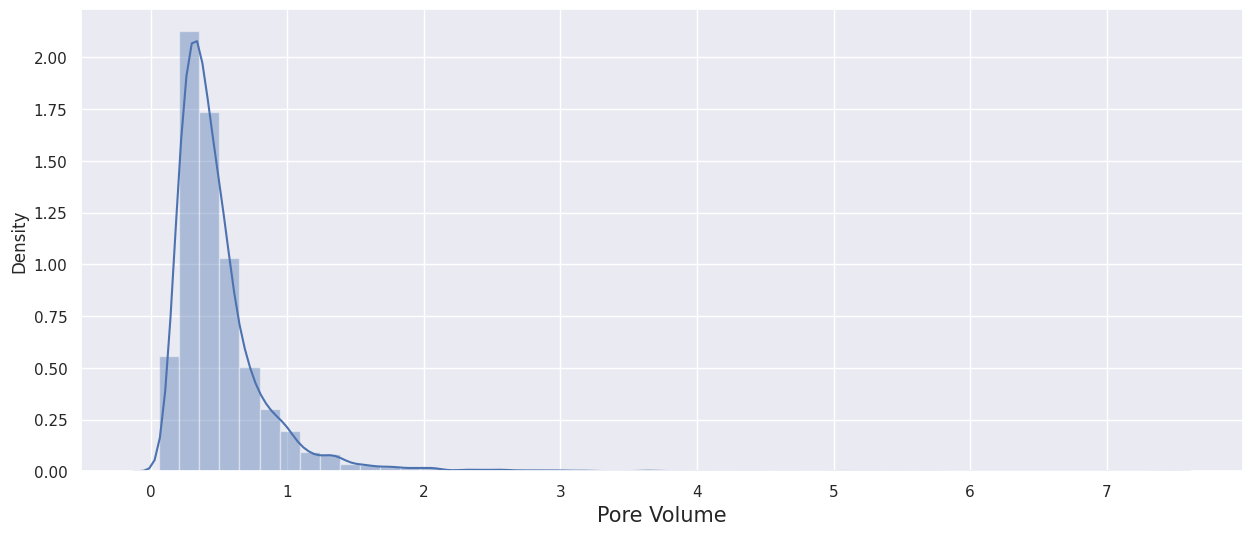

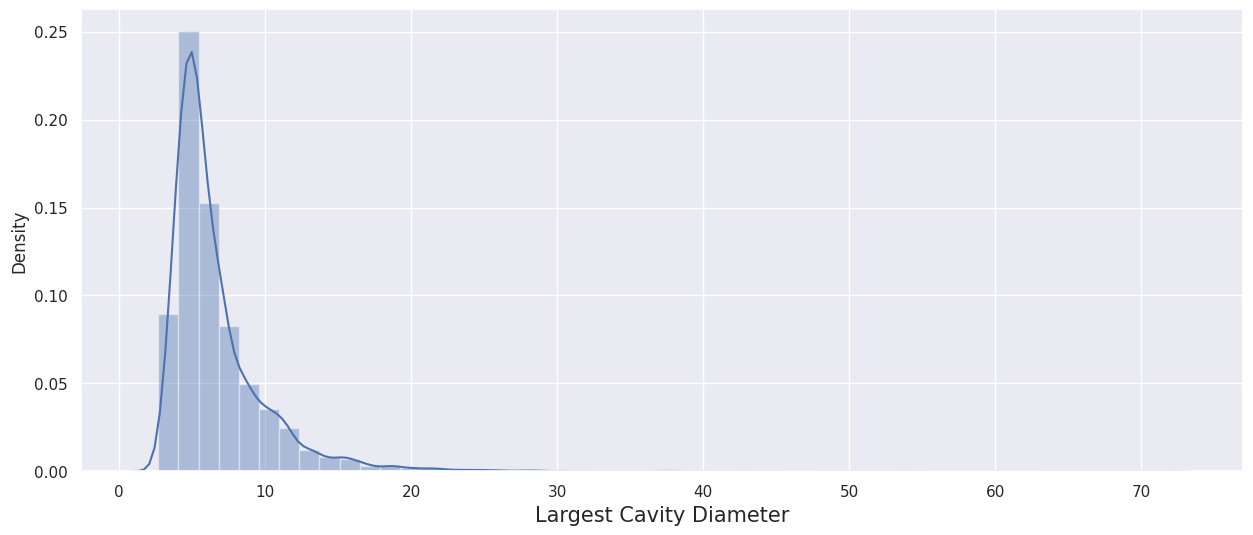

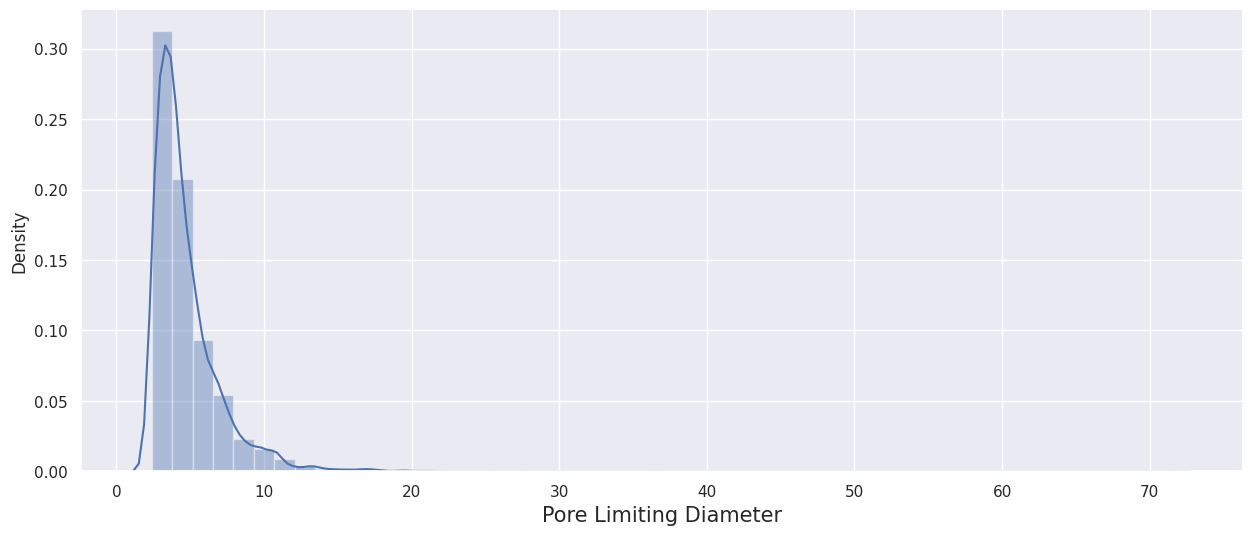

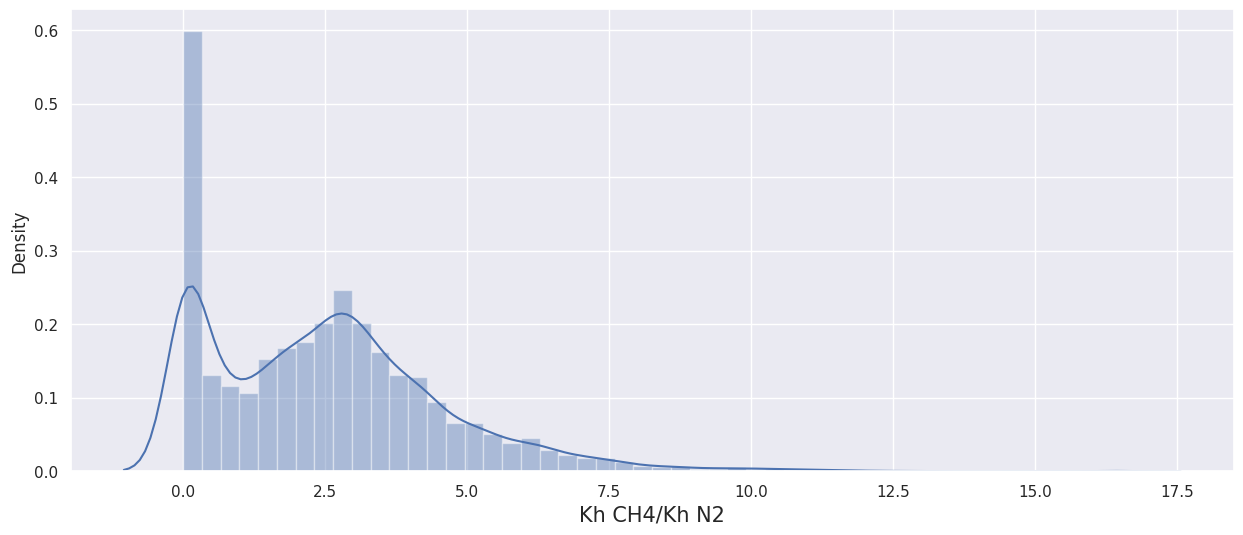

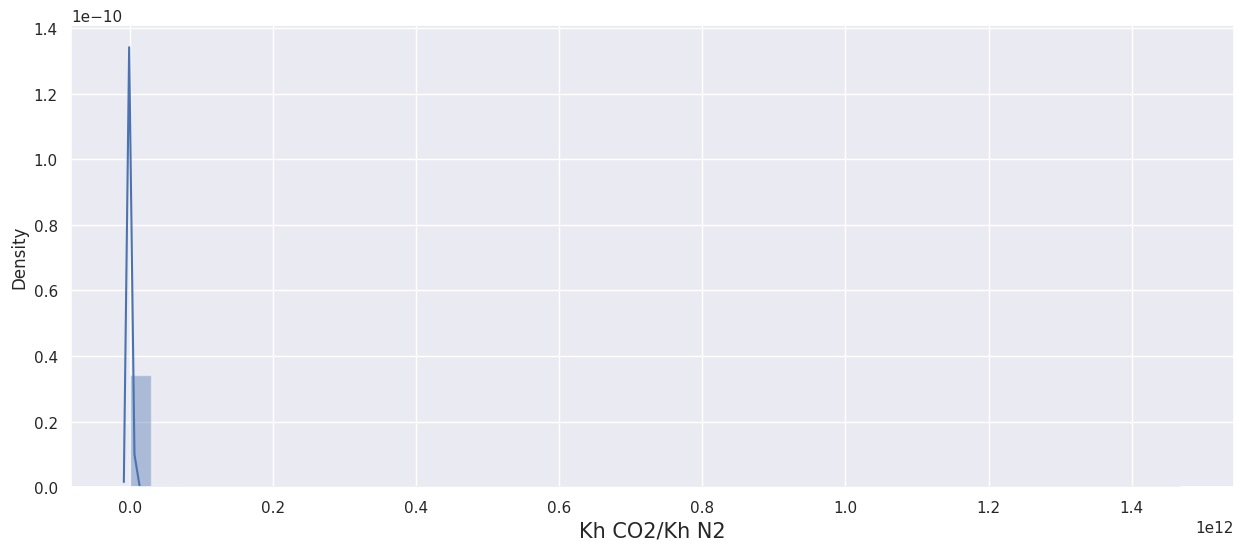

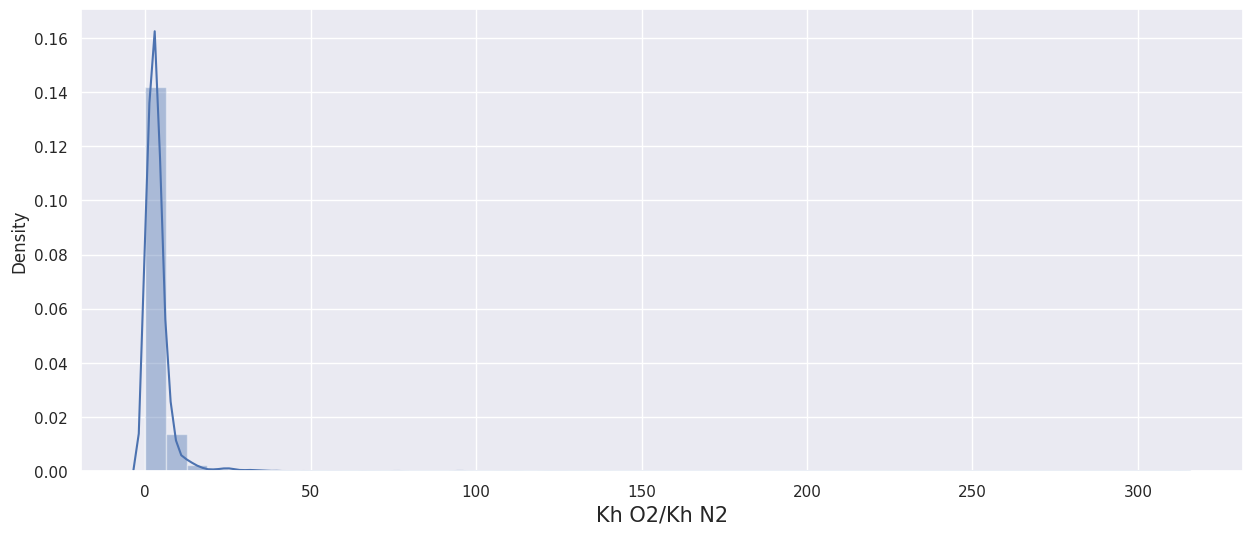

In [14]:
for column in dp.columns:
  plt.figure(figsize=(15,6))
  sns.distplot(dp[column])
  plt.xlabel(column, fontsize= 15)
  plt.plot()

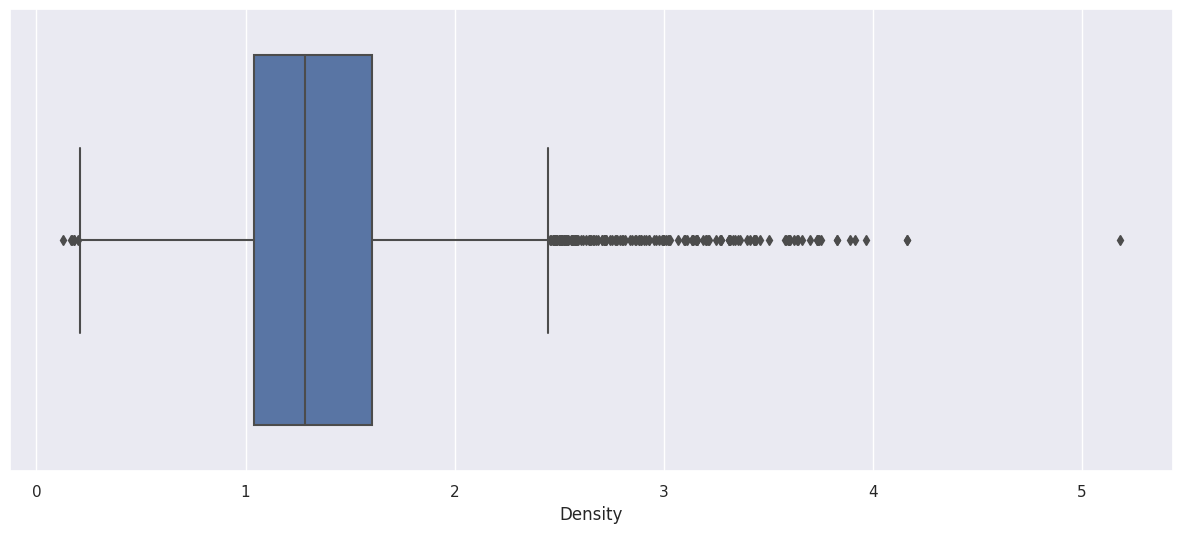

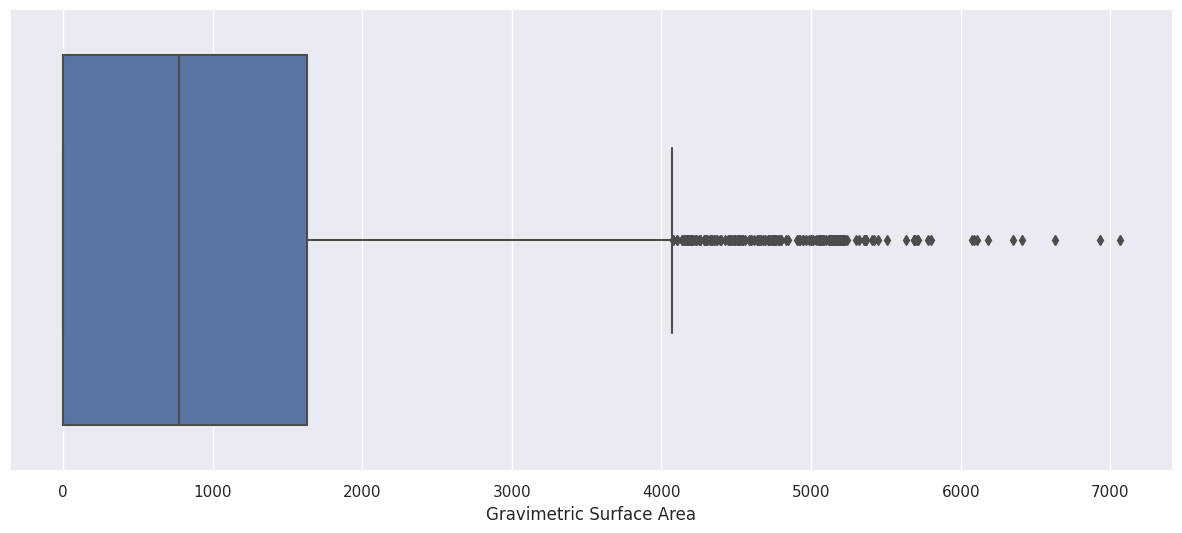

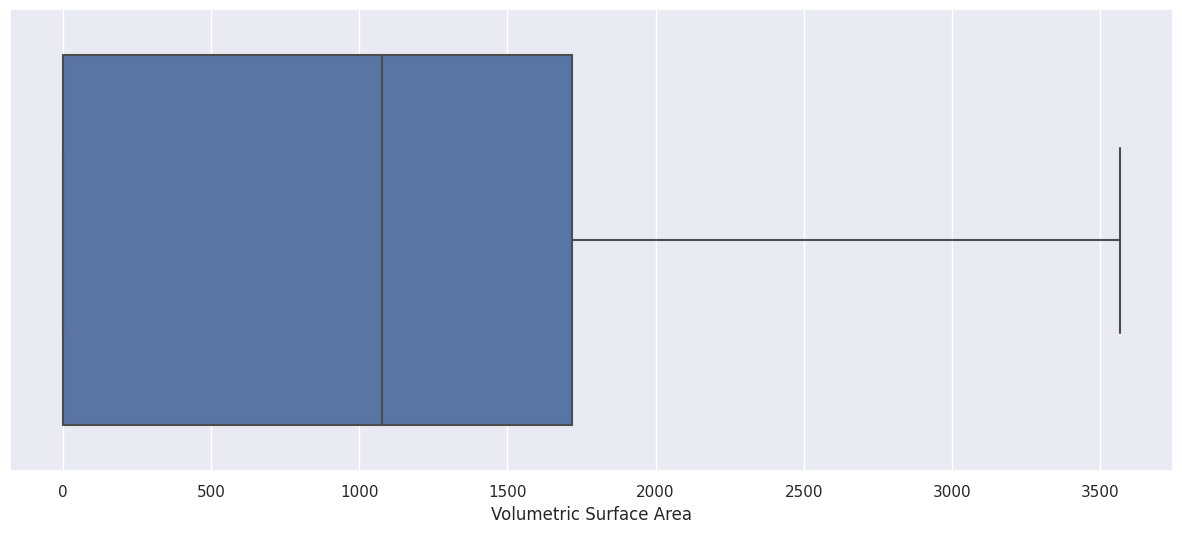

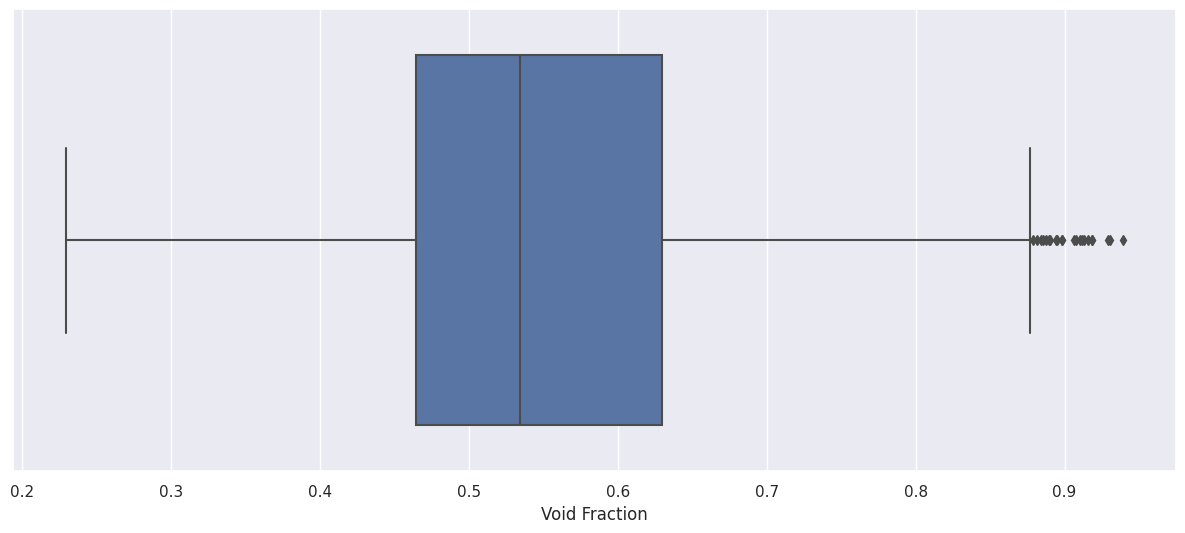

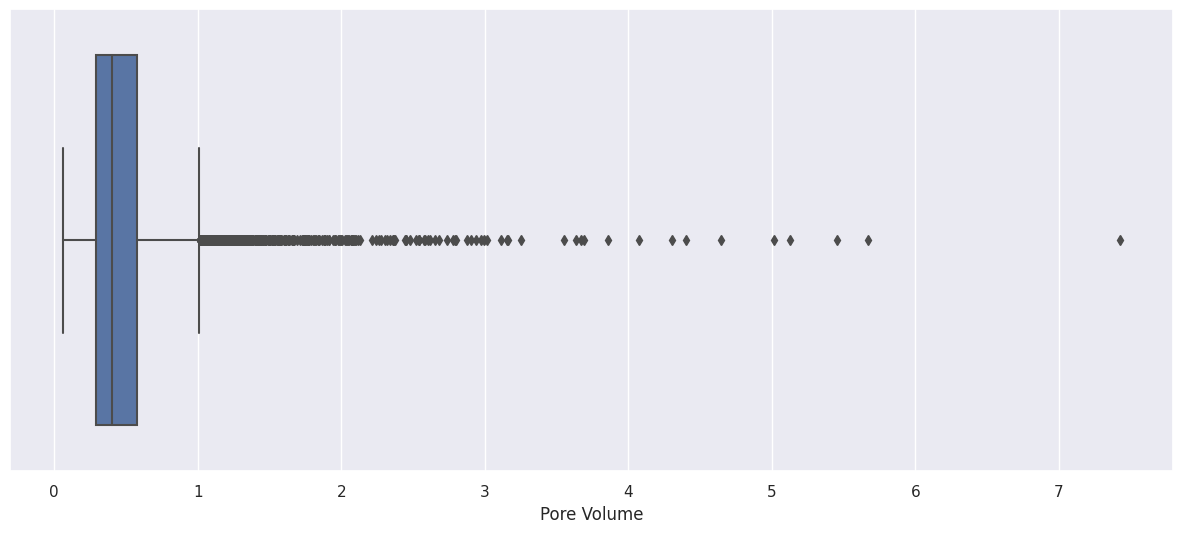

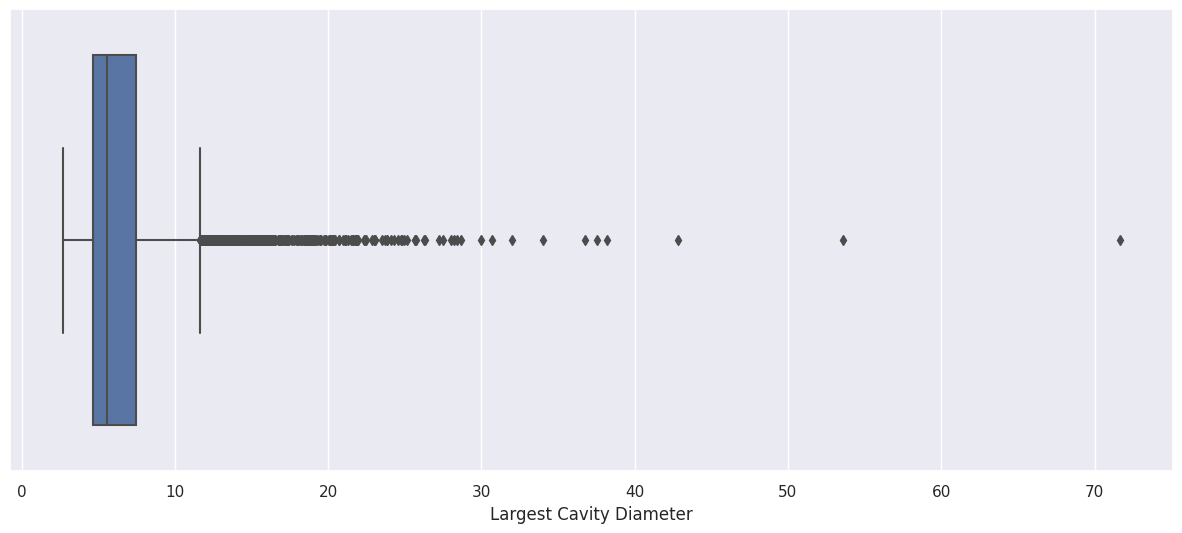

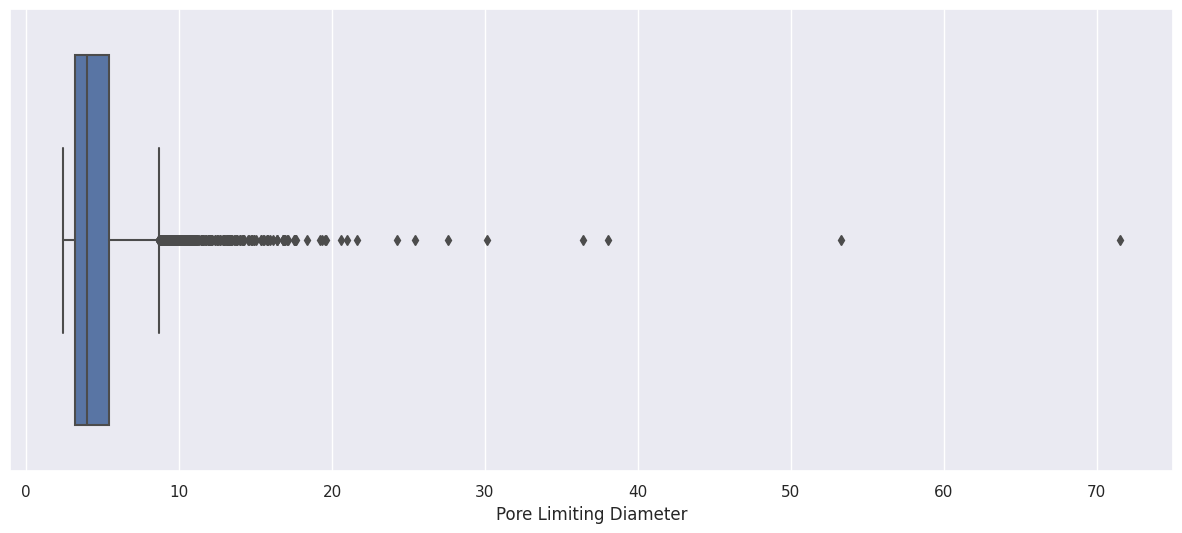

In [15]:
for column in dp.columns:
  if column == "Kh CH4/Kh N2":
    break;
  plt.figure(figsize=(15,6))
  sns.boxplot(x=dp[column])
  plt.xlabel(column)
  plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(dp.corr(), cmap="Blues", annot=True)

<Axes: >

## Data Handling

### Removing potential outliers

In [ ]:
dx = dp.drop(target_col, axis=1)

In [ ]:
dx.shape

(7664, 7)

In [ ]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Density                   7664 non-null   float64
 1   Gravimetric Surface Area  7664 non-null   float64
 2   Volumetric Surface Area   7664 non-null   float64
 3   Void Fraction             7664 non-null   float64
 4   Pore Volume               7664 non-null   float64
 5   Largest Cavity Diameter   7664 non-null   float64
 6   Pore Limiting Diameter    7664 non-null   float64
dtypes: float64(7)
memory usage: 419.2 KB


In [ ]:
from scipy.stats import zscore

# Assuming 'data' is your DataFrame or Series
z_scores = zscore(dx)
outliers = (z_scores > 3) | (z_scores < -3)

# Remove outliers from the DataFrame
do = dx[~outliers]

In [ ]:
do.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Density                   7575 non-null   float64
 1   Gravimetric Surface Area  7525 non-null   float64
 2   Volumetric Surface Area   7664 non-null   float64
 3   Void Fraction             7647 non-null   float64
 4   Pore Volume               7539 non-null   float64
 5   Largest Cavity Diameter   7529 non-null   float64
 6   Pore Limiting Diameter    7566 non-null   float64
dtypes: float64(7)
memory usage: 419.2 KB


In [ ]:
for column in do.columns:
  do.fillna(do[column].mean(), inplace = True)

In [ ]:
do.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Density                   7664 non-null   float64
 1   Gravimetric Surface Area  7664 non-null   float64
 2   Volumetric Surface Area   7664 non-null   float64
 3   Void Fraction             7664 non-null   float64
 4   Pore Volume               7664 non-null   float64
 5   Largest Cavity Diameter   7664 non-null   float64
 6   Pore Limiting Diameter    7664 non-null   float64
dtypes: float64(7)
memory usage: 419.2 KB


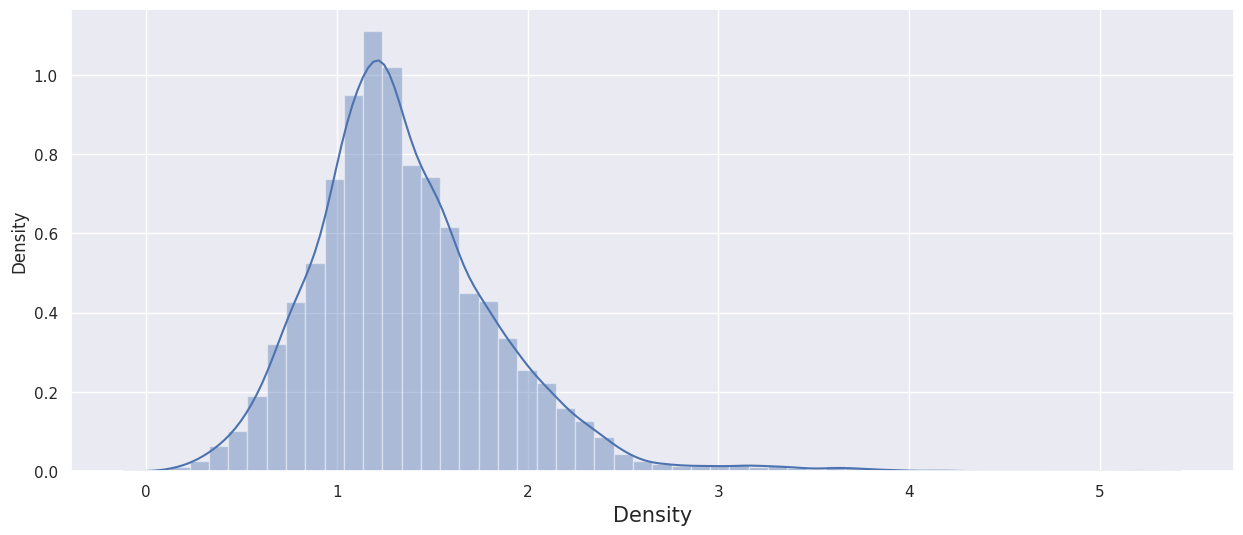

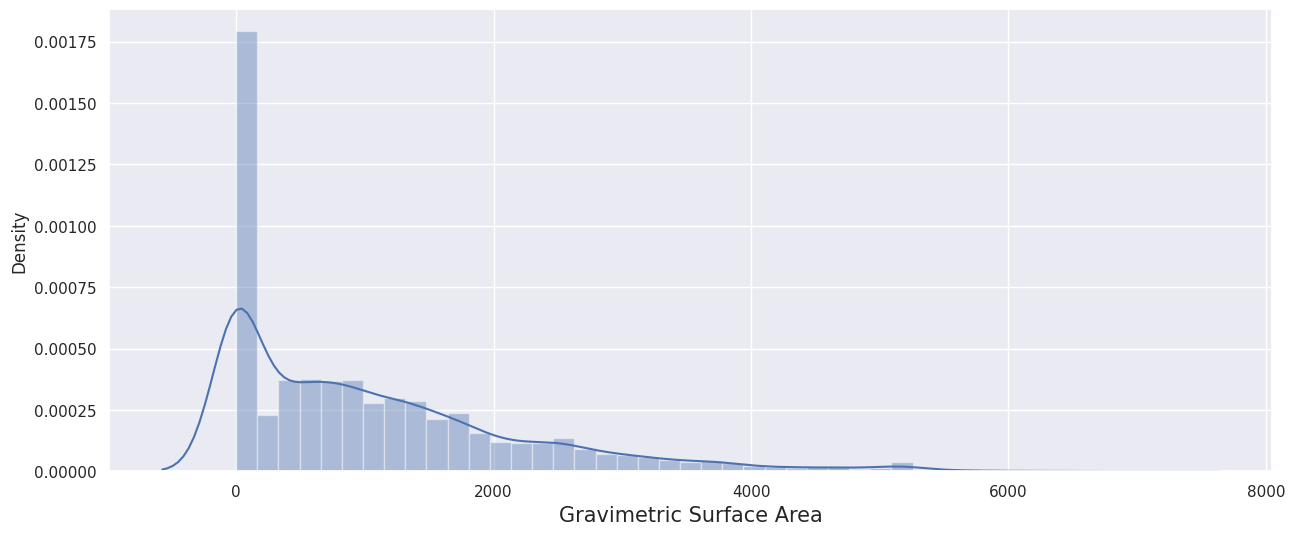

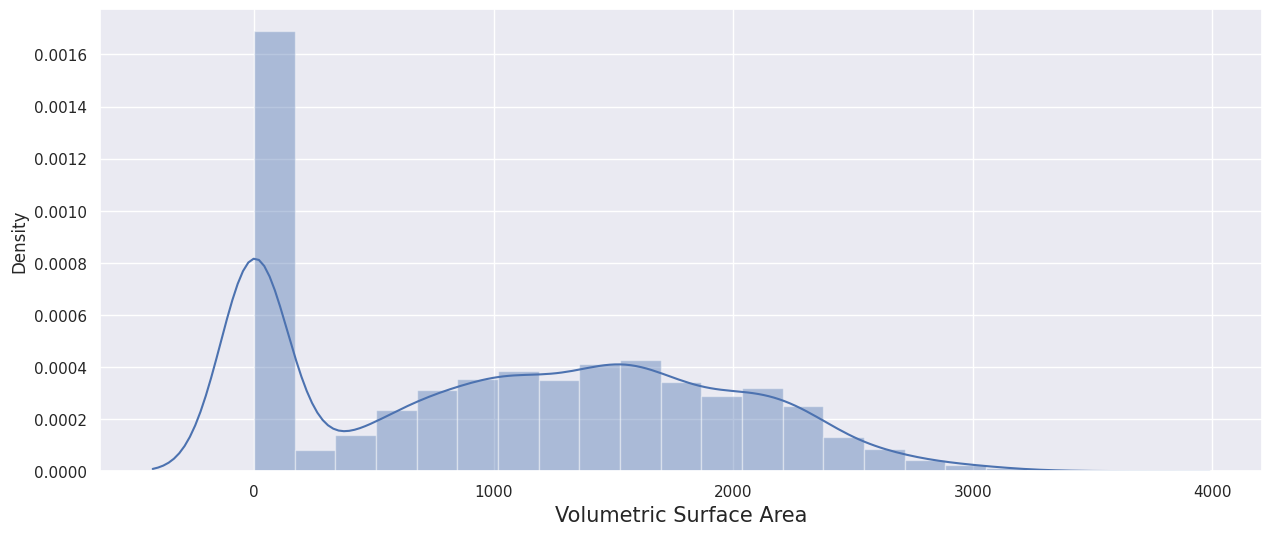

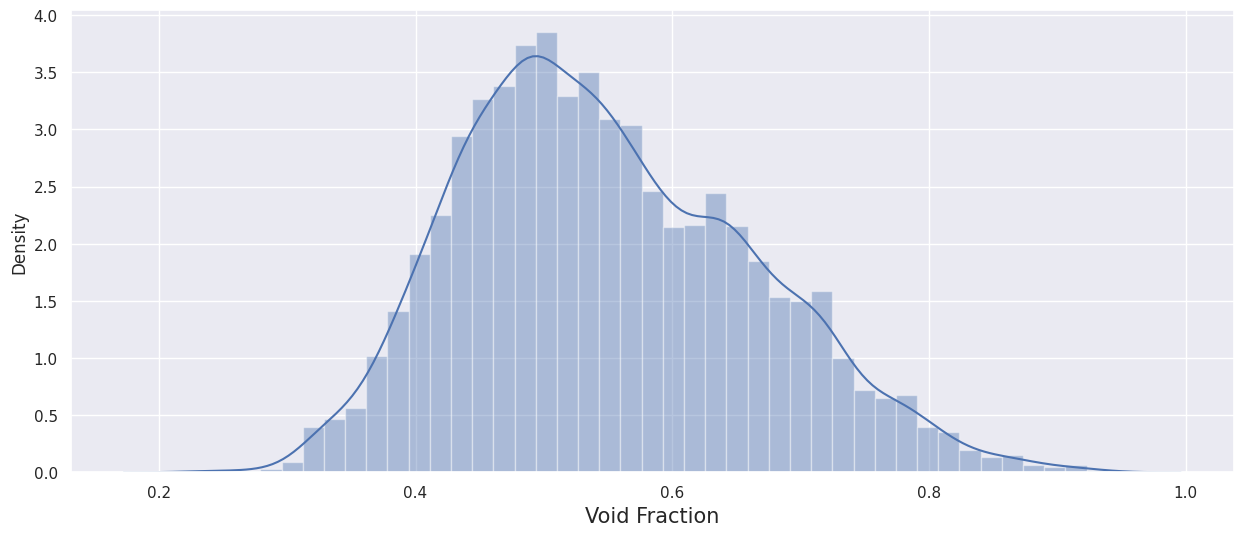

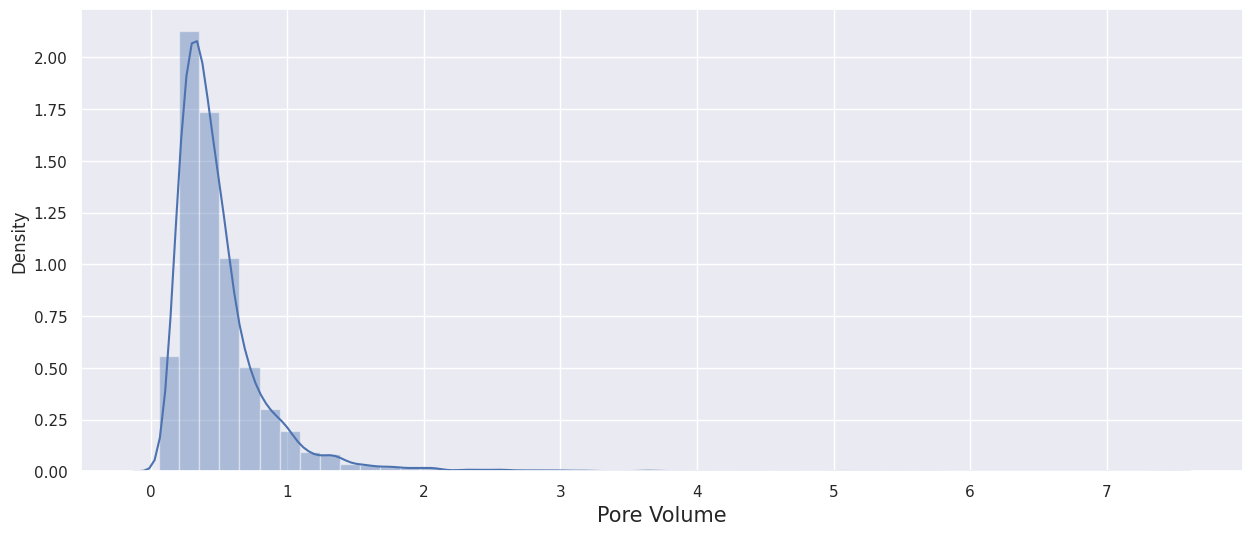

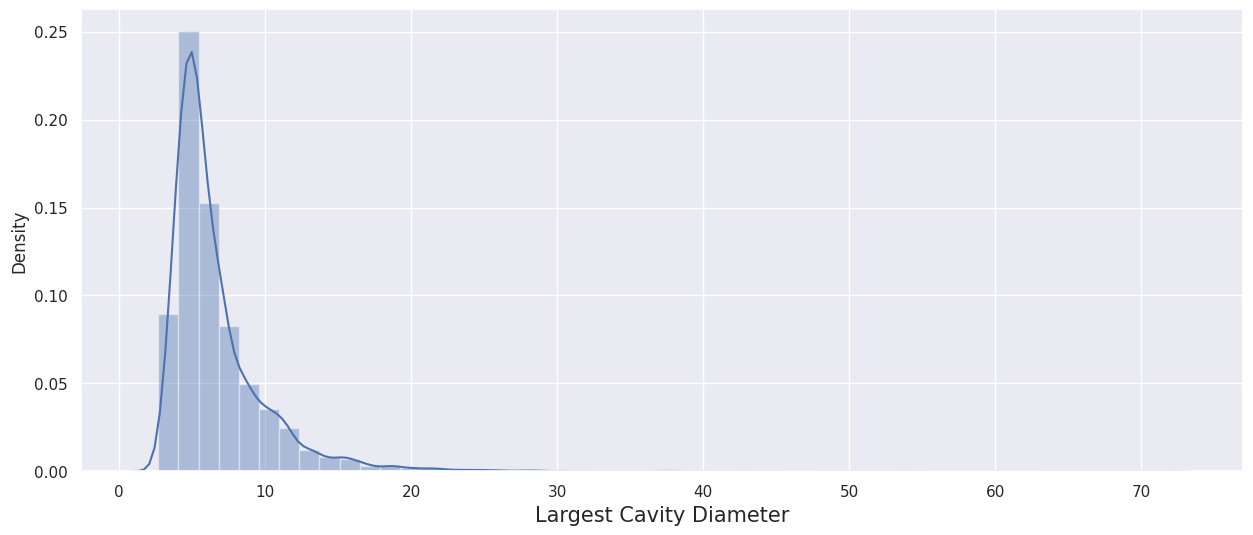

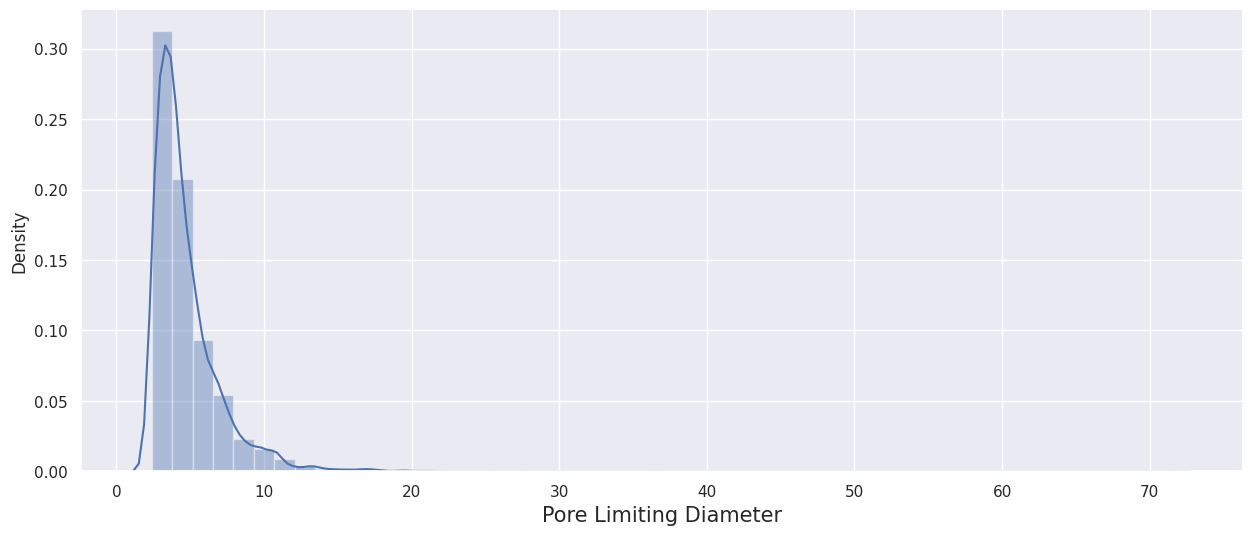

In [24]:
for column in dx.columns:
  plt.figure(figsize=(15,6))
  sns.distplot(dx[column])
  plt.xlabel(column, fontsize= 15)
  plt.plot()

### Checking Multicollinearity

In [25]:
## Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = dx
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(var, i) for i in range(var.shape[1])]
vif["Features"] = dx.columns

In [26]:
vif

VIF                  Features
0  12.385856                   Density
1  43.435106  Gravimetric Surface Area
2  31.880178   Volumetric Surface Area
3  53.685021             Void Fraction
4  39.050719               Pore Volume
5  23.078583   Largest Cavity Diameter
6  15.752234    Pore Limiting Diameter

## Segregating Feature and Target Variables

In [27]:
X = dx.values
y1 = dp.iloc[:, -3].values
y2 = dp.iloc[:, -2].values
y3 = dp.iloc[:, -1].values

In [28]:
X.shape

(7664, 7)

In [29]:
y1.shape

(7664,)

## Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [31]:
X_sc.shape

(7664, 7)

## Taking Ch4/N2 as Target Variable

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y1, test_size = 0.25,
                                                    random_state = 0)

In [33]:
X_train.shape

(5748, 7)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [35]:
r21_score = []
def predict(ml_model):
  model = ml_model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  r2_score = metrics.r2_score(y_test, y_pred)
  r21_score.append(r2_score)
  print("r2 score: {}".format(r2_score))

  sns.distplot(y_test-y_pred)

r2 score: 0.1659058307562996


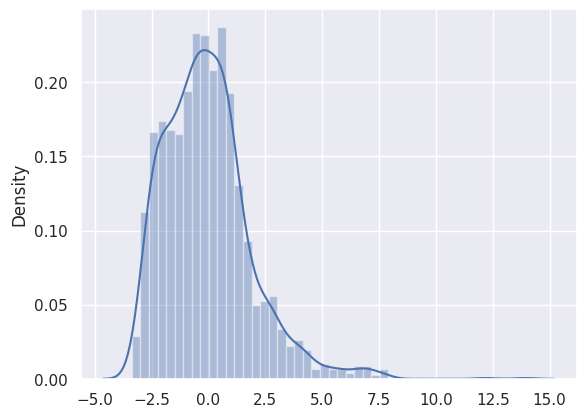

In [36]:
predict(LinearRegression())

r2 score: 0.3102398356729573


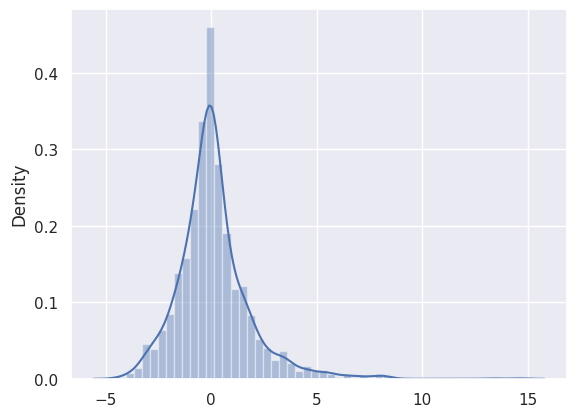

In [37]:
predict(SVR(kernel="rbf"))

r2 score: 0.1412634748807452


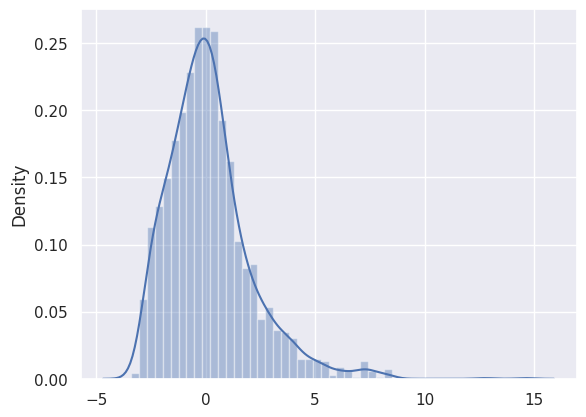

In [38]:
predict(SVR(kernel="linear"))

r2 score: 0.43515304717833014


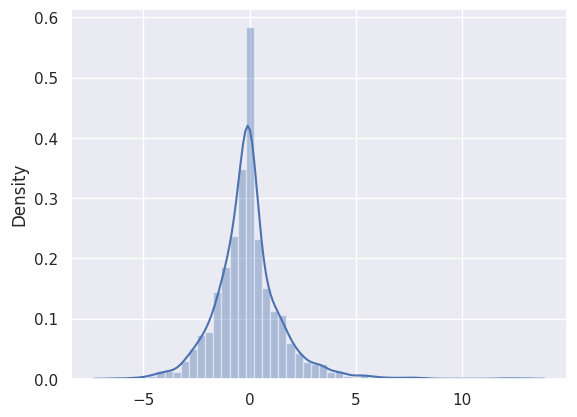

In [39]:
predict(RandomForestRegressor())

r2 score: 0.34950083658149844


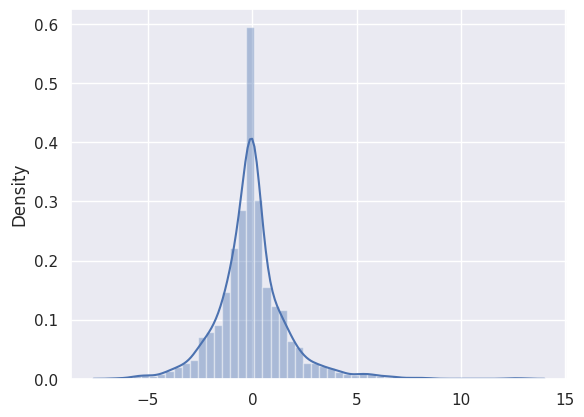

In [40]:
predict(KNeighborsRegressor())

r2 score: 0.37518557773597316


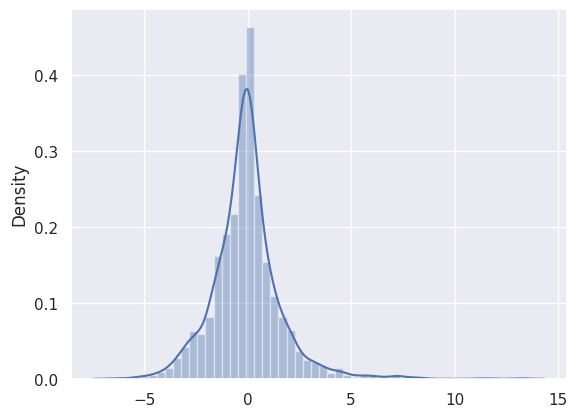

In [41]:
predict(XGBRegressor())

In [42]:
dr = pd.DataFrame(r21_score, index=["Linear Regression",
                                      "SVR (RBF)", "SVR (Linear)", "Random Forest", "KNN", "XGBoostRegressor"],
                  columns = ["R2 Score"])

In [43]:
dr

R2 Score
Linear Regression  0.165906
SVR (RBF)          0.310240
SVR (Linear)       0.141263
Random Forest      0.435153
KNN                0.349501
XGBoostRegressor   0.375186

## Taking CO2/N2 as Target Variable

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y2, test_size = 0.25,
                                                    random_state = 0)

In [45]:
X_train.shape

(5748, 7)

In [46]:
r22_score = []
def predict(ml_model):
  model = ml_model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  r2_score = metrics.r2_score(y_test, y_pred)
  r22_score.append(r2_score)
  print("r2 score: {}".format(r2_score))

  sns.distplot(y_test-y_pred)

r2 score: -0.00040349748503354377


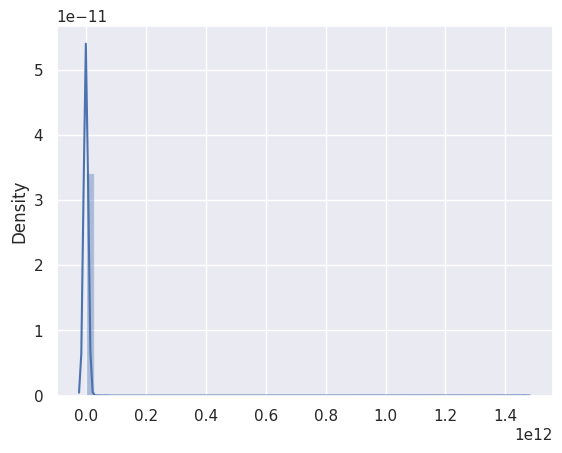

In [47]:
predict(LinearRegression())

r2 score: -0.000632840186841177


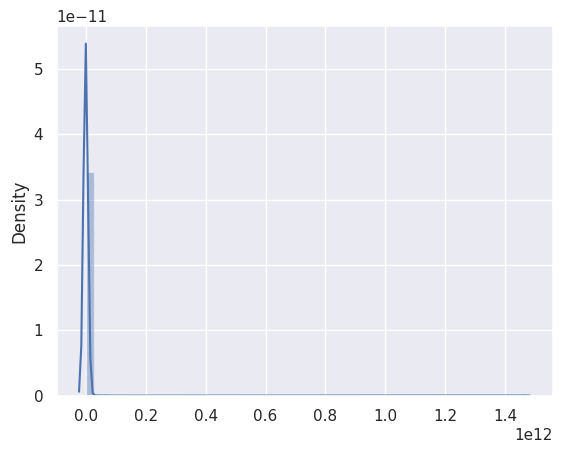

In [48]:
predict(SVR(kernel="rbf"))

r2 score: -0.0006328401192738919


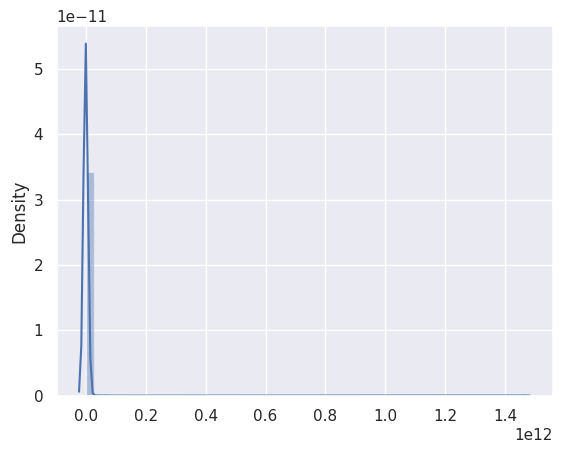

In [49]:
predict(SVR(kernel="linear"))

r2 score: -0.0008914395632524386


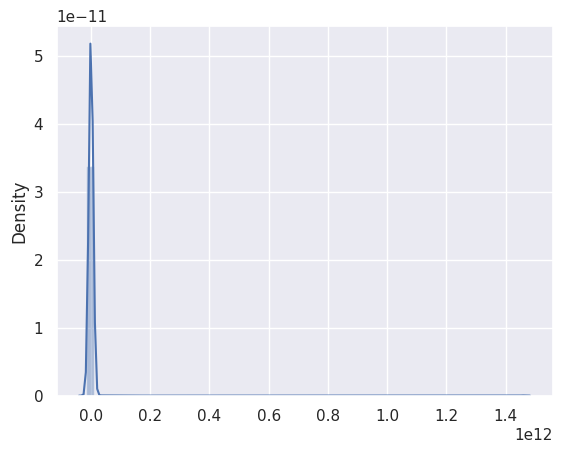

In [50]:
predict(RandomForestRegressor())

r2 score: -0.00010586074053642314


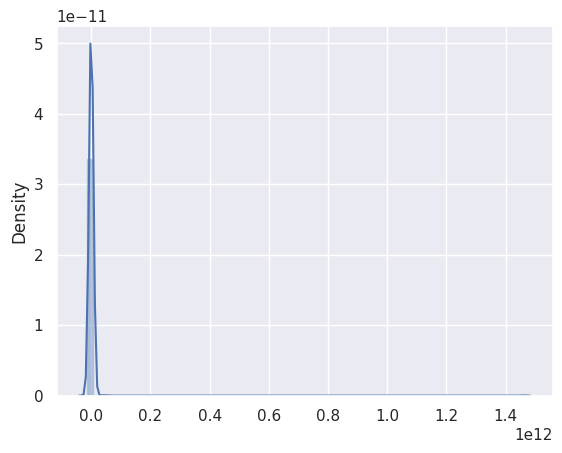

In [51]:
predict(KNeighborsRegressor())

r2 score: 0.00017694077494190275


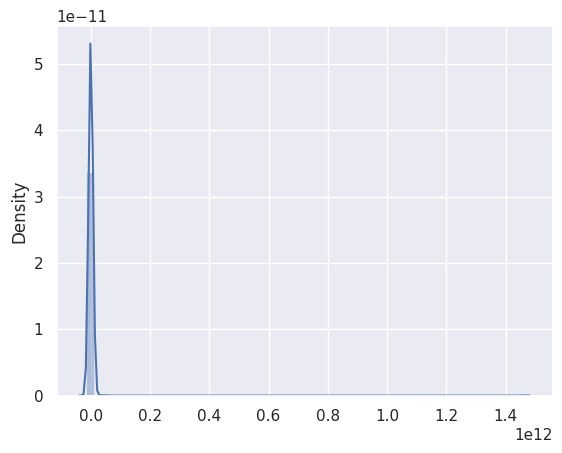

In [52]:
predict(XGBRegressor())

In [53]:
dr = pd.DataFrame(r22_score, index=["Linear Regression",
                                      "SVR (RBF)", "SVR (Linear)", "Random Forest", "KNN", "XGBoostRegressor"],
                  columns = ["R2 Score"])

In [54]:
dr

R2 Score
Linear Regression -0.000403
SVR (RBF)         -0.000633
SVR (Linear)      -0.000633
Random Forest     -0.000891
KNN               -0.000106
XGBoostRegressor   0.000177

## Taking O2/N2 as Target Variable

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y3, test_size = 0.25,
                                                    random_state = 0)

In [56]:
X_train.shape

(5748, 7)

In [57]:
r23_score = []
def predict(ml_model):
  model = ml_model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  r2_score = metrics.r2_score(y_test, y_pred)
  r23_score.append(r2_score)
  print("r2 score: {}".format(r2_score))

  sns.distplot(y_test-y_pred)

r2 score: 0.07273474290026105


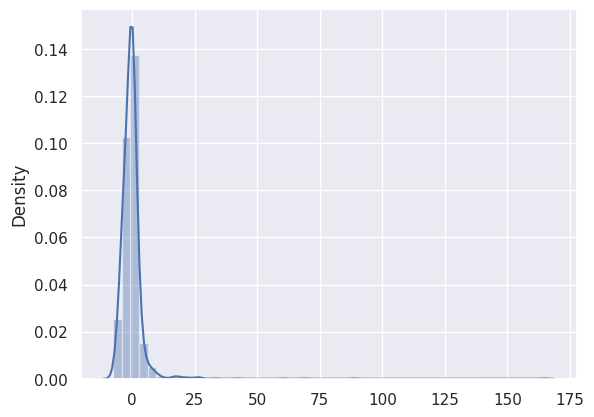

In [58]:
predict(LinearRegression())

r2 score: 0.0712398121528579


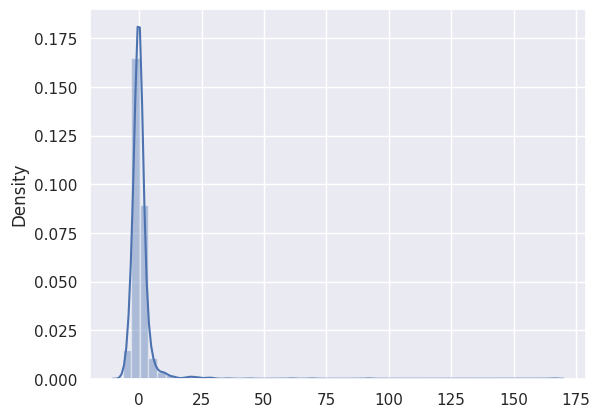

In [59]:
predict(SVR(kernel="rbf"))

r2 score: 0.04021892236499369


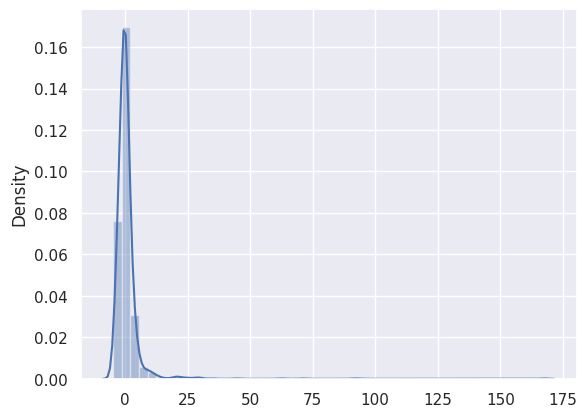

In [60]:
predict(SVR(kernel="linear"))

r2 score: 0.3551803758764863


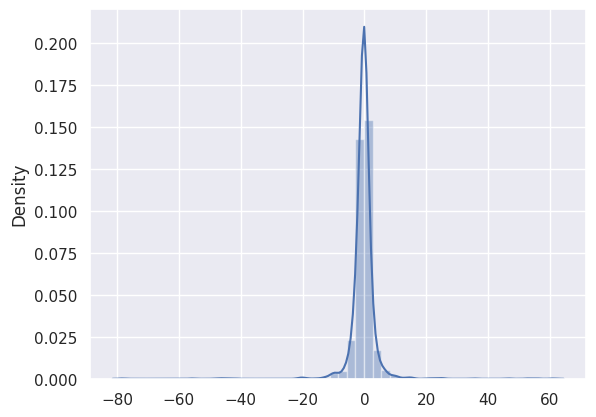

In [61]:
predict(RandomForestRegressor())

r2 score: 0.06770440344607953


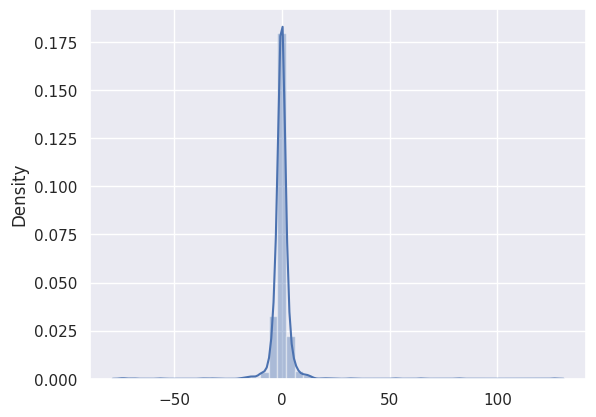

In [62]:
predict(KNeighborsRegressor())

r2 score: -0.01271659593736274


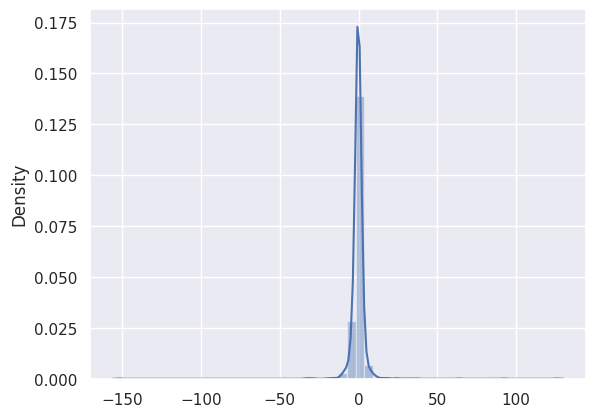

In [63]:
predict(XGBRegressor())

In [64]:
dr = pd.DataFrame(r23_score, index=["Linear Regression",
                                      "SVR (RBF)", "SVR (Linear)", "Random Forest", "KNN", "XGBoostRegressor"],
                  columns = ["R2 Score"])

In [65]:
dr

R2 Score
Linear Regression  0.072735
SVR (RBF)          0.071240
SVR (Linear)       0.040219
Random Forest      0.355180
KNN                0.067704
XGBoostRegressor  -0.012717

# Taking Chemical and physical properties

In [66]:
dpc = pd.concat([df.iloc[:,5:12], df.iloc[:, 23:29], df["Kh CH4/Kh N2"], df["Kh CO2/Kh N2"], df["Kh O2/Kh N2"]], axis=1)

In [67]:
dpc.shape

(7664, 16)

In [68]:
dpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Density                               7664 non-null   float64
 1   Gravimetric Surface Area              7664 non-null   float64
 2   Volumetric Surface Area               7664 non-null   float64
 3   Void Fraction                         7664 non-null   float64
 4   Pore Volume                           7664 non-null   float64
 5   Largest Cavity Diameter               7664 non-null   float64
 6   Pore Limiting Diameter                7664 non-null   float64
 7    total degree of unsaturation         7664 non-null   float64
 8   metalic percentage                    7664 non-null   float64
 9    oxygetn-to-metal ratio               7664 non-null   float64
 10  electronegtive-to-total ratio         7664 non-null   float64
 11   weighted electro

## Data Visualisation

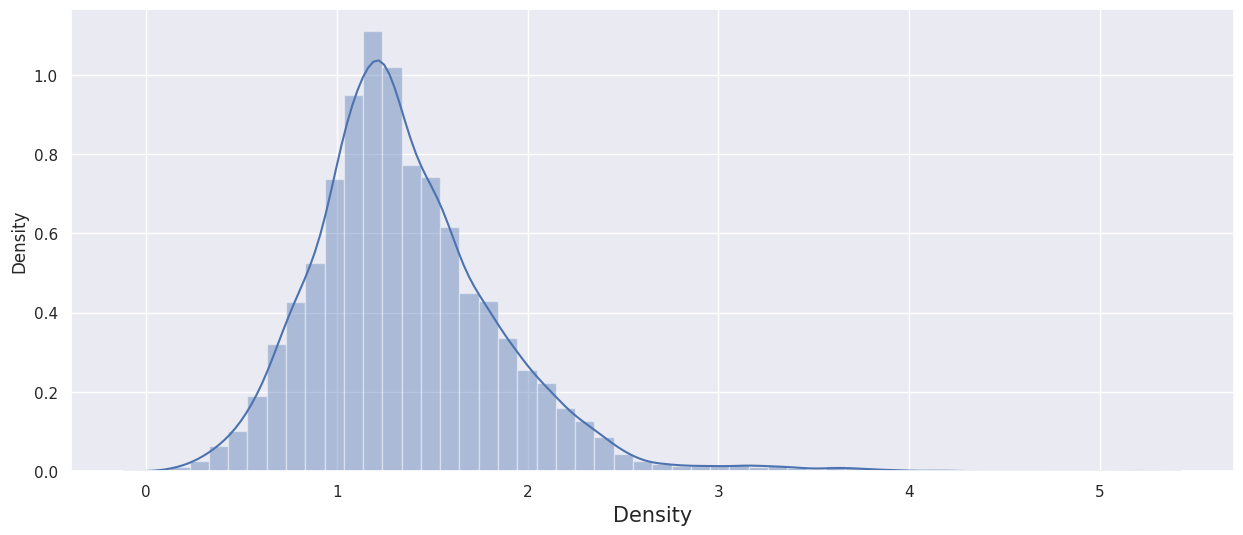

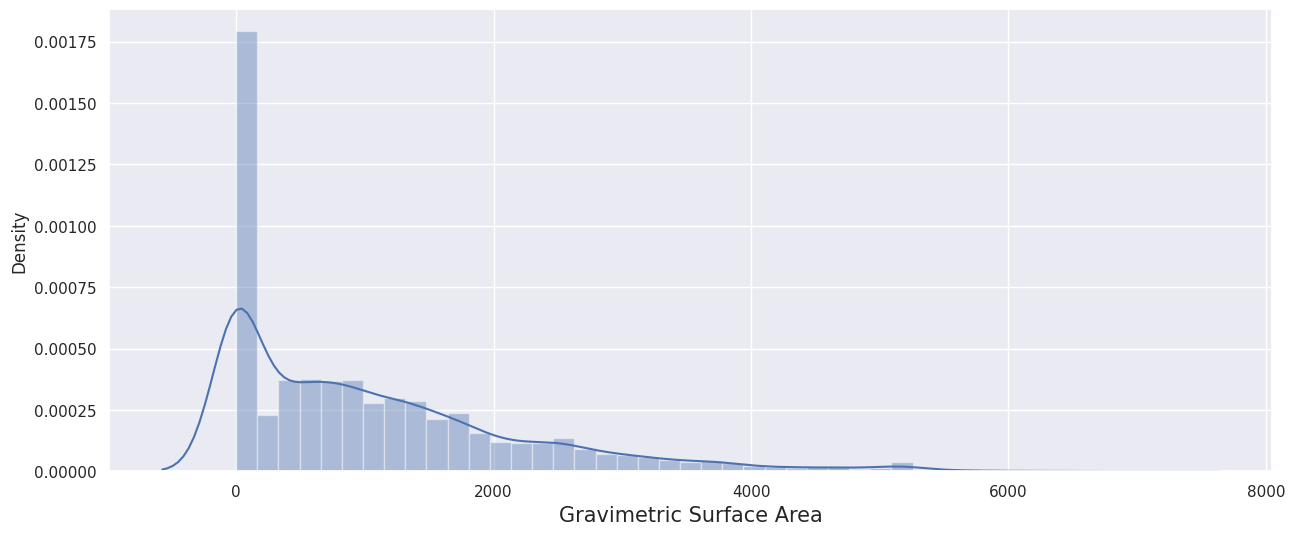

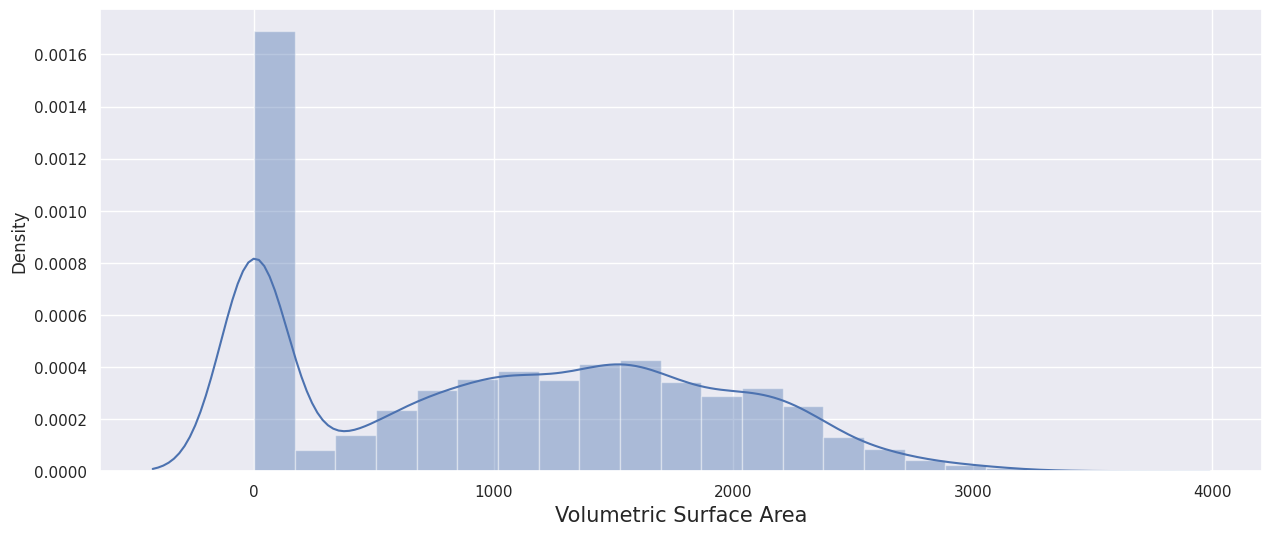

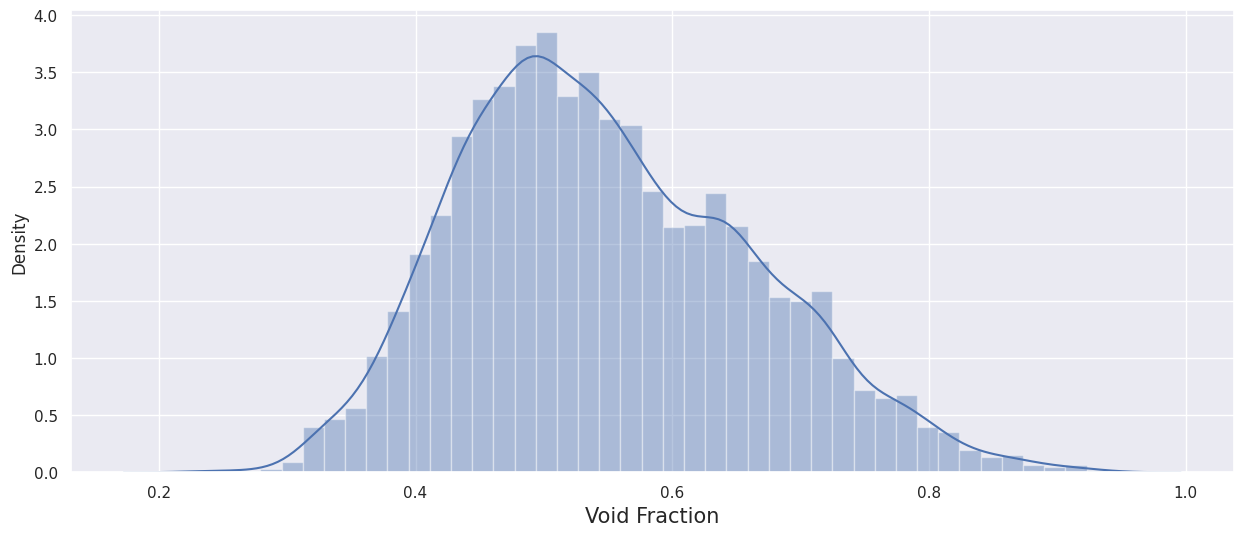

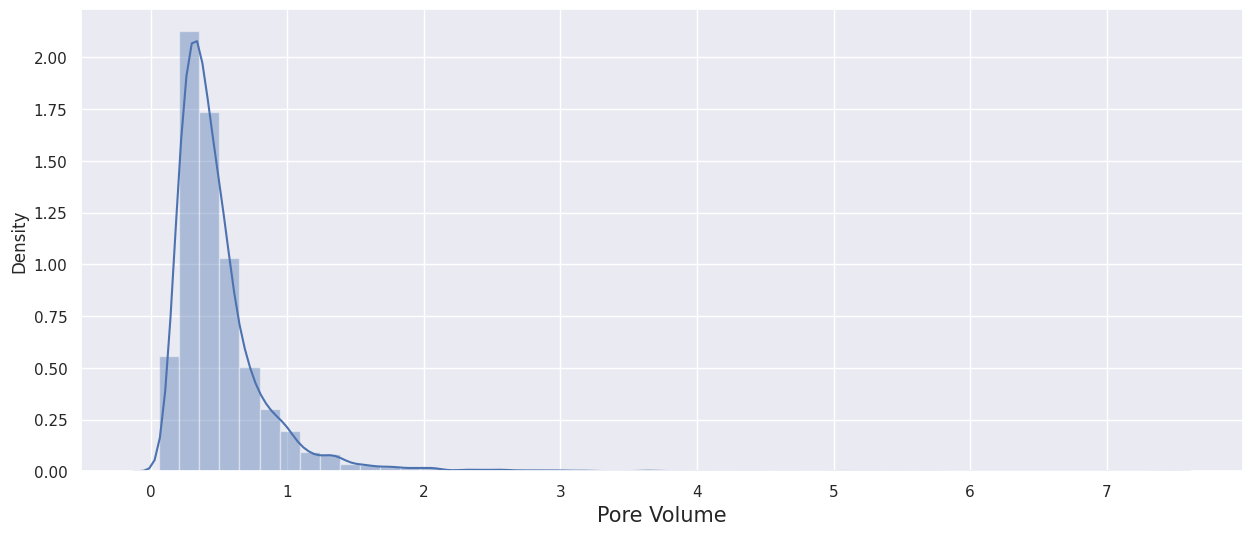

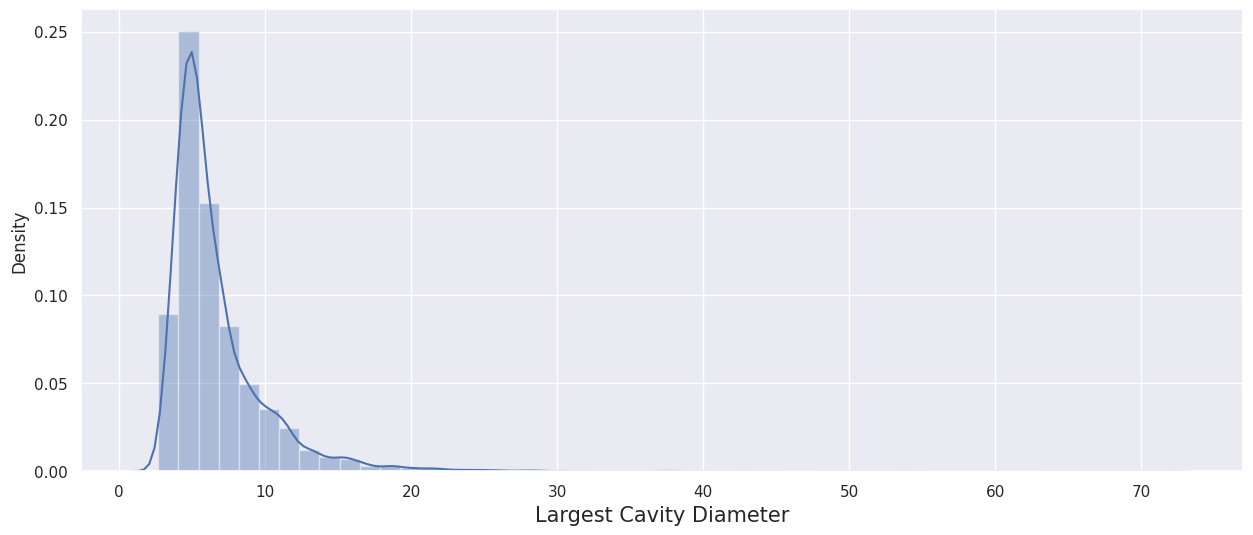

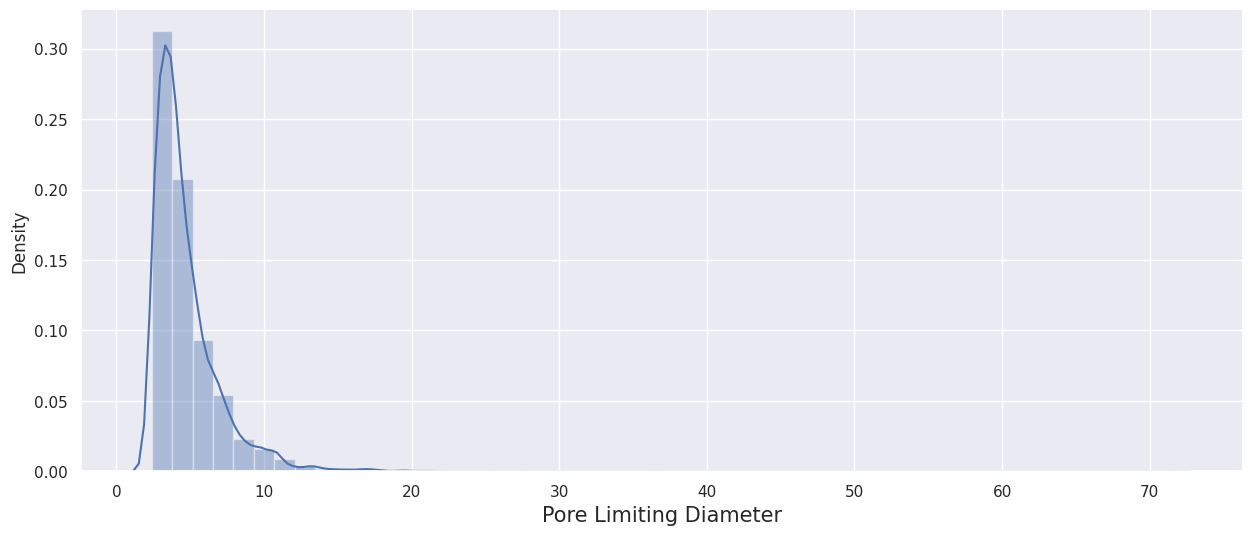

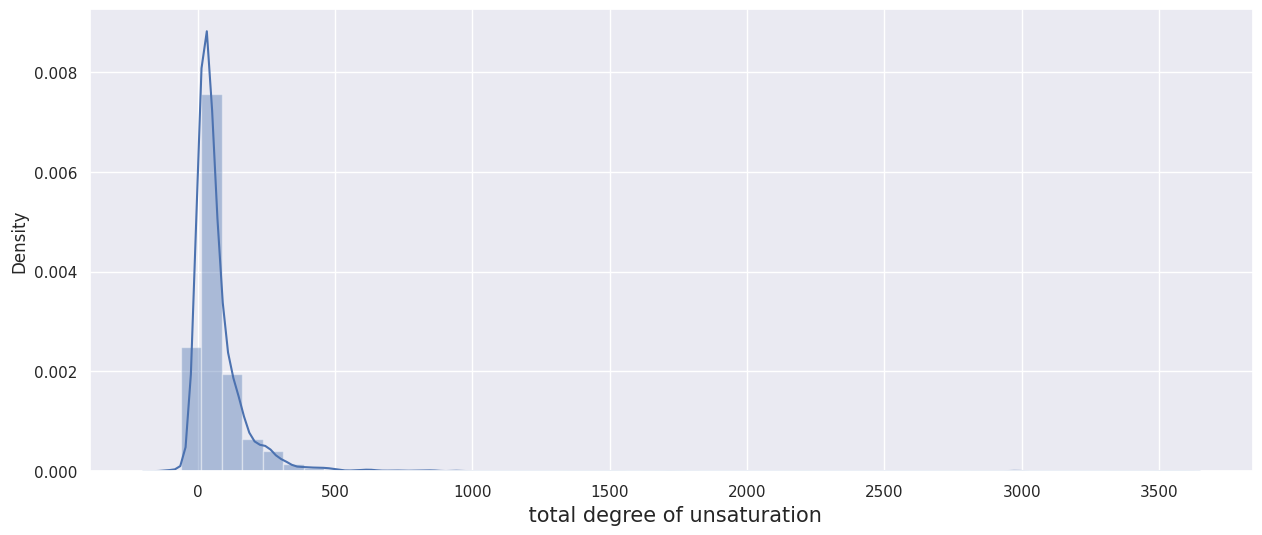

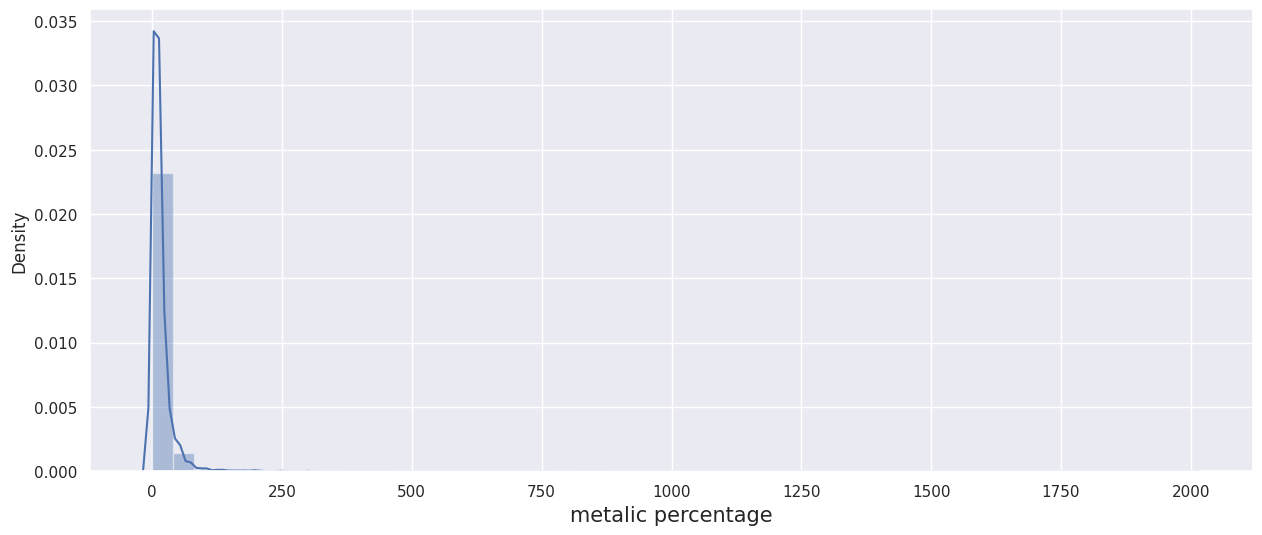

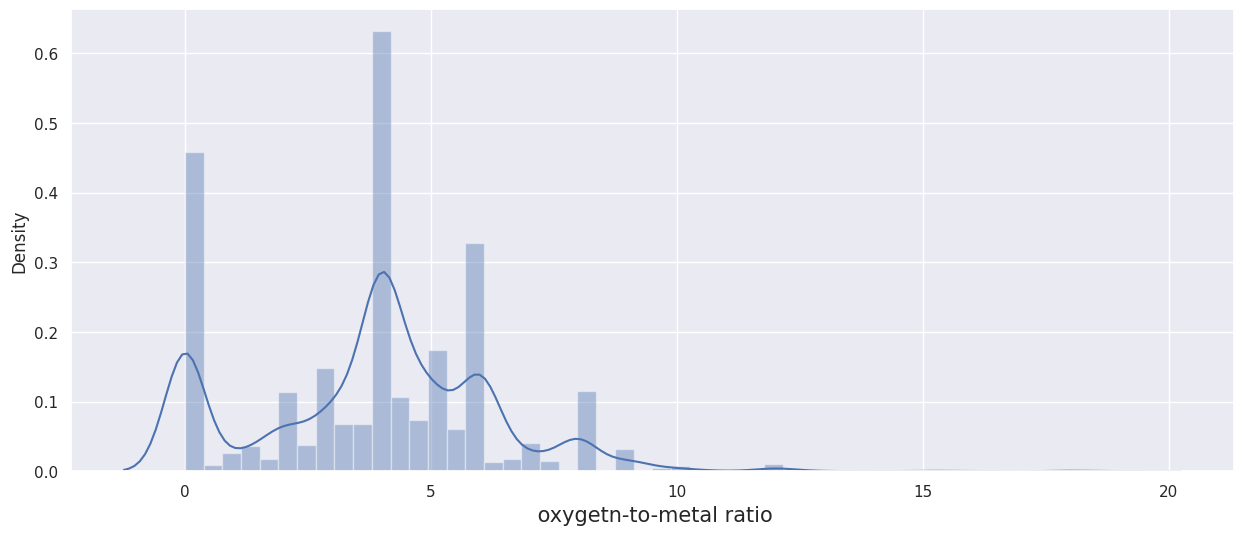

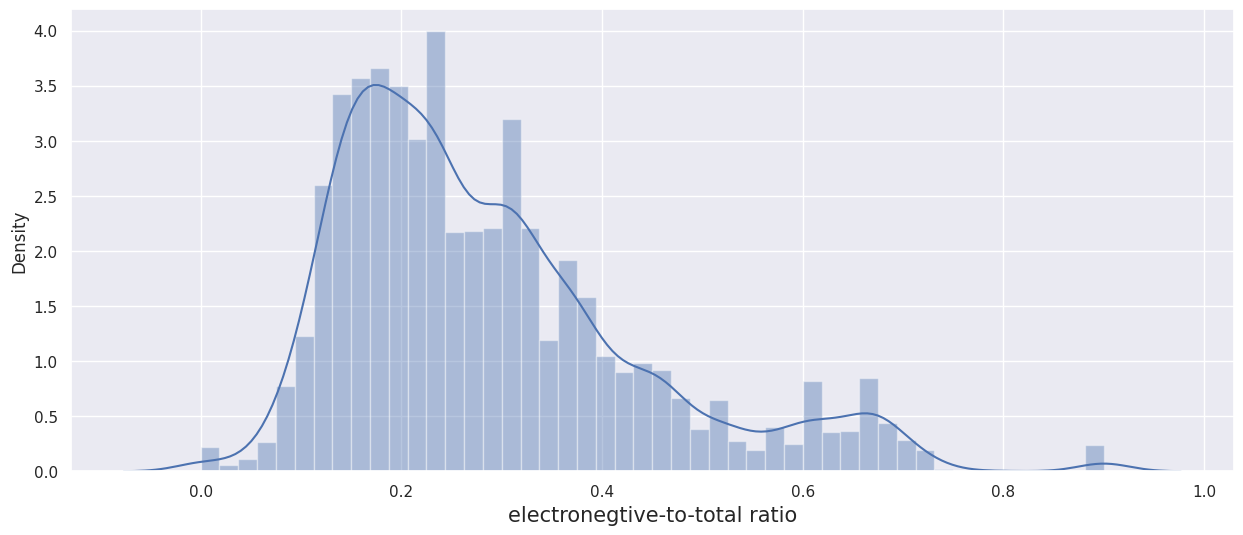

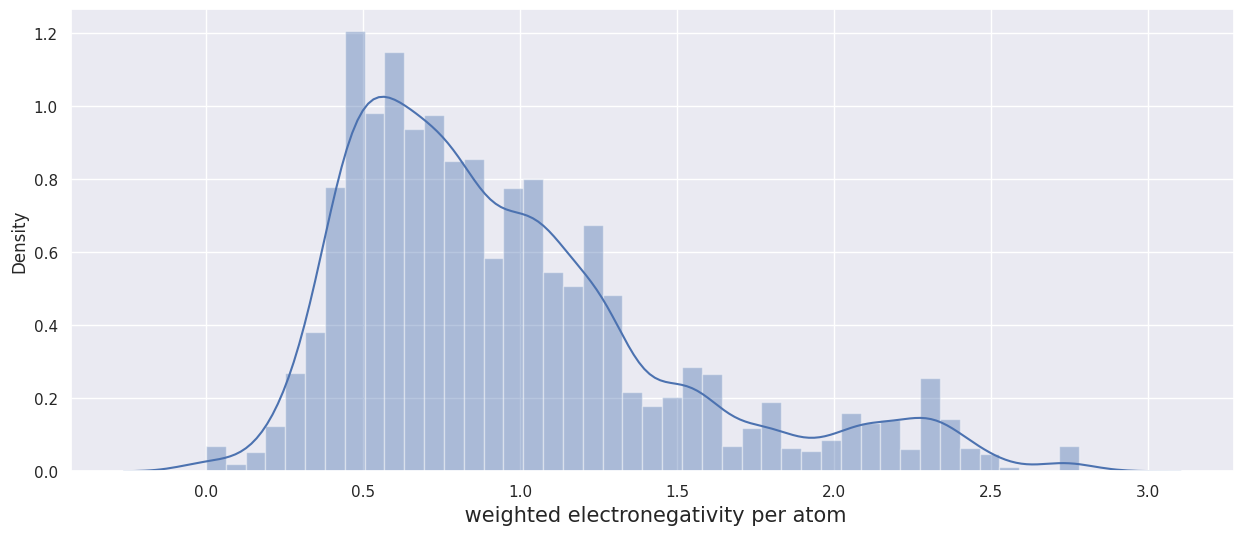

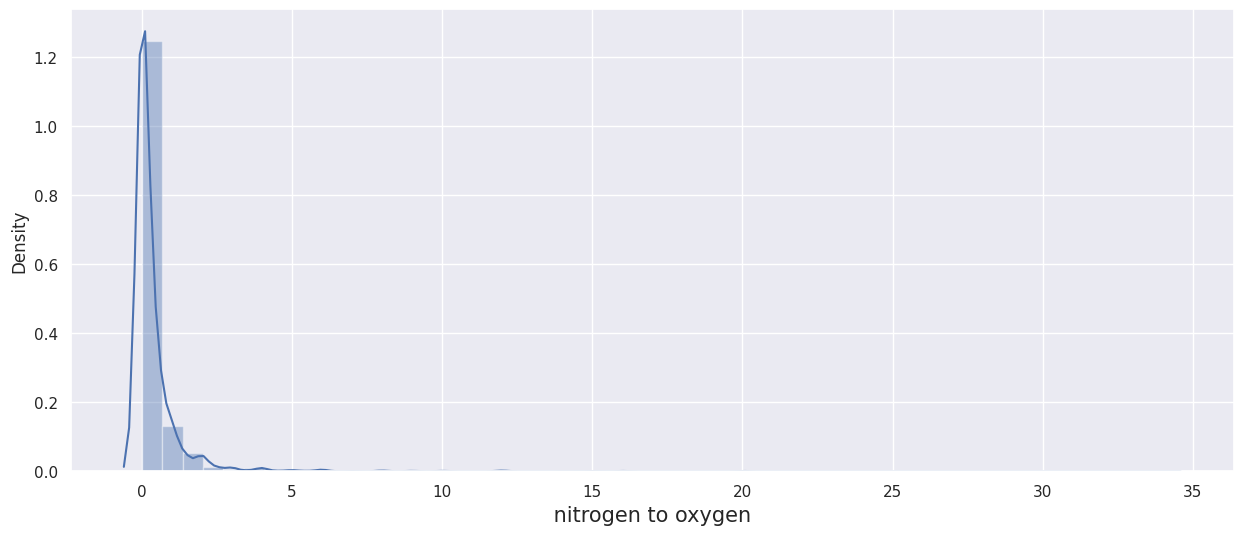

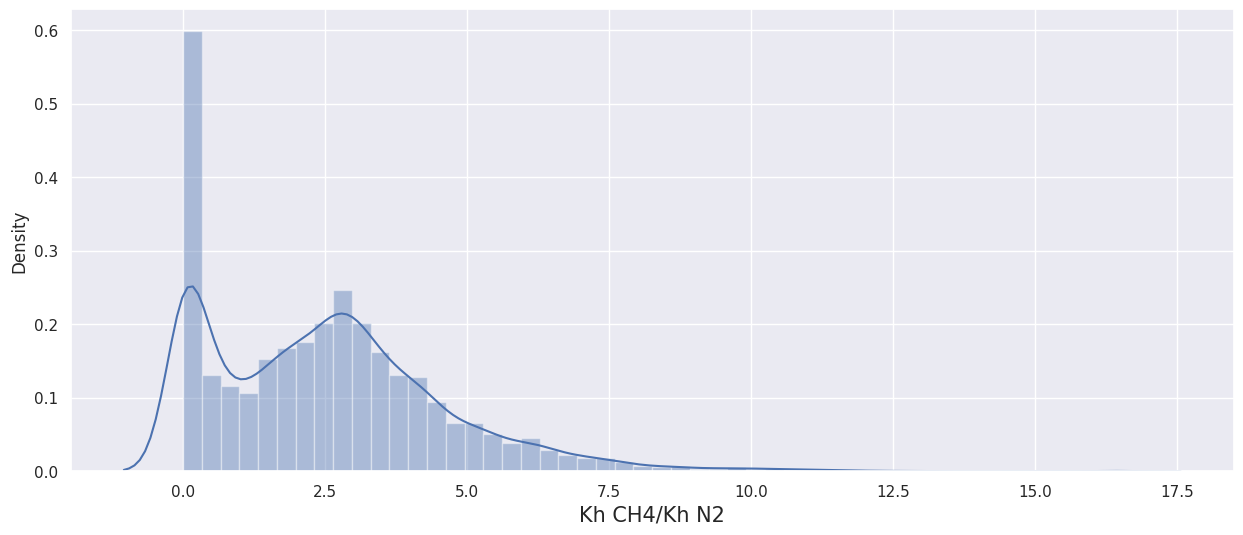

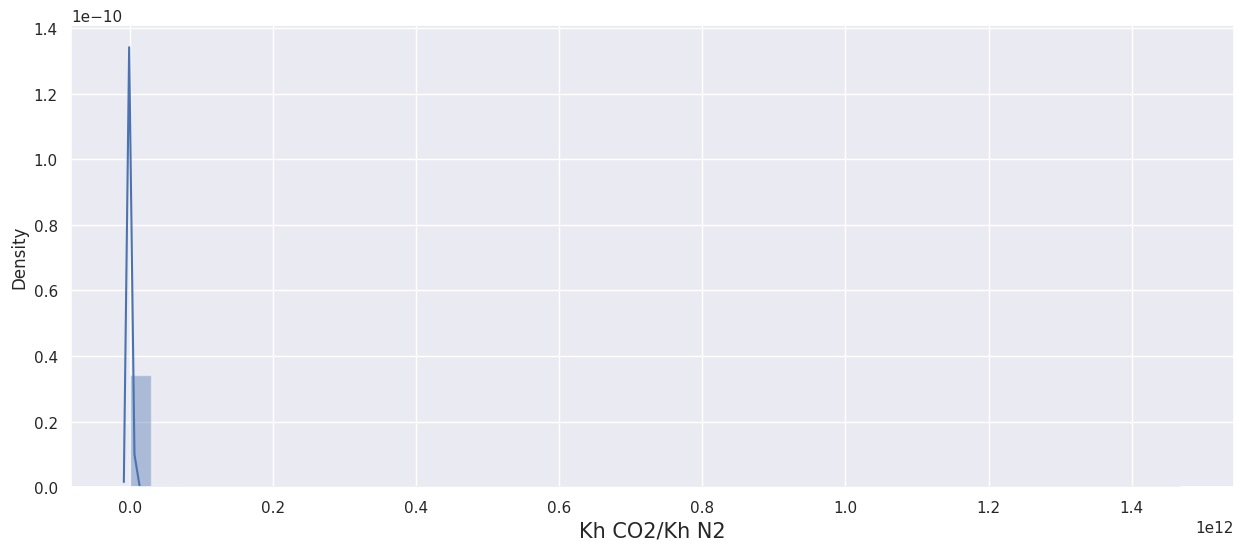

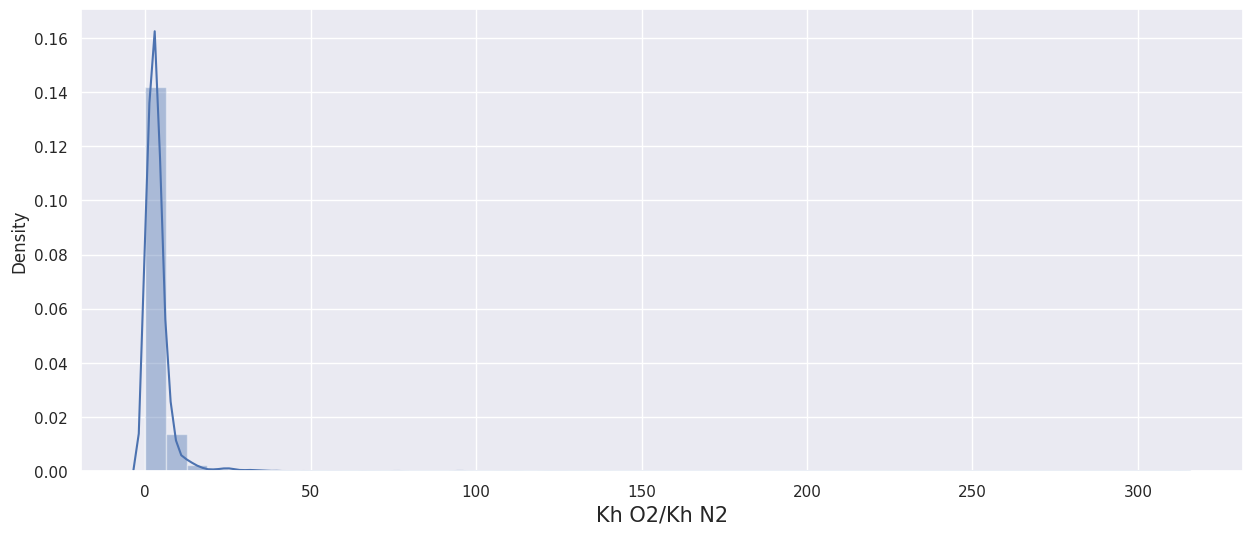

In [69]:
for column in dpc.columns:
  plt.figure(figsize=(15,6))
  sns.distplot(dpc[column])
  plt.xlabel(column, fontsize= 15)
  plt.plot()

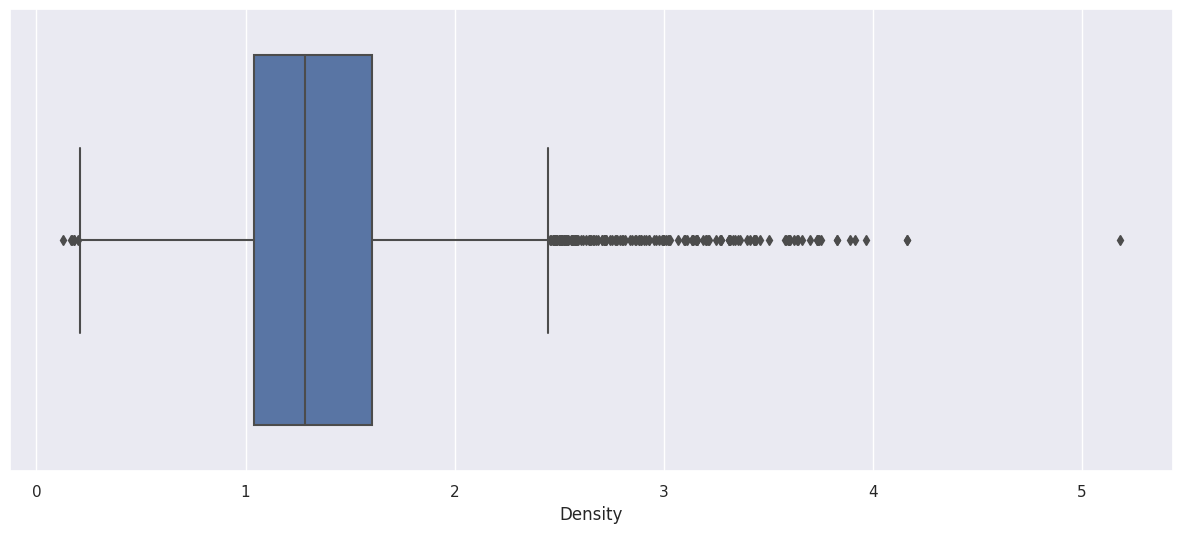

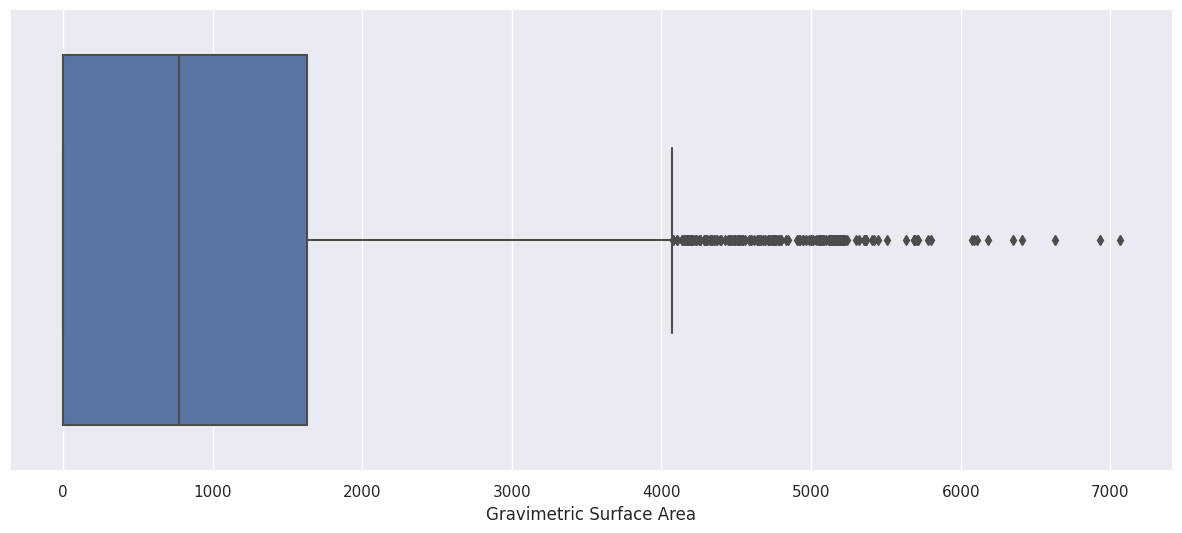

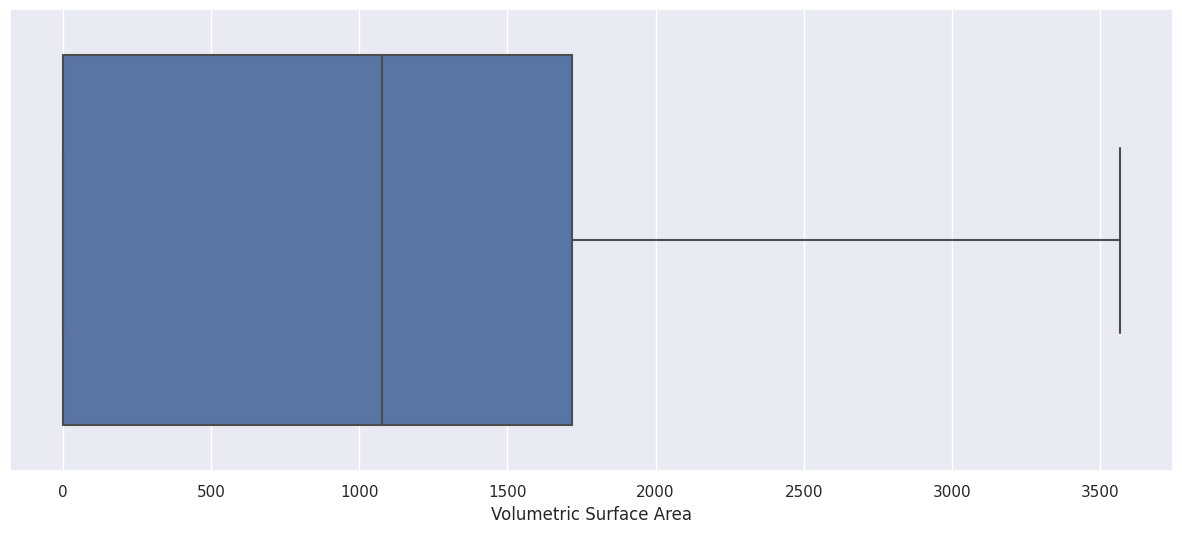

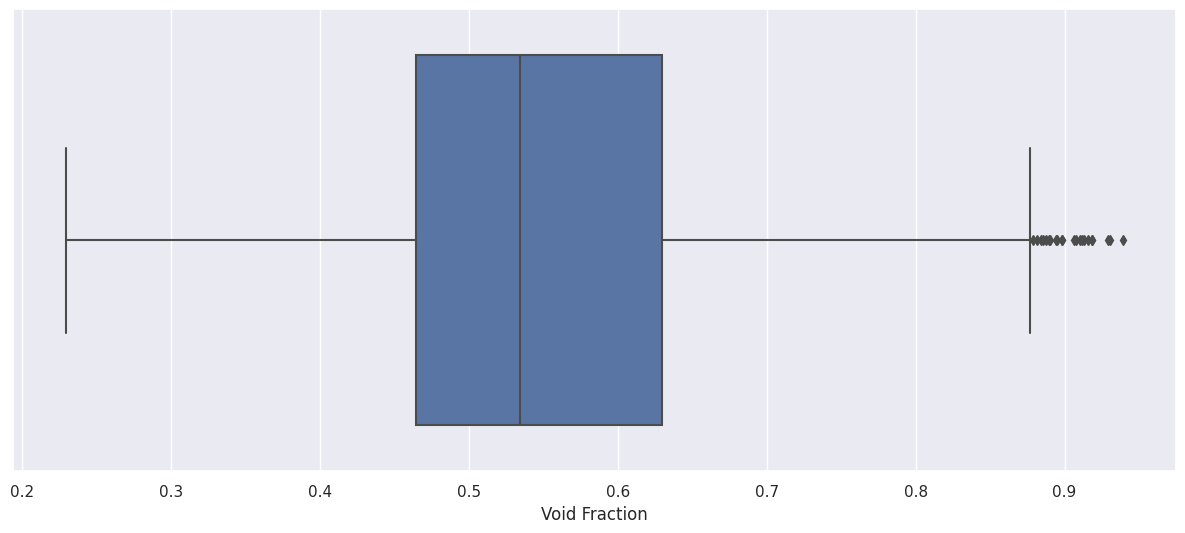

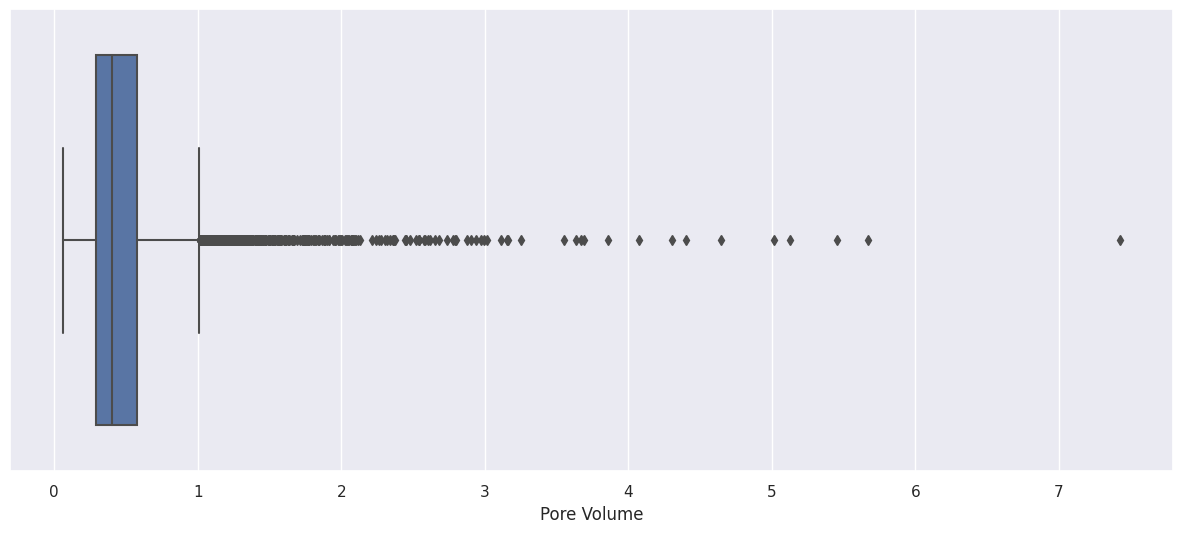

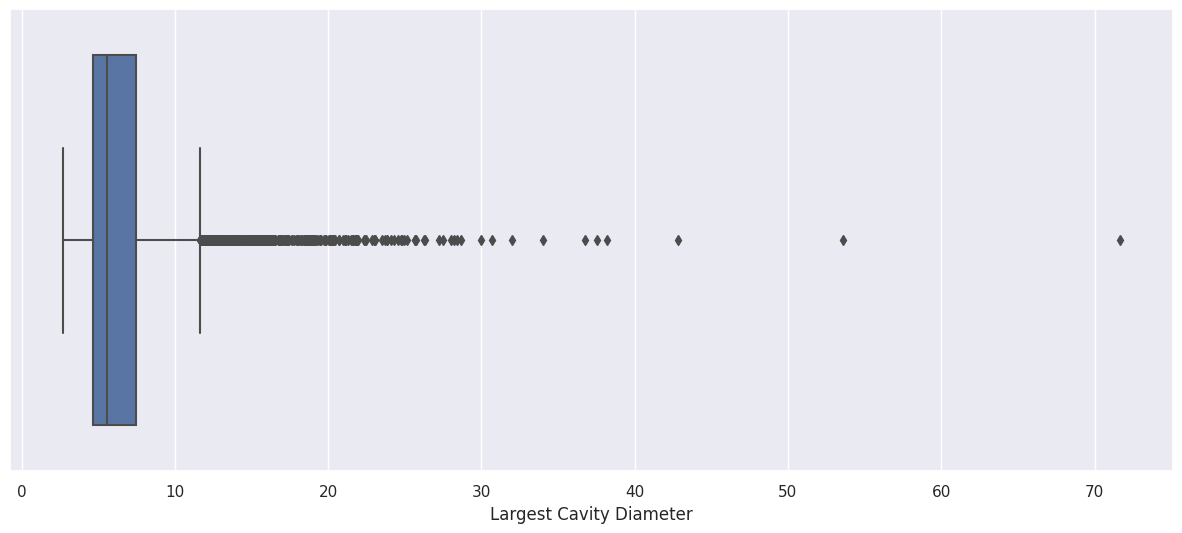

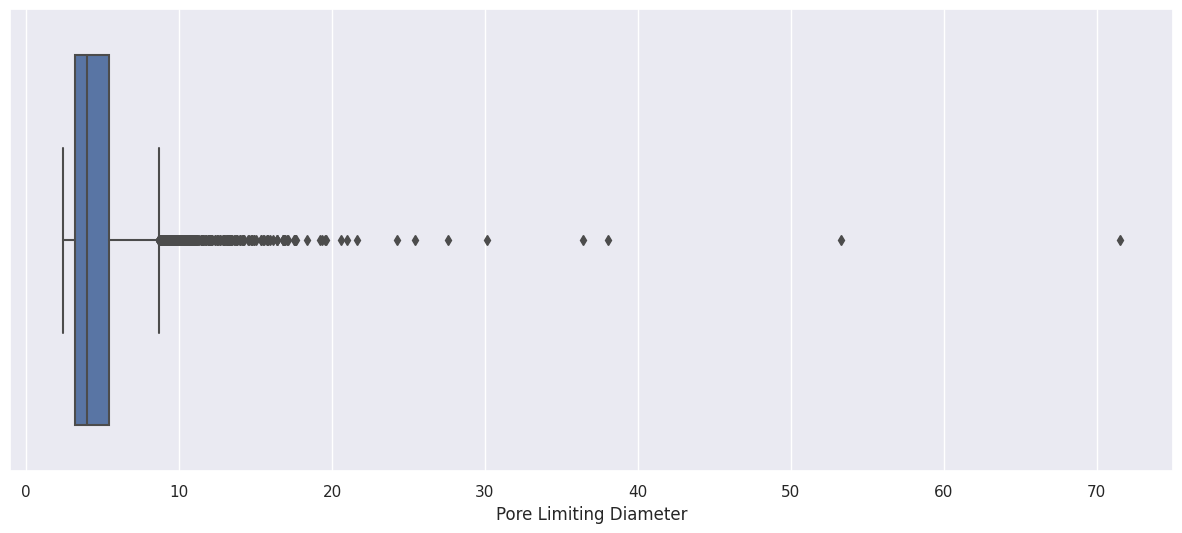

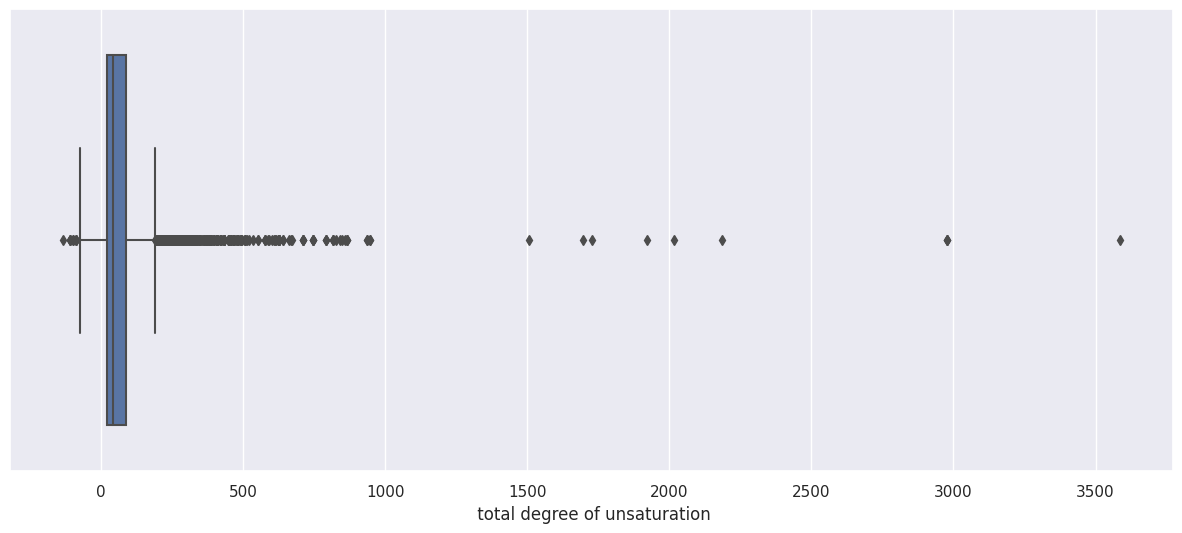

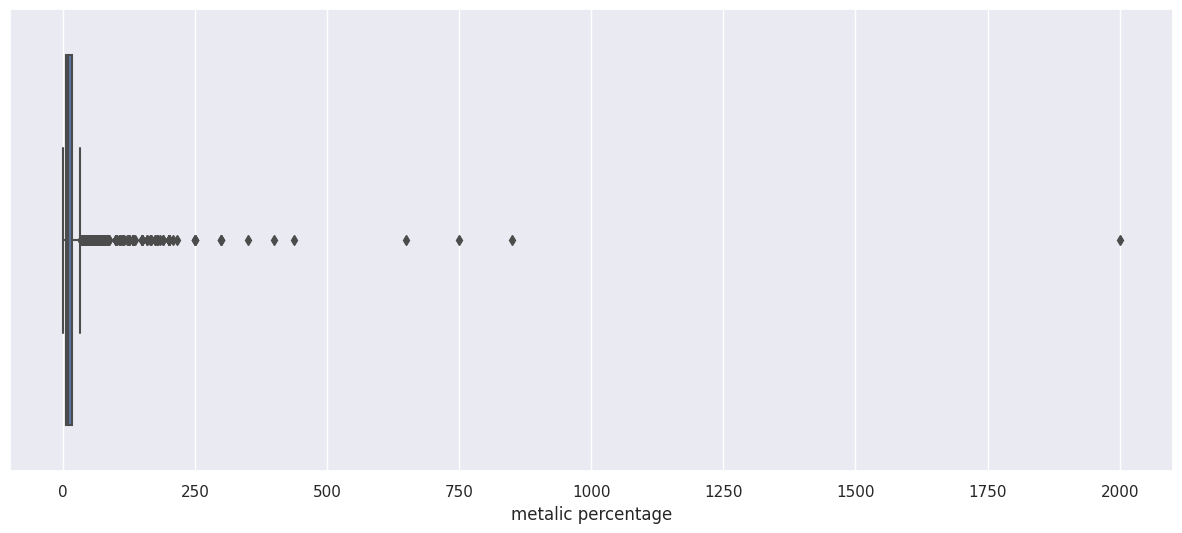

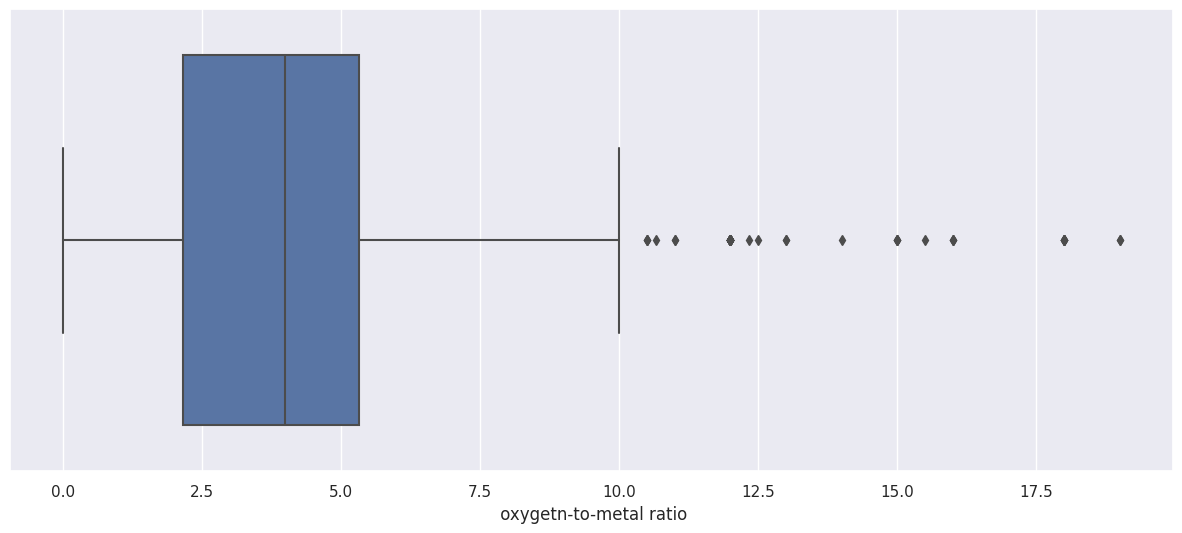

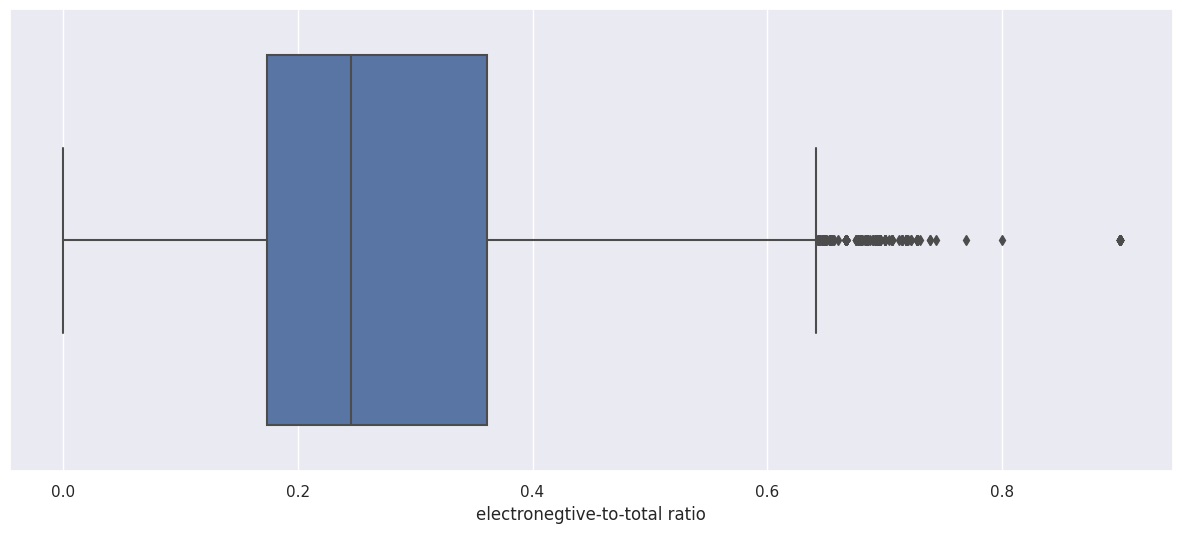

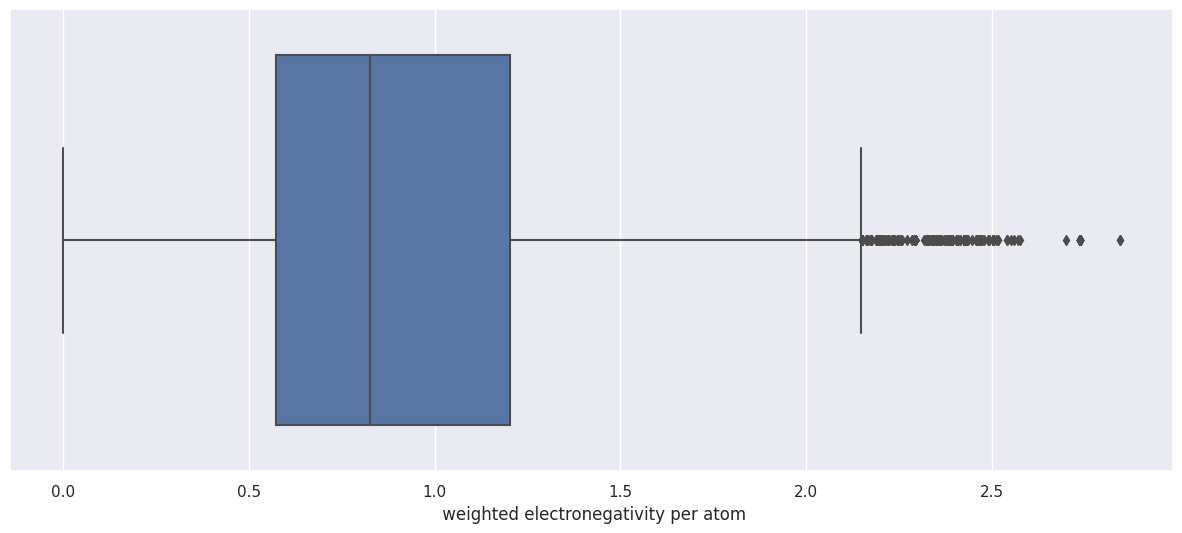

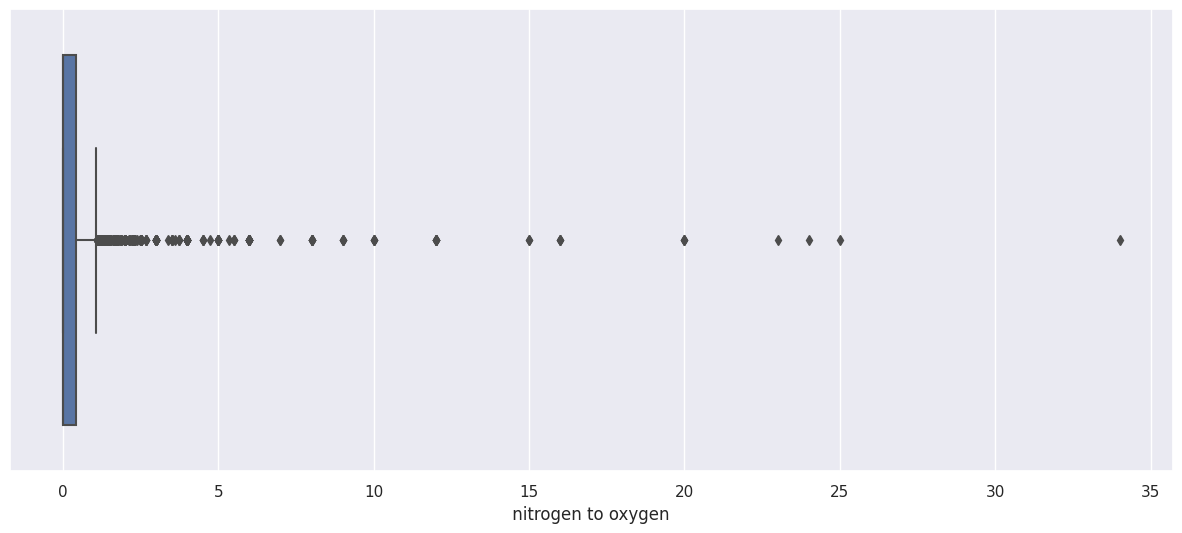

In [70]:
for column in dpc.columns:
  if column == "Kh CH4/Kh N2":
    break;
  plt.figure(figsize=(15,6))
  sns.boxplot(x=dpc[column])
  plt.xlabel(column)
  plt.show()

<Axes: >

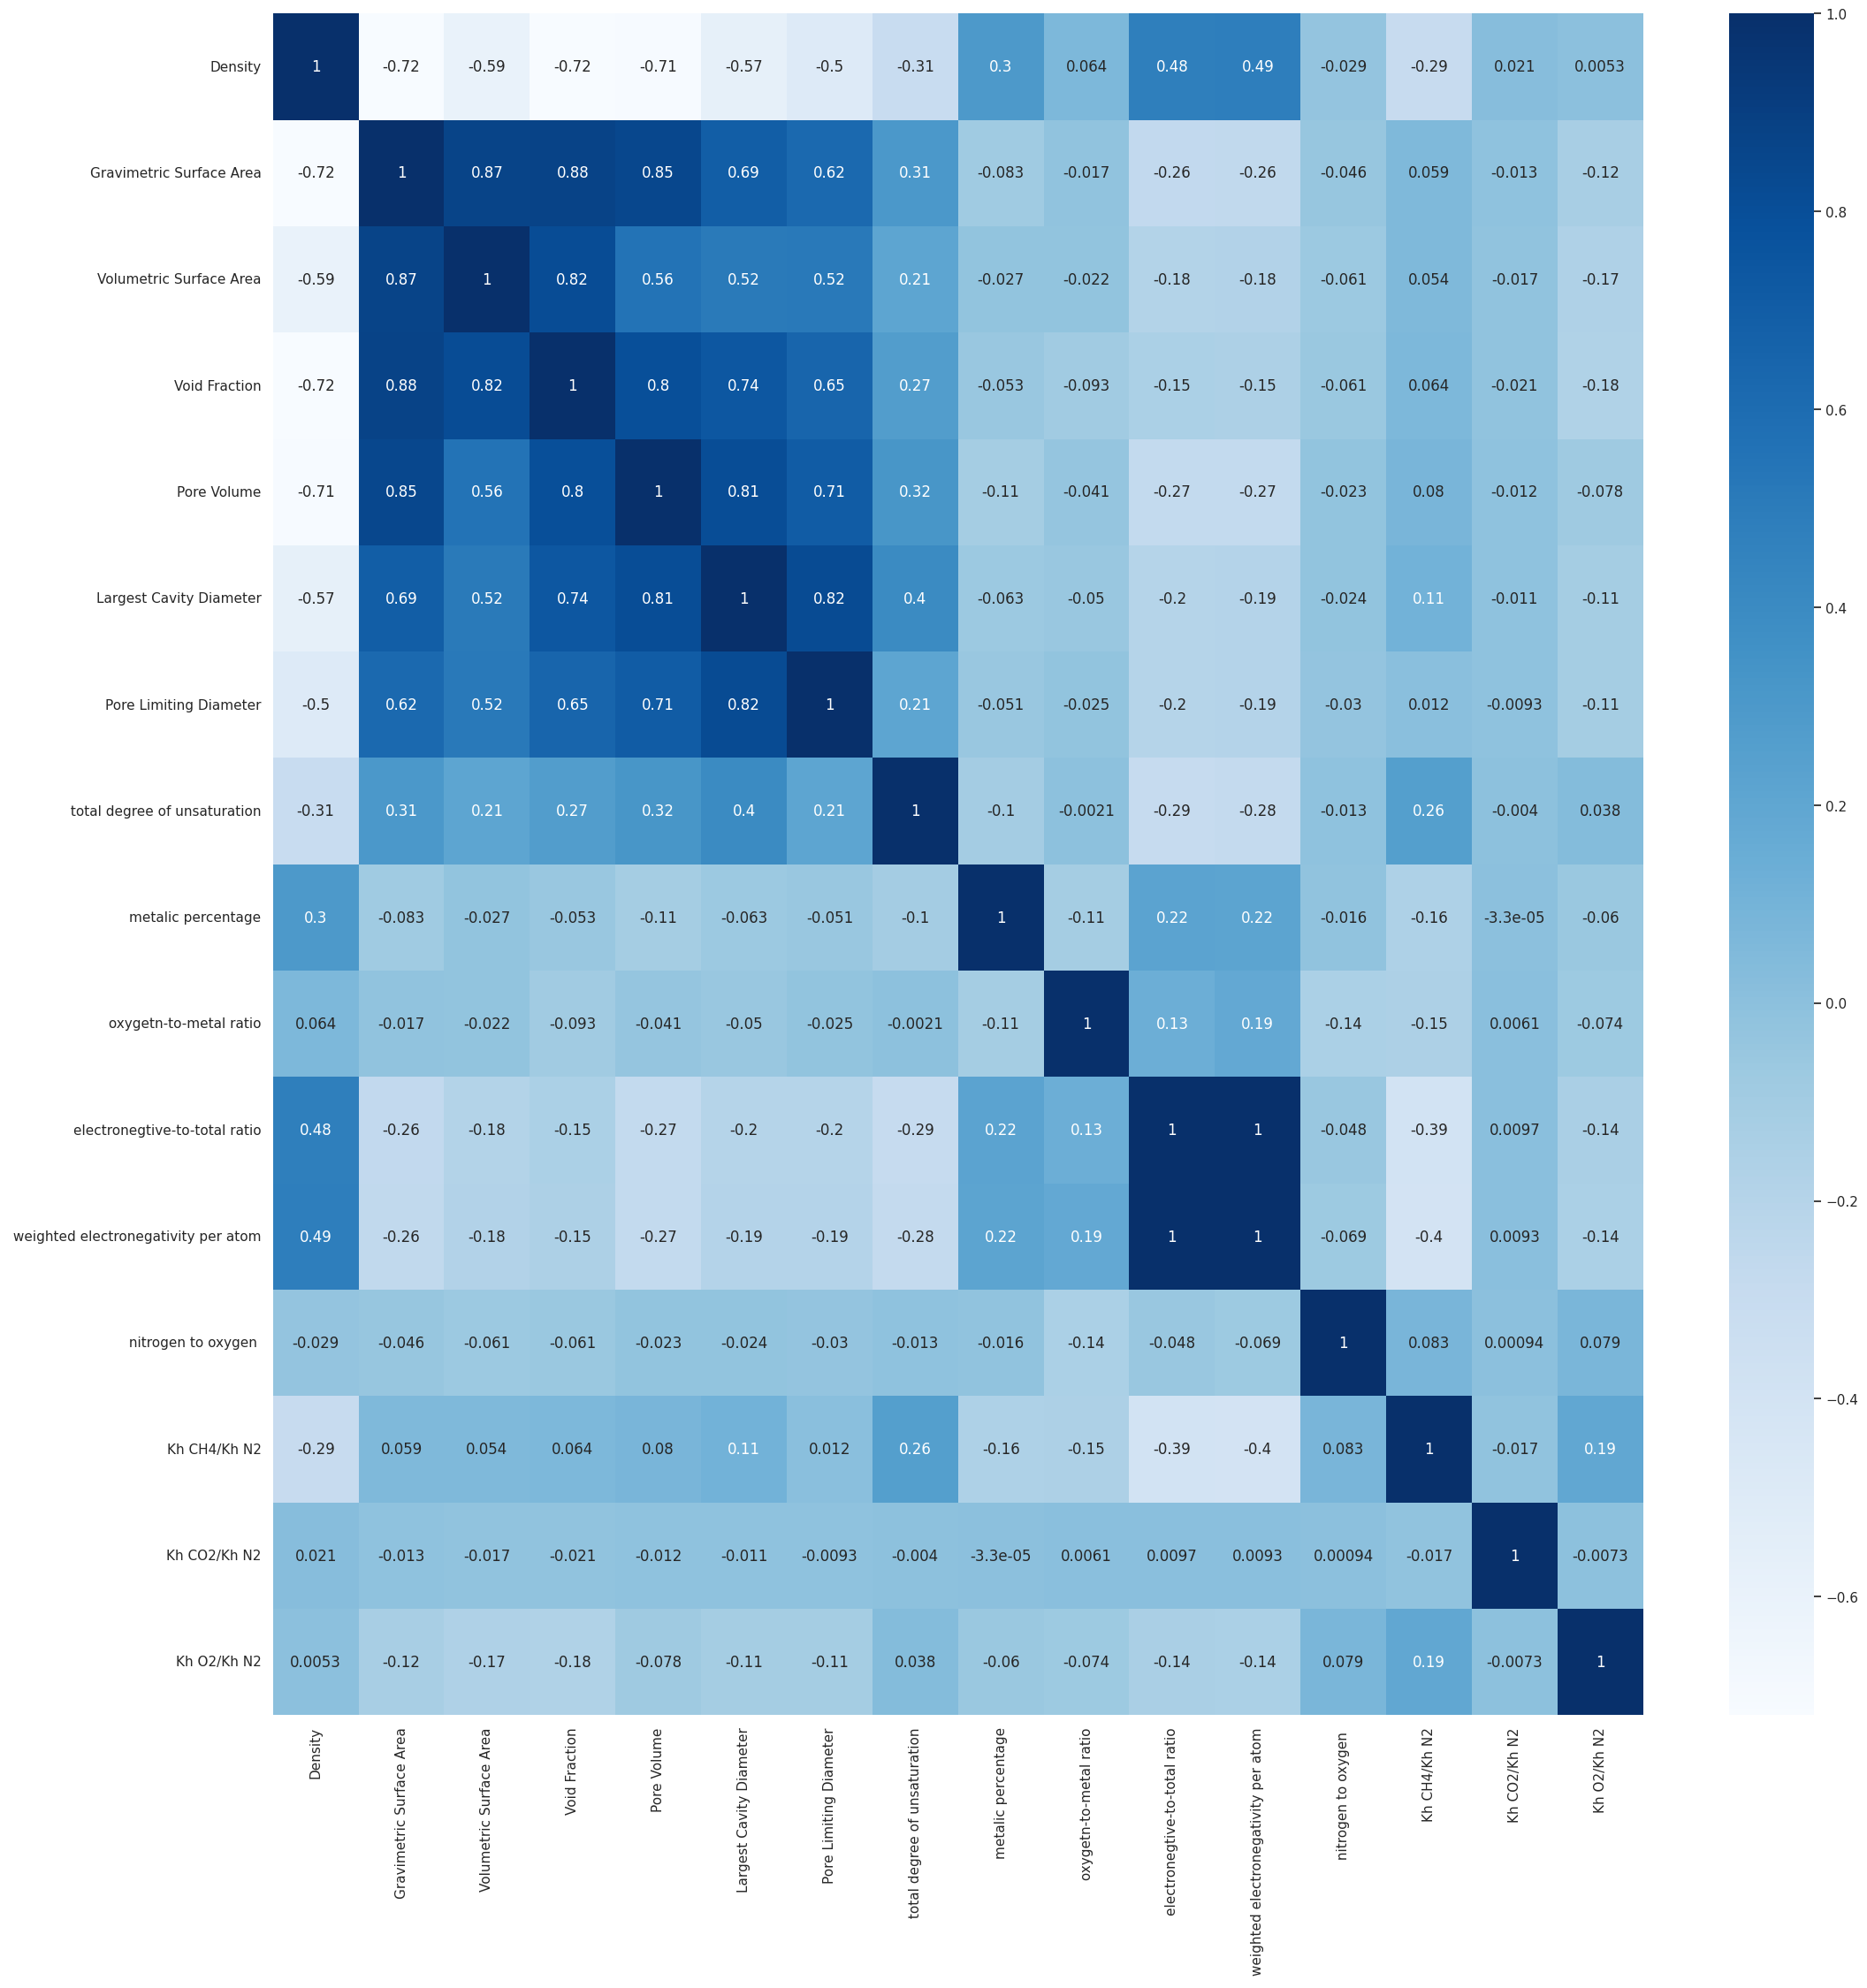

In [ ]:
plt.figure(figsize=(25, 25))
sns.heatmap(dpc.corr(), cmap="Blues", annot=True)

## Data Handling

### Removing potential outliers

In [ ]:
dx = dpc.drop(target_col, axis=1)

In [ ]:
dx.shape

(7664, 13)

In [ ]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Density                               7664 non-null   float64
 1   Gravimetric Surface Area              7664 non-null   float64
 2   Volumetric Surface Area               7664 non-null   float64
 3   Void Fraction                         7664 non-null   float64
 4   Pore Volume                           7664 non-null   float64
 5   Largest Cavity Diameter               7664 non-null   float64
 6   Pore Limiting Diameter                7664 non-null   float64
 7    total degree of unsaturation         7664 non-null   float64
 8   metalic percentage                    7664 non-null   float64
 9    oxygetn-to-metal ratio               7664 non-null   float64
 10  electronegtive-to-total ratio         7664 non-null   float64
 11   weighted electro

In [ ]:
from scipy.stats import zscore

# Assuming 'data' is your DataFrame or Series
z_scores = zscore(dx)
outliers = (z_scores > 3) | (z_scores < -3)

# Remove outliers from the DataFrame
do = dx[~outliers]

In [ ]:
do.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Density                               7575 non-null   float64
 1   Gravimetric Surface Area              7525 non-null   float64
 2   Volumetric Surface Area               7664 non-null   float64
 3   Void Fraction                         7647 non-null   float64
 4   Pore Volume                           7539 non-null   float64
 5   Largest Cavity Diameter               7529 non-null   float64
 6   Pore Limiting Diameter                7566 non-null   float64
 7    total degree of unsaturation         7576 non-null   float64
 8   metalic percentage                    7602 non-null   float64
 9    oxygetn-to-metal ratio               7613 non-null   float64
 10  electronegtive-to-total ratio         7628 non-null   float64
 11   weighted electro

In [ ]:
for column in do.columns:
  do.fillna(do[column].mean(), inplace = True)

In [ ]:
do.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Density                               7664 non-null   float64
 1   Gravimetric Surface Area              7664 non-null   float64
 2   Volumetric Surface Area               7664 non-null   float64
 3   Void Fraction                         7664 non-null   float64
 4   Pore Volume                           7664 non-null   float64
 5   Largest Cavity Diameter               7664 non-null   float64
 6   Pore Limiting Diameter                7664 non-null   float64
 7    total degree of unsaturation         7664 non-null   float64
 8   metalic percentage                    7664 non-null   float64
 9    oxygetn-to-metal ratio               7664 non-null   float64
 10  electronegtive-to-total ratio         7664 non-null   float64
 11   weighted electro

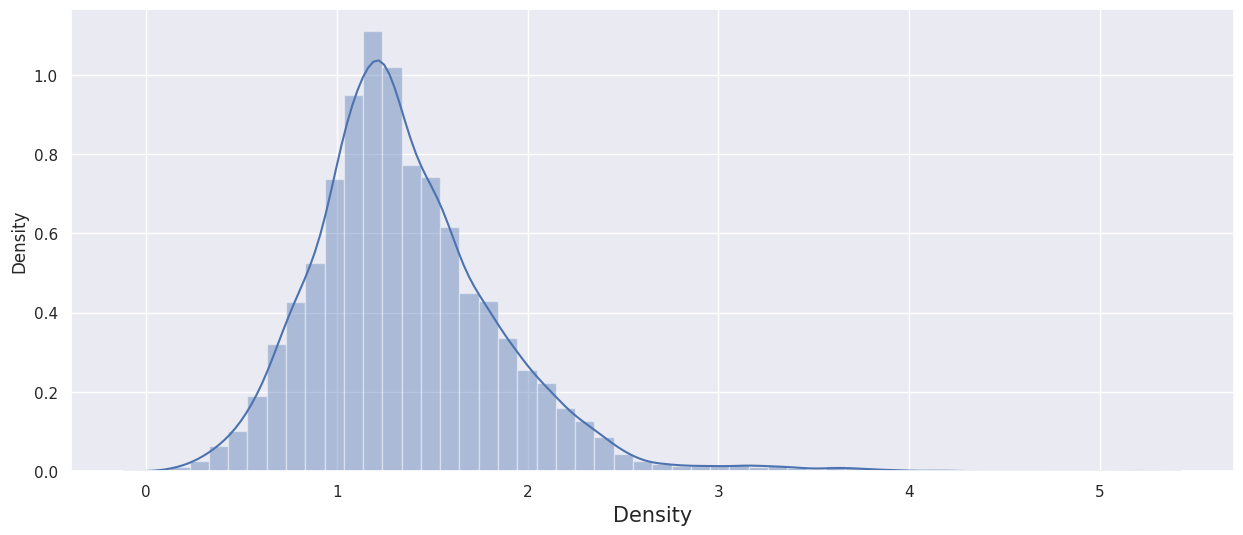

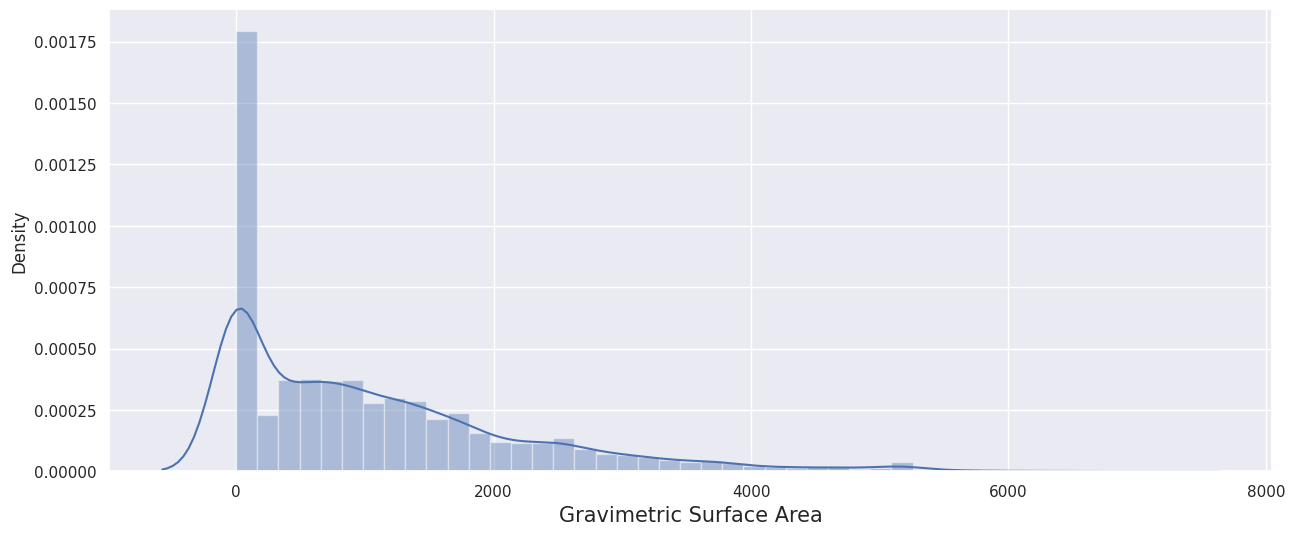

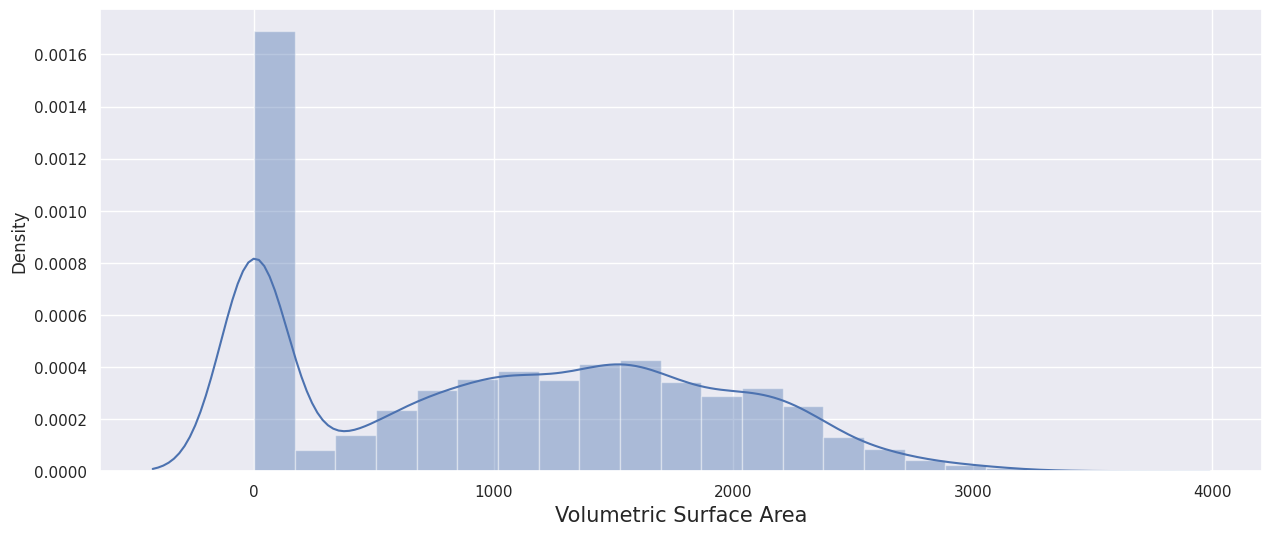

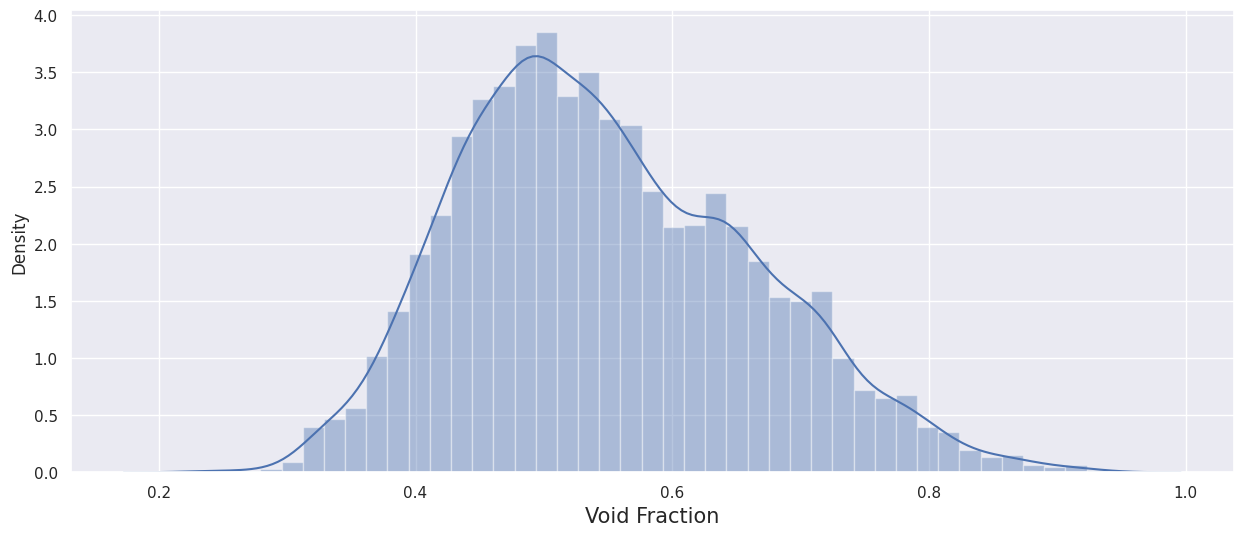

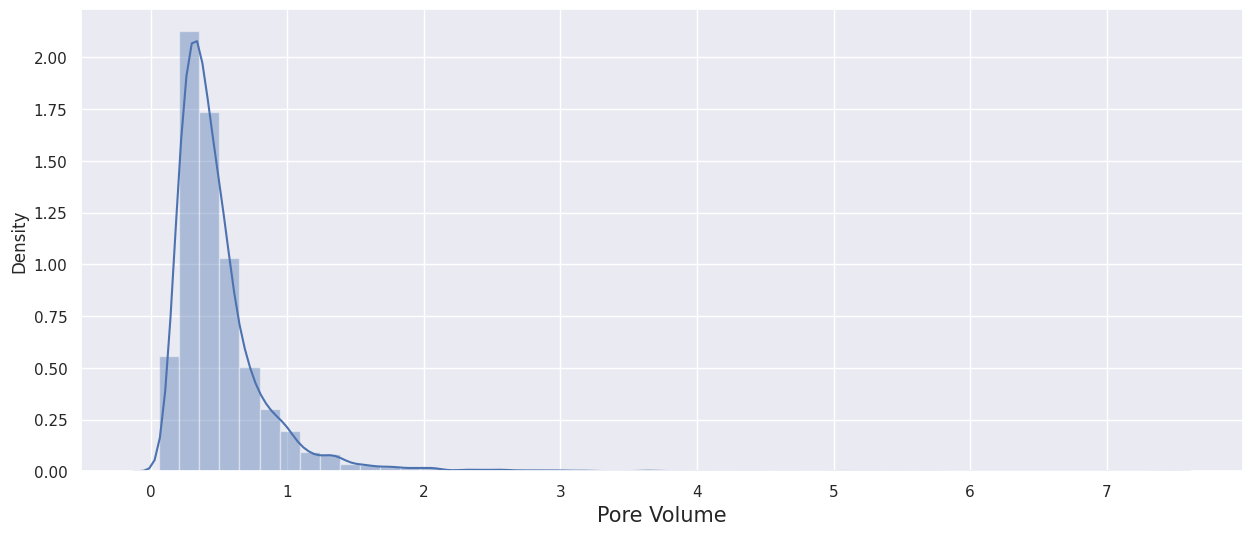

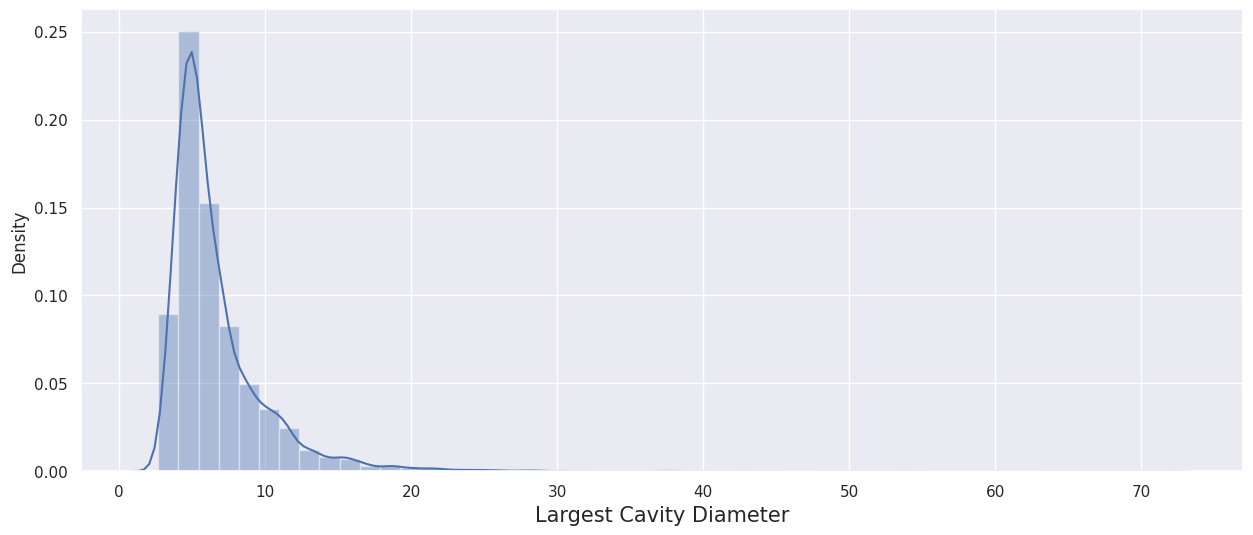

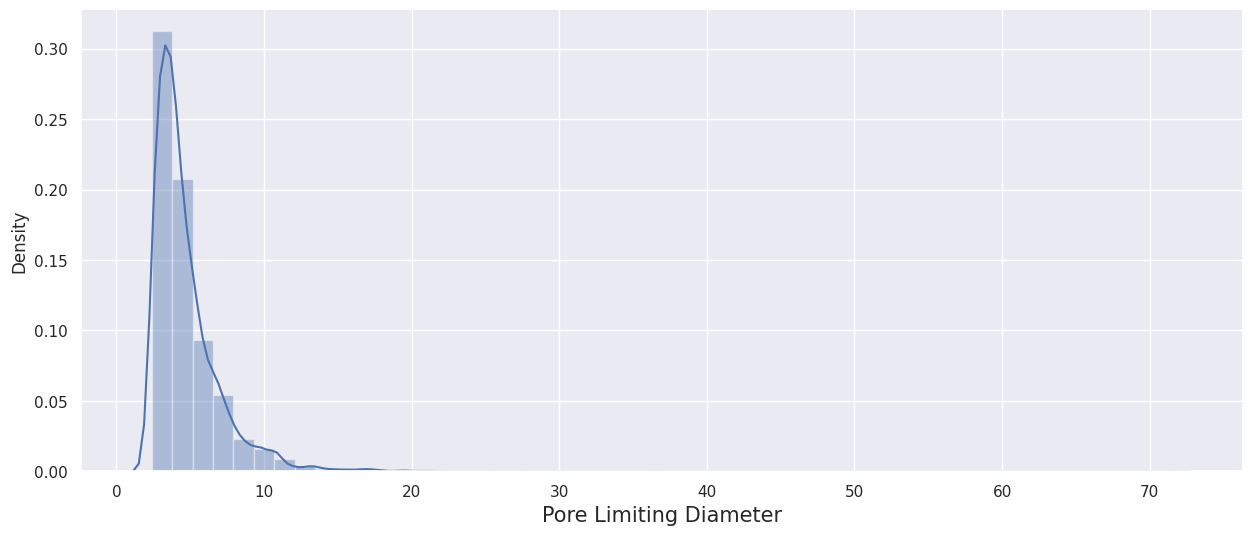

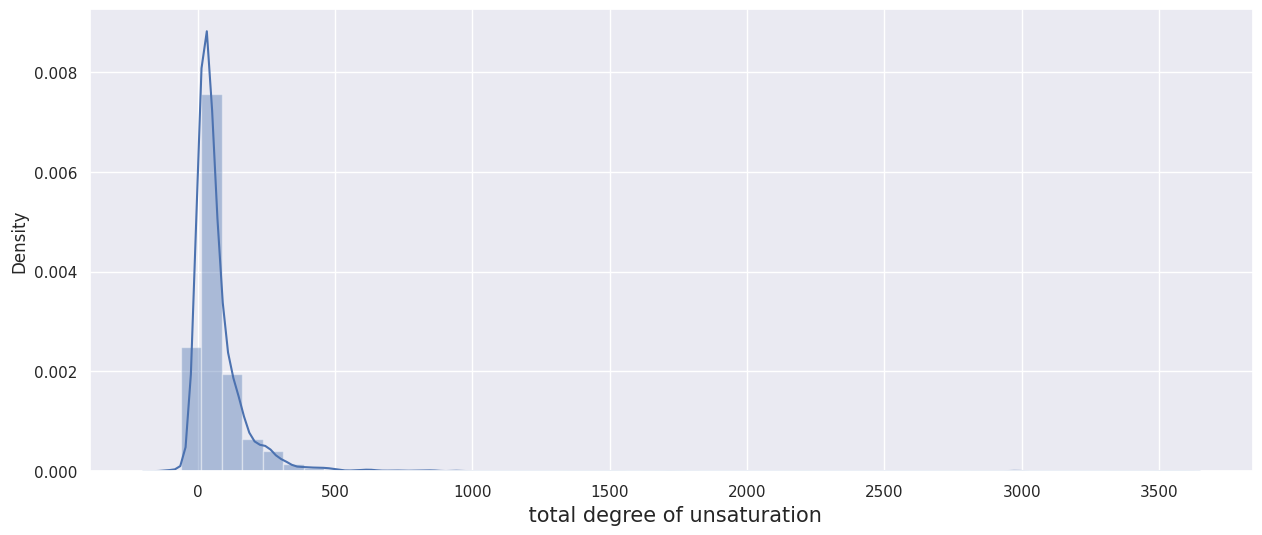

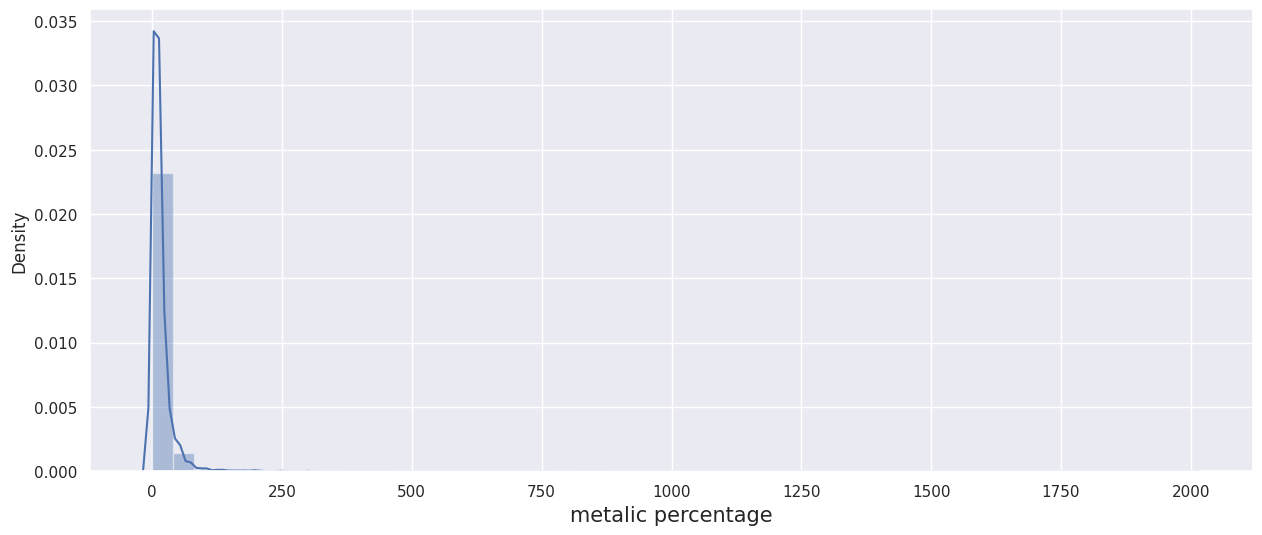

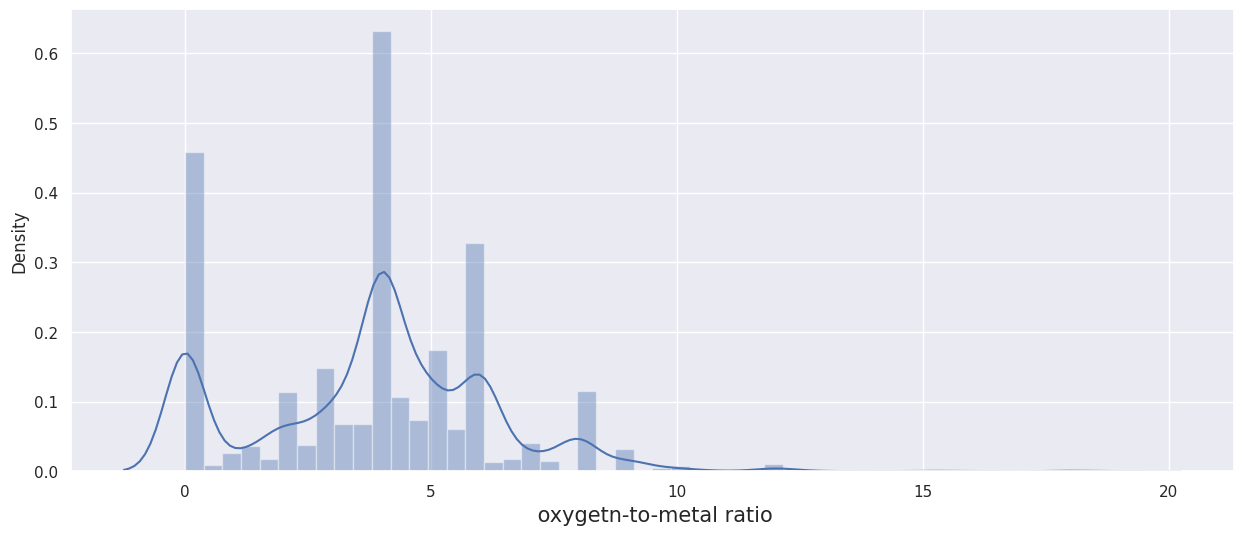

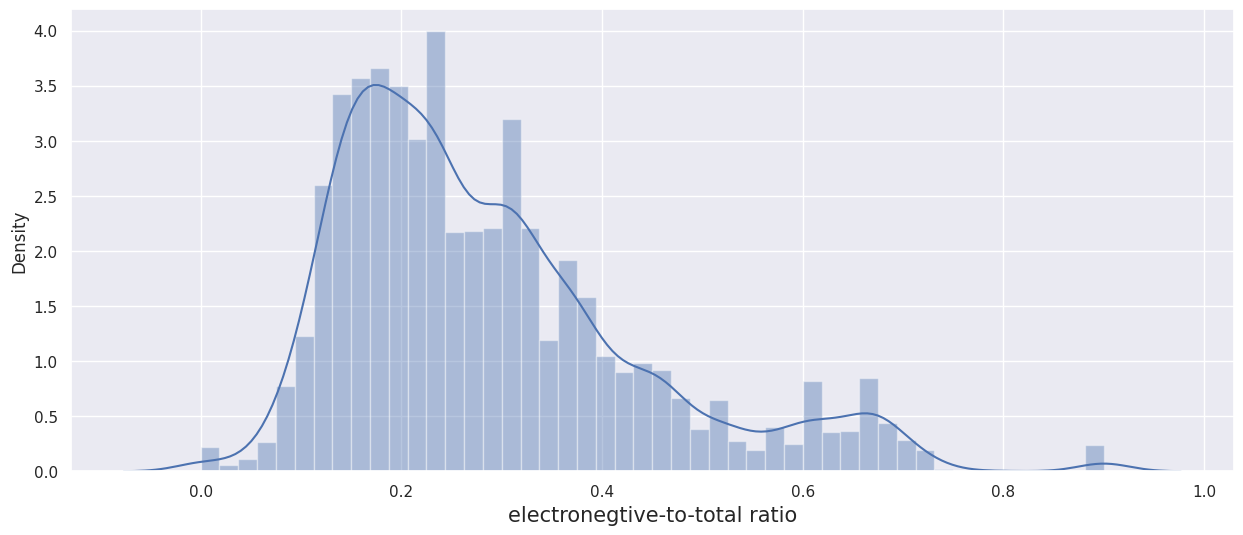

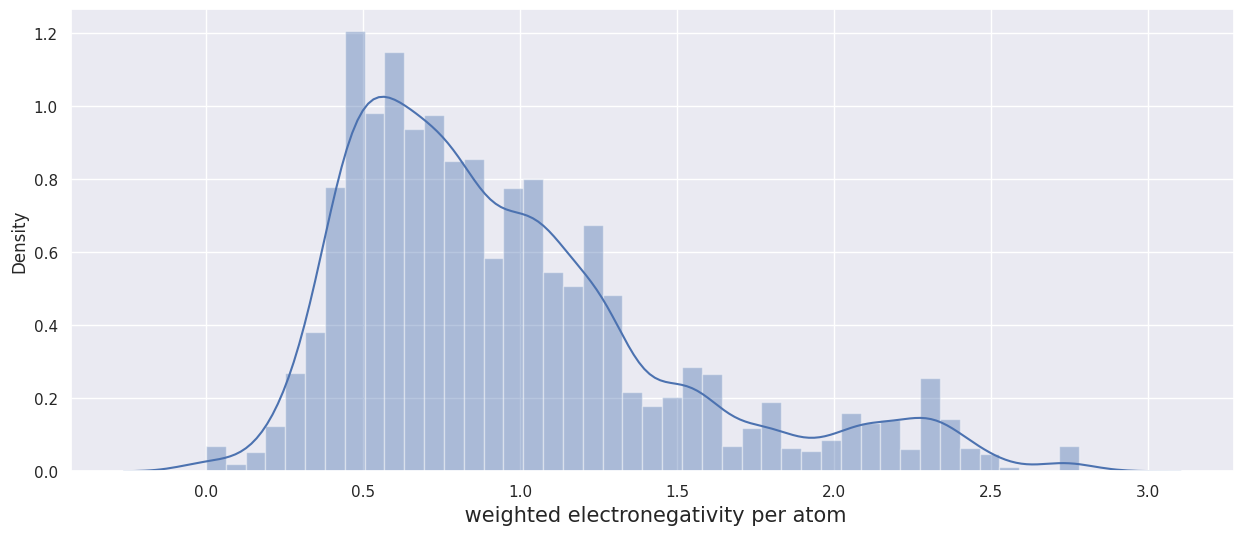

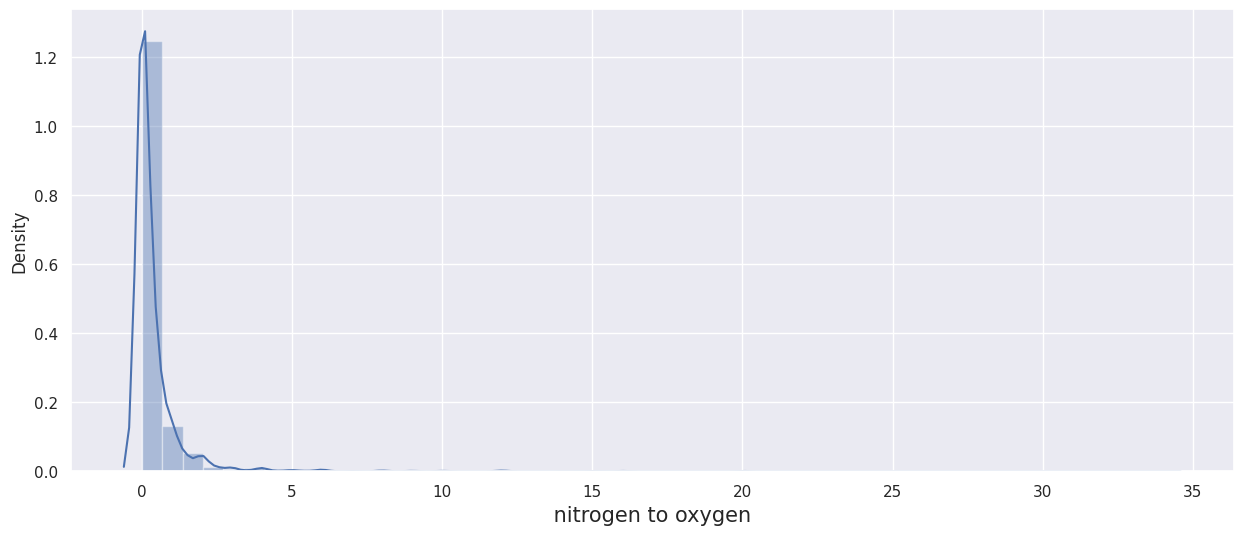

In [79]:
for column in dx.columns:
  plt.figure(figsize=(15,6))
  sns.distplot(dx[column])
  plt.xlabel(column, fontsize= 15)
  plt.plot()

### Checking Multicollinearity

In [80]:
## Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = dx
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(var, i) for i in range(var.shape[1])]
vif["Features"] = dx.columns

In [81]:
vif

VIF                              Features
0    16.483034                               Density
1    43.852999              Gravimetric Surface Area
2    32.266808               Volumetric Surface Area
3    61.809261                         Void Fraction
4    39.304355                           Pore Volume
5    26.299488               Largest Cavity Diameter
6    16.643171                Pore Limiting Diameter
7     1.793648          total degree of unsaturation
8     1.407034                    metalic percentage
9     4.952158                oxygetn-to-metal ratio
10  811.781216         electronegtive-to-total ratio
11  799.670045   weighted electronegativity per atom
12    1.174686                   nitrogen to oxygen

## Segregating Feature and Target Variables

In [82]:
X = dx.values
y1 = dp.iloc[:, -3].values
y2 = dp.iloc[:, -2].values
y3 = dp.iloc[:, -1].values

In [83]:
X.shape

(7664, 13)

In [84]:
y1.shape

(7664,)

## Feature Scaling

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [86]:
X_sc.shape

(7664, 13)

## Taking Ch4/N2 as Target Variable

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y1, test_size = 0.25,
                                                    random_state = 0)

In [88]:
X_train.shape

(5748, 13)

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [90]:
r21_score = []
def predict(ml_model):
  model = ml_model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  r2_score = metrics.r2_score(y_test, y_pred)
  r21_score.append(r2_score)
  print("r2 score: {}".format(r2_score))

  sns.distplot(y_test-y_pred)

r2 score: 0.2563191182630342


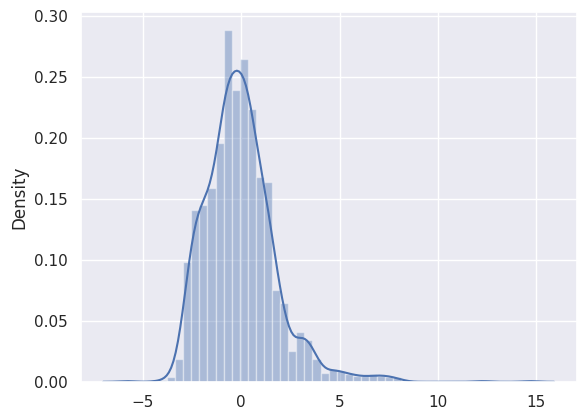

In [91]:
predict(LinearRegression())

r2 score: 0.4807769353606184


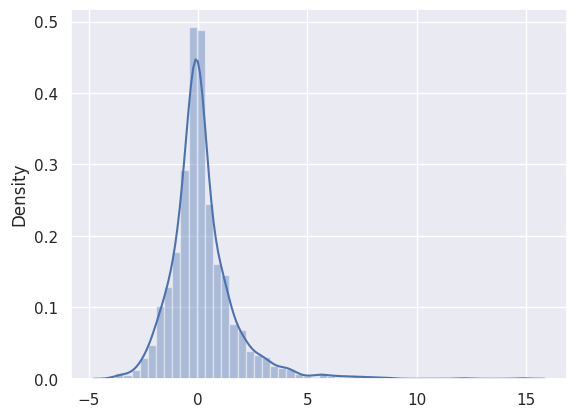

In [92]:
predict(SVR(kernel="rbf"))

r2 score: 0.24698923919248927


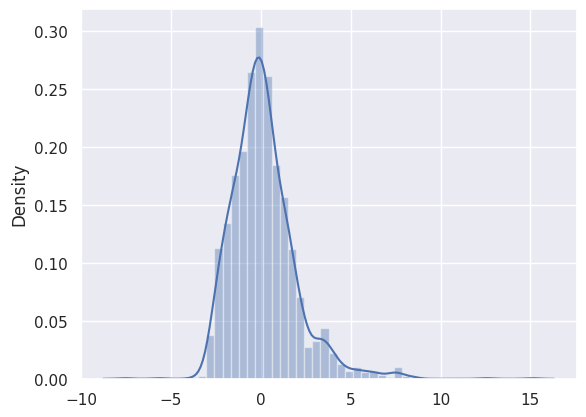

In [93]:
predict(SVR(kernel="linear"))

r2 score: 0.6518259600853131


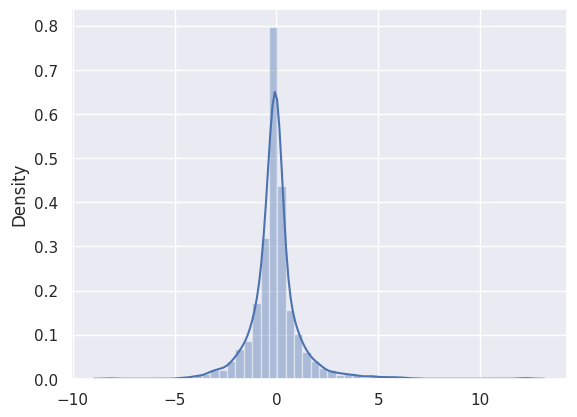

In [94]:
predict(RandomForestRegressor())

r2 score: 0.5097287376306626


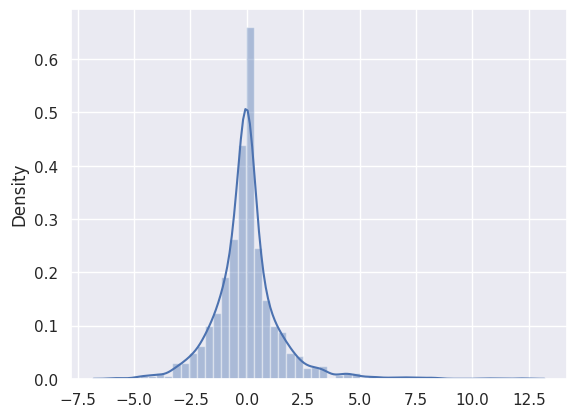

In [95]:
predict(KNeighborsRegressor())

r2 score: 0.6299655677103504


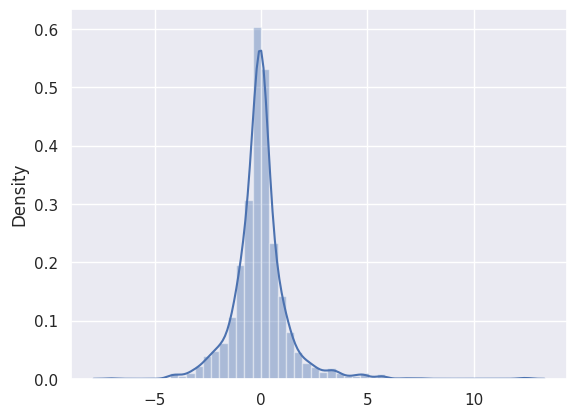

In [96]:
predict(XGBRegressor())

In [97]:
dr = pd.DataFrame(r21_score, index=["Linear Regression",
                                      "SVR (RBF)", "SVR (Linear)", "Random Forest", "KNN", "XGBoostRegressor"],
                  columns = ["R2 Score"])

In [98]:
dr

R2 Score
Linear Regression  0.256319
SVR (RBF)          0.480777
SVR (Linear)       0.246989
Random Forest      0.651826
KNN                0.509729
XGBoostRegressor   0.629966

## Taking CO2/N2 as Target Variable

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y2, test_size = 0.25,
                                                    random_state = 0)

In [100]:
X_train.shape

(5748, 13)

In [101]:
r22_score = []
def predict(ml_model):
  model = ml_model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  r2_score = metrics.r2_score(y_test, y_pred)
  r22_score.append(r2_score)
  print("r2 score: {}".format(r2_score))

  sns.distplot(y_test-y_pred)

r2 score: -0.0004238824025799559


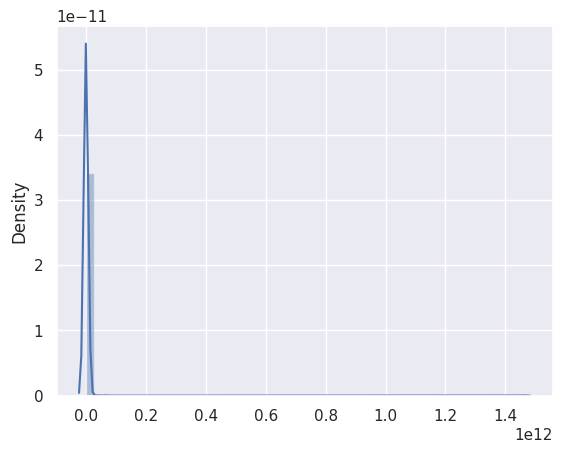

In [102]:
predict(LinearRegression())

r2 score: -0.0006328401875013157


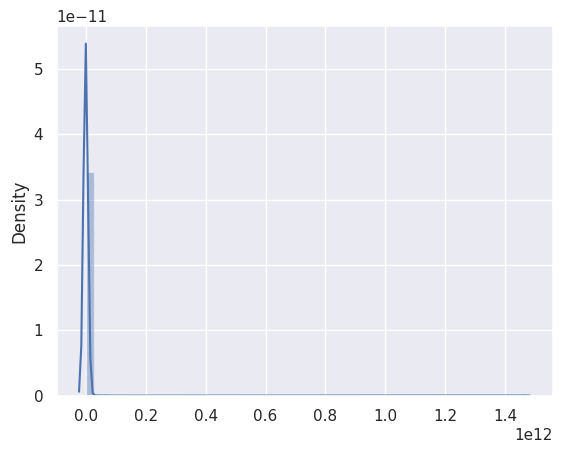

In [103]:
predict(SVR(kernel="rbf"))

r2 score: -0.0006328401134143569


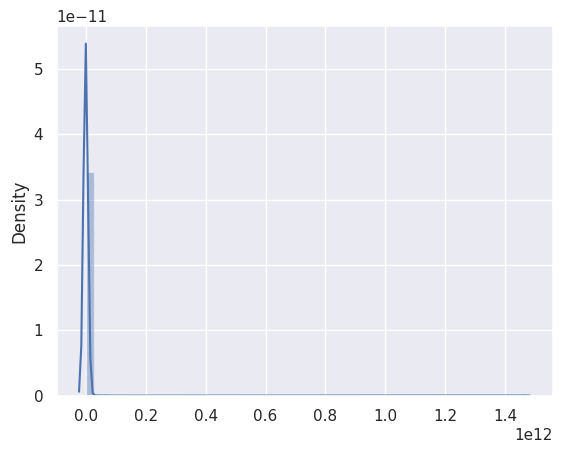

In [104]:
predict(SVR(kernel="linear"))

r2 score: 0.00018255460723781702


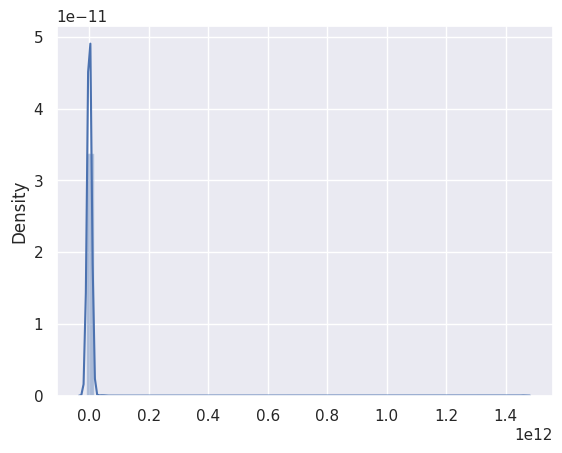

In [105]:
predict(RandomForestRegressor())

r2 score: 0.012374435277688112


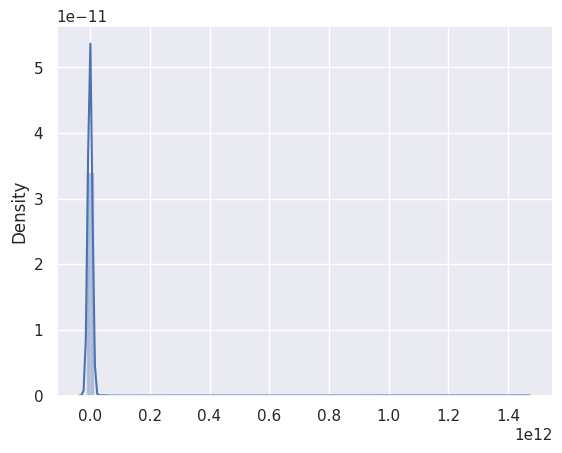

In [106]:
predict(KNeighborsRegressor())

r2 score: -0.00044922488875354105


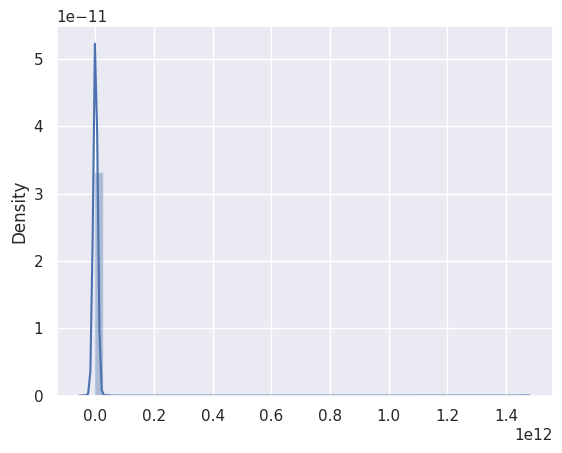

In [107]:
predict(XGBRegressor())

In [108]:
dr = pd.DataFrame(r22_score, index=["Linear Regression",
                                      "SVR (RBF)", "SVR (Linear)", "Random Forest", "KNN", "XGBoostRegressor"],
                  columns = ["R2 Score"])

In [109]:
dr

R2 Score
Linear Regression -0.000424
SVR (RBF)         -0.000633
SVR (Linear)      -0.000633
Random Forest      0.000183
KNN                0.012374
XGBoostRegressor  -0.000449

## Taking O2/N2 as Target Variable

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y3, test_size = 0.25,
                                                    random_state = 0)

In [111]:
X_train.shape

(5748, 13)

In [112]:
r23_score = []
def predict(ml_model):
  model = ml_model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  r2_score = metrics.r2_score(y_test, y_pred)
  r23_score.append(r2_score)
  print("r2 score: {}".format(r2_score))

  sns.distplot(y_test-y_pred)

r2 score: 0.09872954500444953


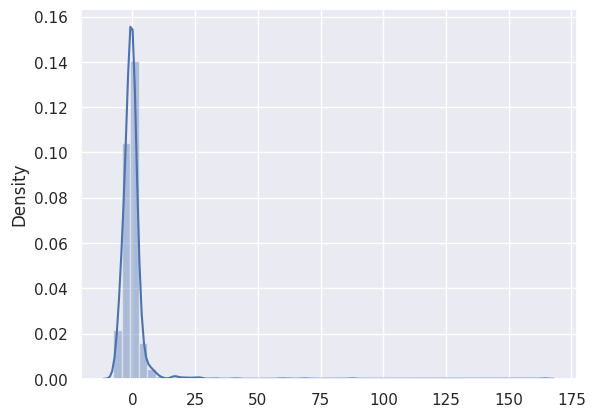

In [113]:
predict(LinearRegression())

r2 score: 0.14995958874068904


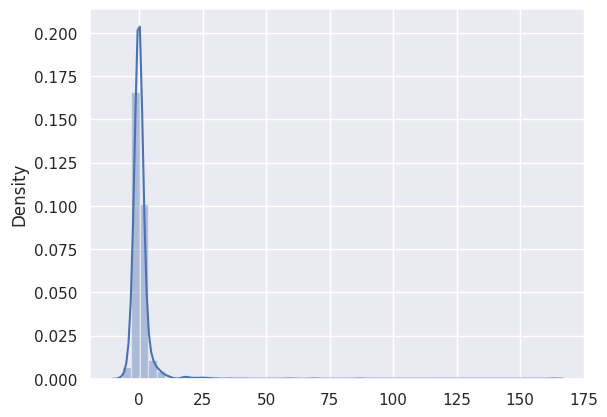

In [114]:
predict(SVR(kernel="rbf"))

r2 score: 0.05887964184744332


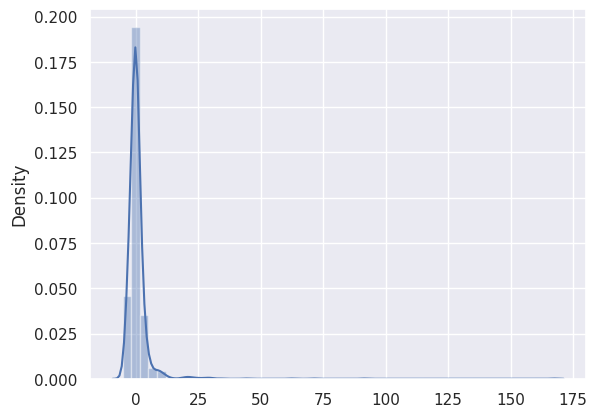

In [115]:
predict(SVR(kernel="linear"))

r2 score: 0.6310346337049588


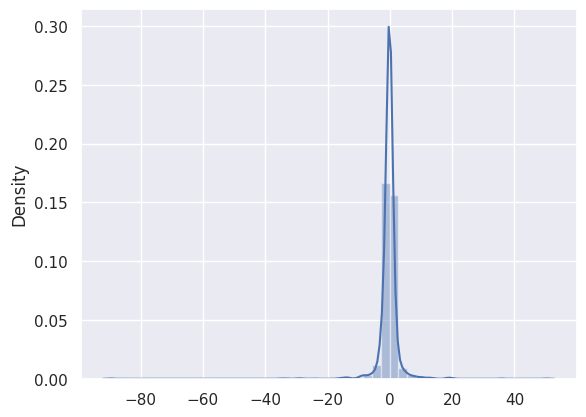

In [116]:
predict(RandomForestRegressor())

r2 score: 0.23351228680127045


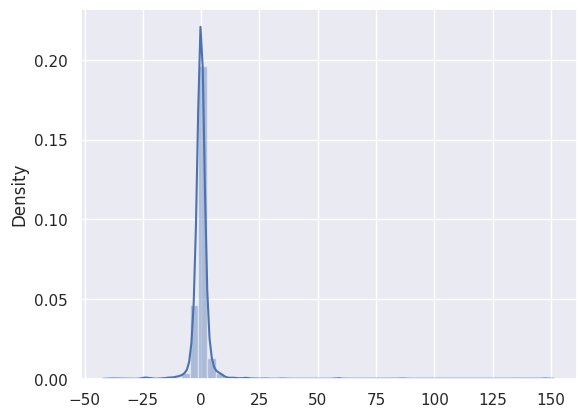

In [117]:
predict(KNeighborsRegressor())

r2 score: 0.22407269729854962


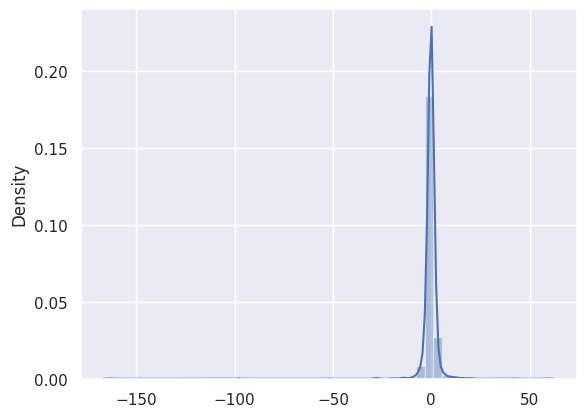

In [118]:
predict(XGBRegressor())

In [119]:
dr = pd.DataFrame(r23_score, index=["Linear Regression",
                                      "SVR (RBF)", "SVR (Linear)", "Random Forest", "KNN", "XGBoostRegressor"],
                  columns = ["R2 Score"])

In [120]:
dr

R2 Score
Linear Regression  0.098730
SVR (RBF)          0.149960
SVR (Linear)       0.058880
Random Forest      0.631035
KNN                0.233512
XGBoostRegressor   0.224073

# Taking chemical, physical and no of elements present in the target site as features

In [121]:
dfe = pd.concat([df.iloc[:,5:12], df.iloc[:, 13:29], df["Kh CH4/Kh N2"], df["Kh CO2/Kh N2"], df["Kh O2/Kh N2"]], axis=1)

In [122]:
dfe.shape

(7664, 26)

In [123]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Density                               7664 non-null   float64
 1   Gravimetric Surface Area              7664 non-null   float64
 2   Volumetric Surface Area               7664 non-null   float64
 3   Void Fraction                         7664 non-null   float64
 4   Pore Volume                           7664 non-null   float64
 5   Largest Cavity Diameter               7664 non-null   float64
 6   Pore Limiting Diameter                7664 non-null   float64
 7    H                                    7664 non-null   int64  
 8   C                                     7664 non-null   int64  
 9   N                                     7664 non-null   int64  
 10  F                                     7664 non-null   int64  
 11  Cl               

## Data Visualisation

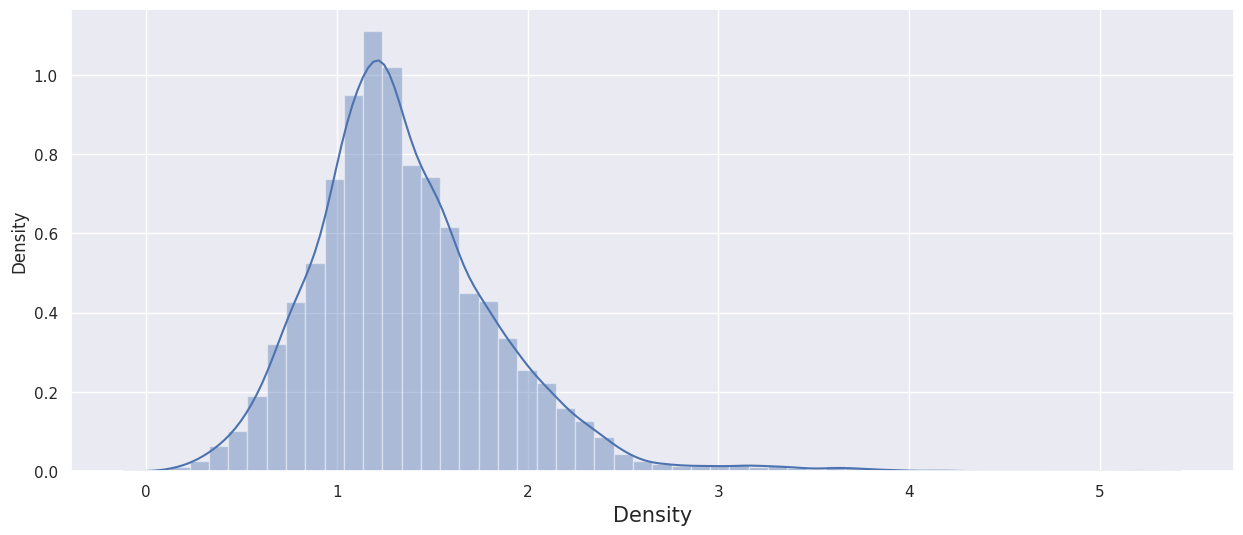

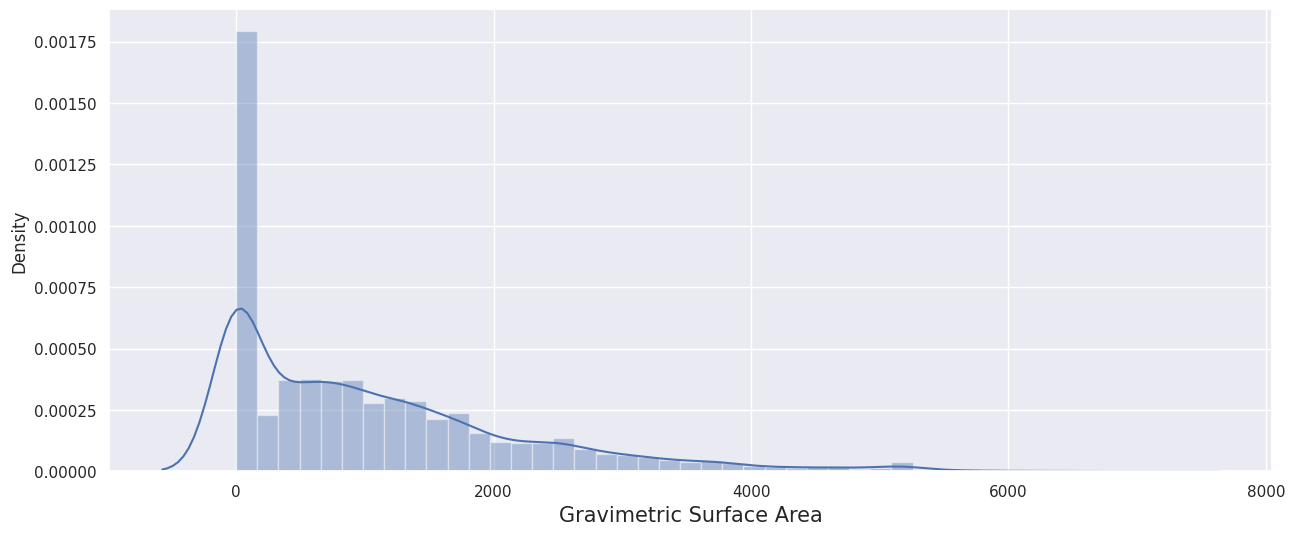

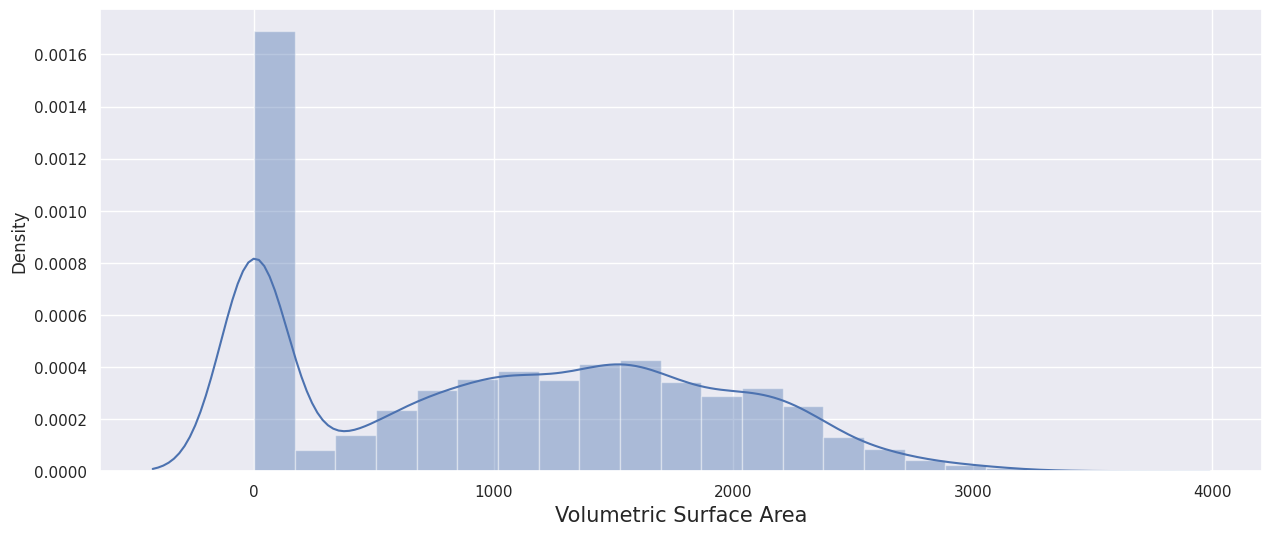

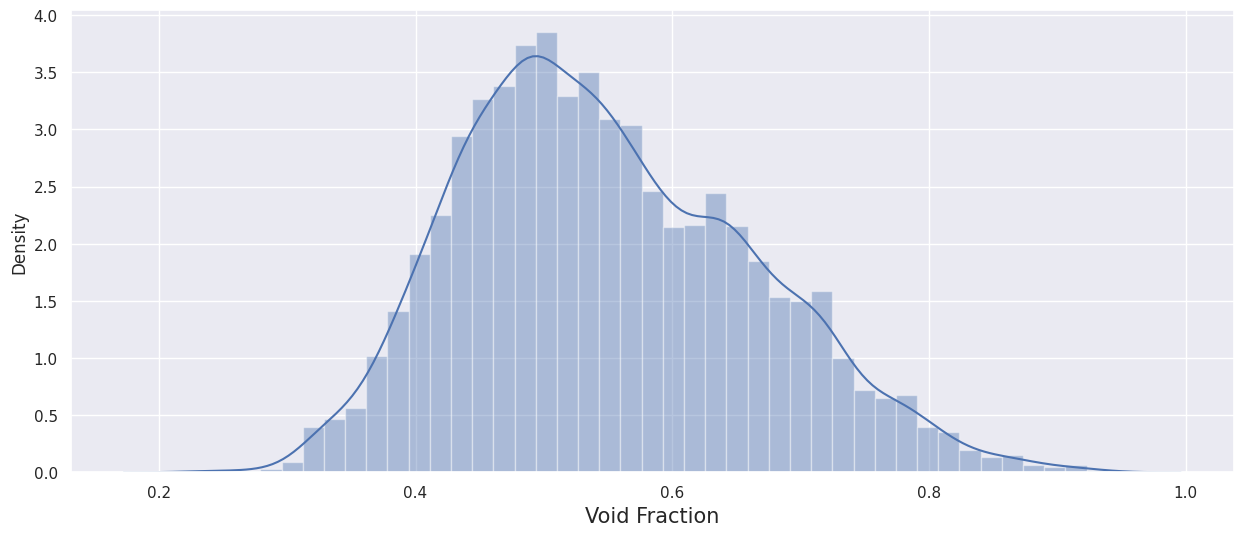

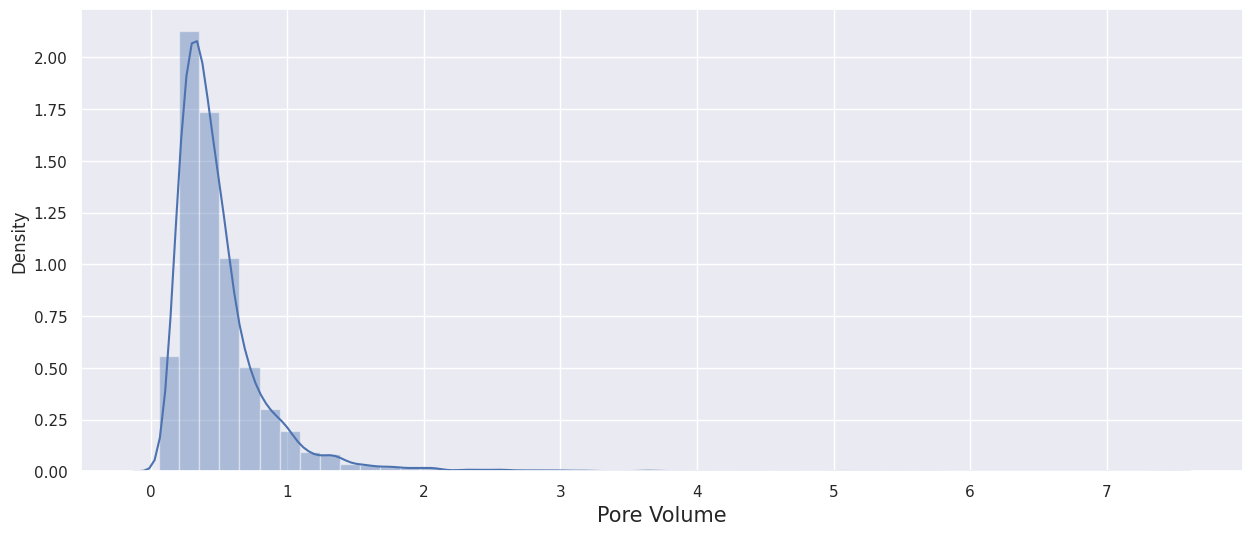

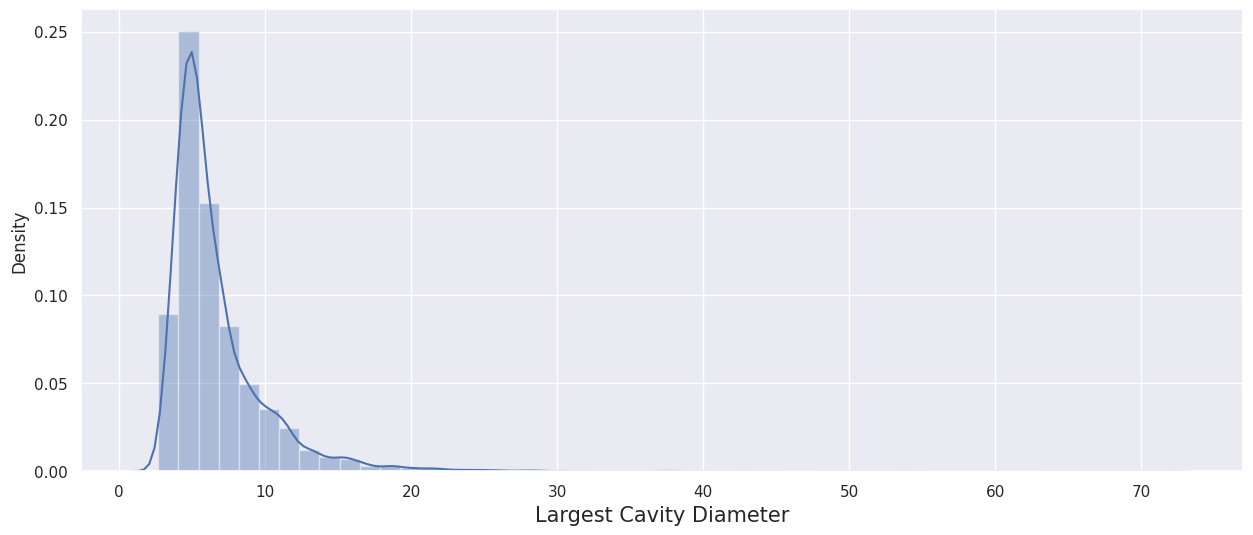

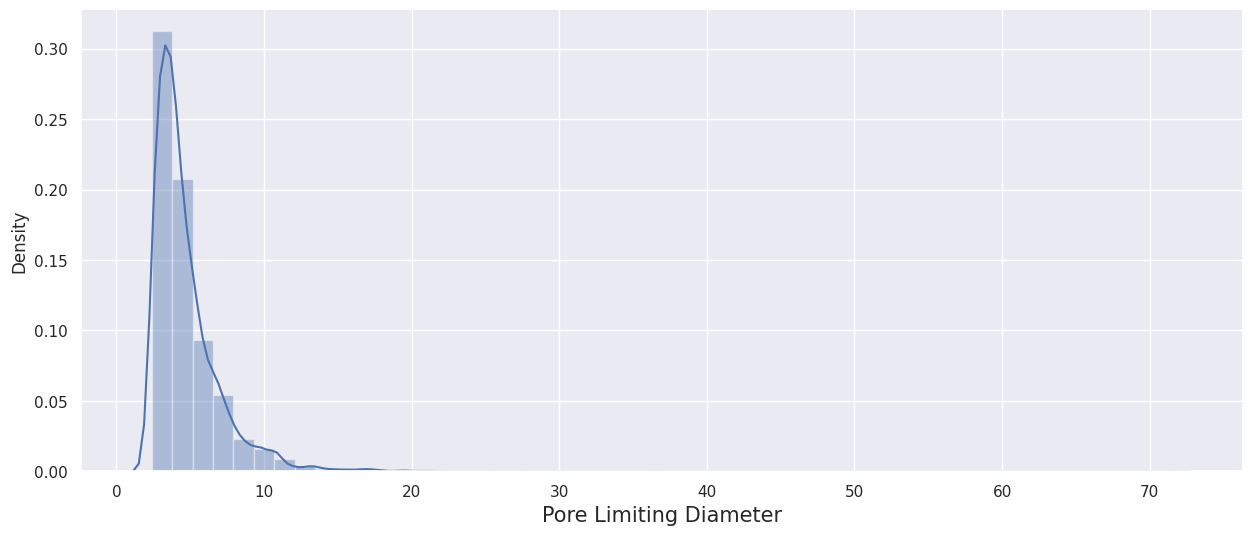

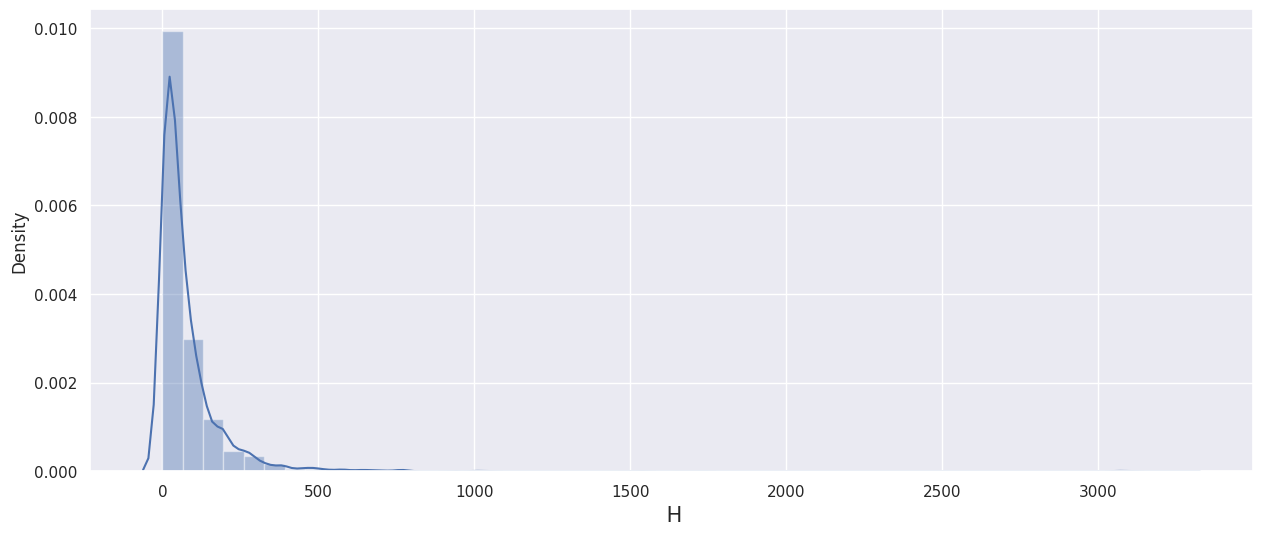

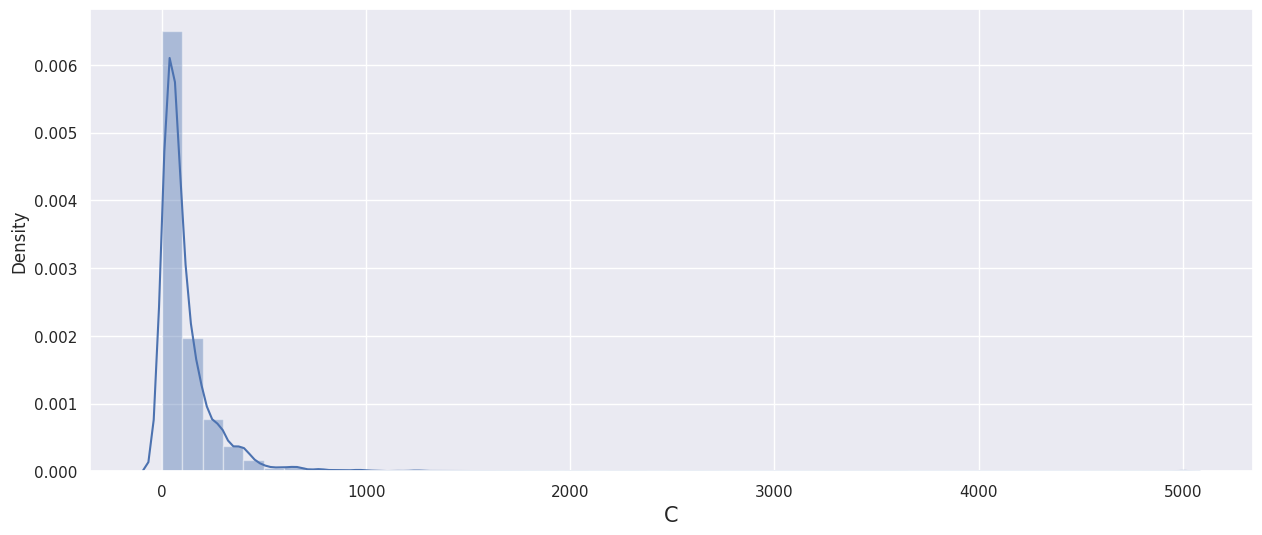

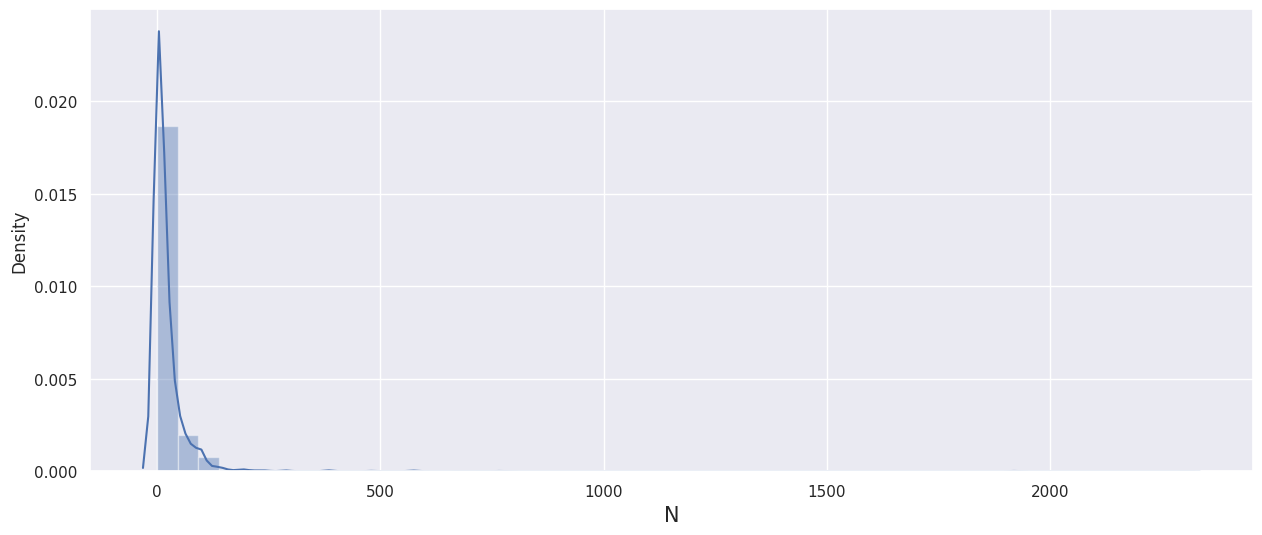

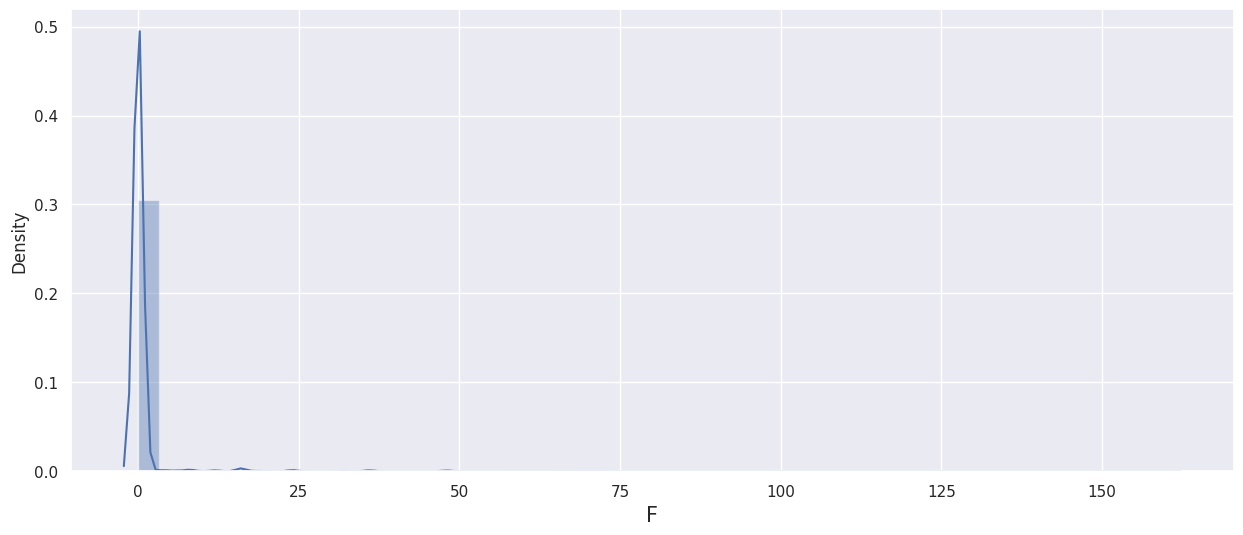

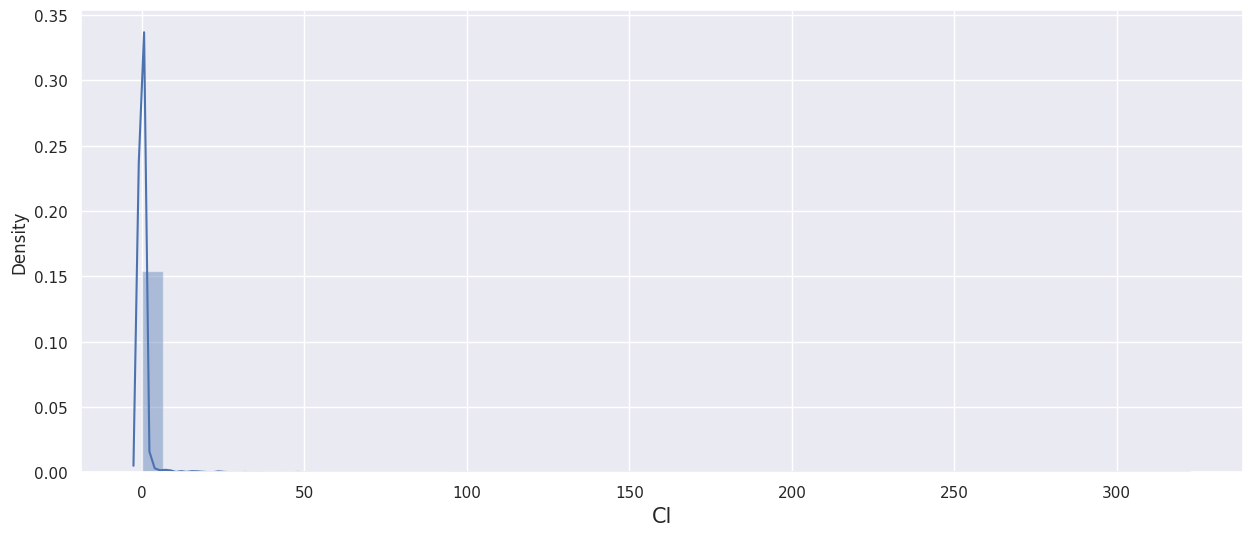

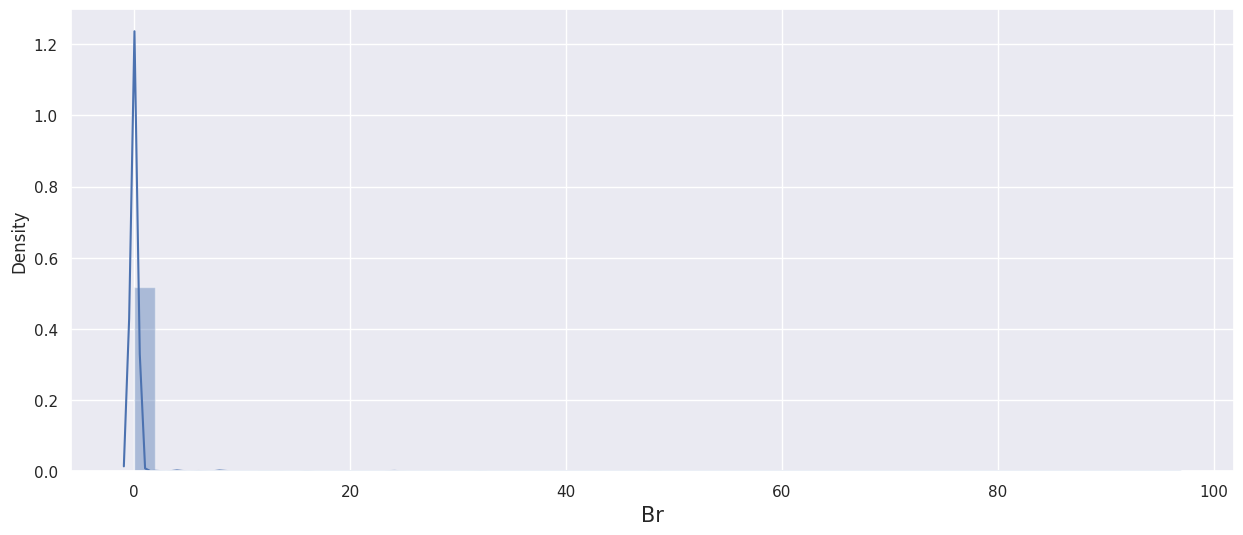

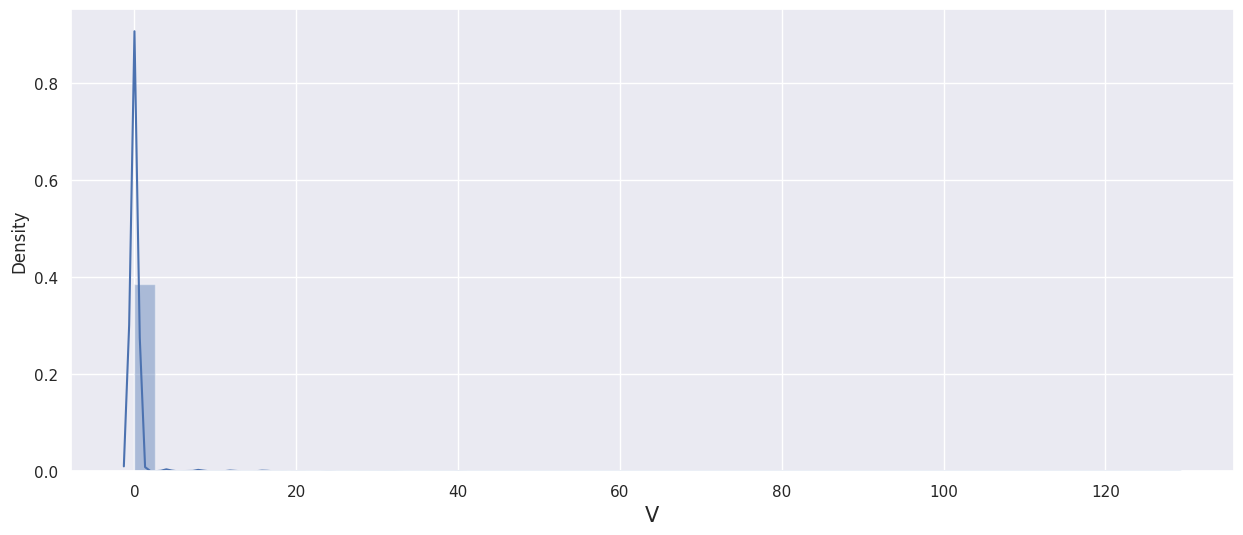

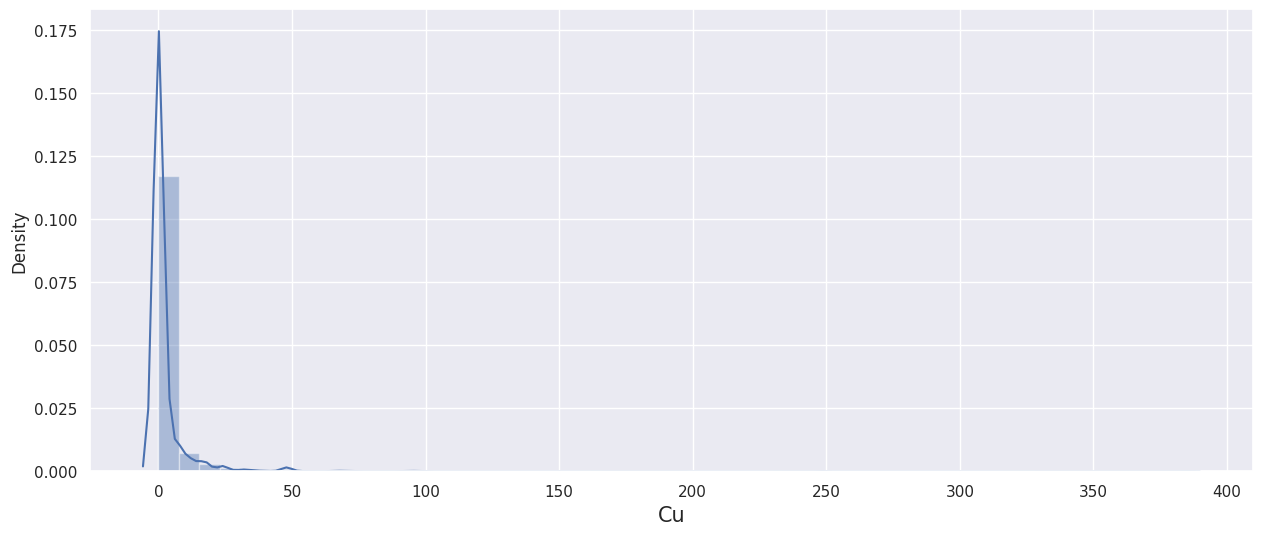

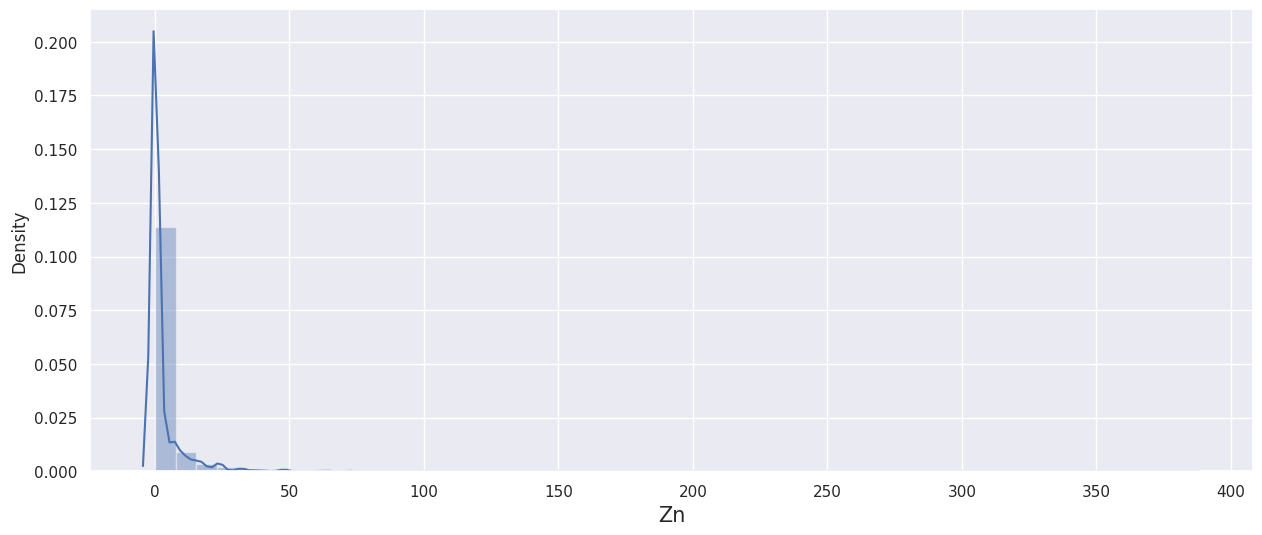

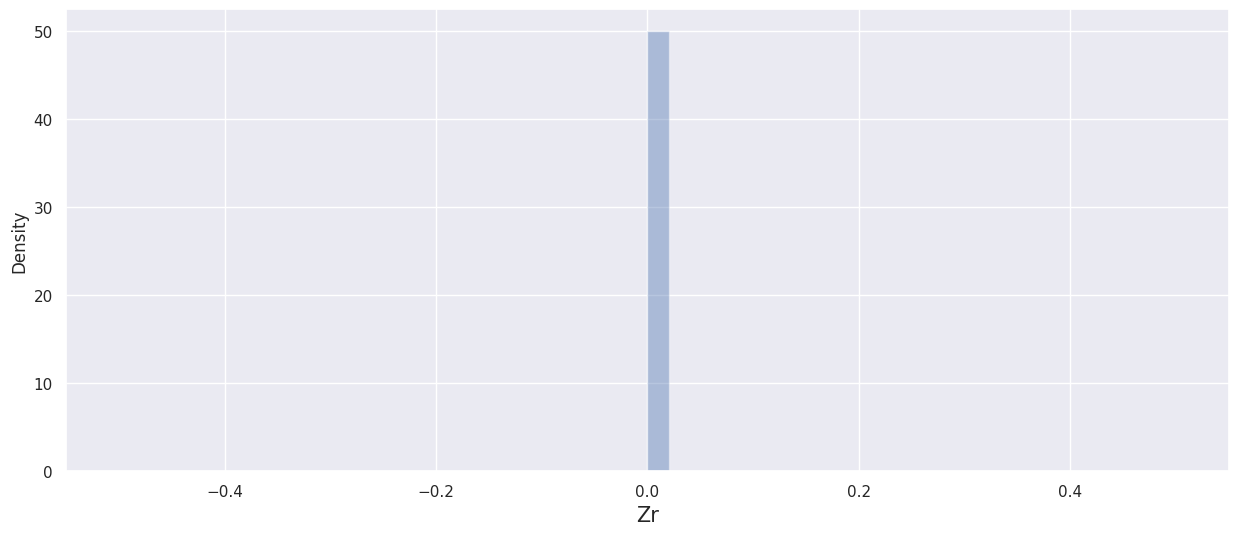

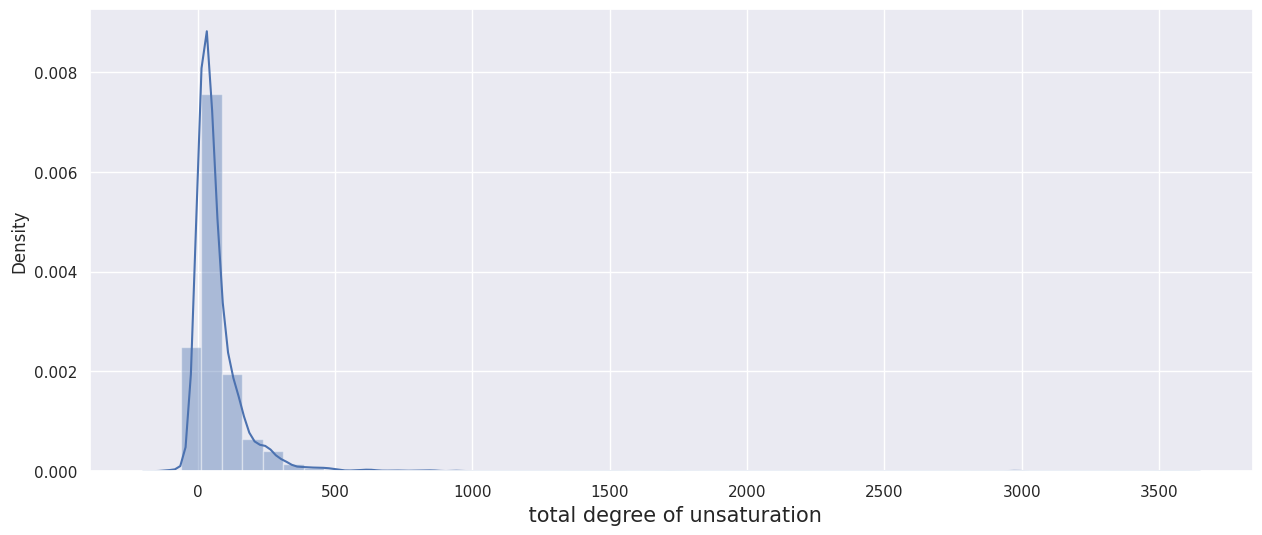

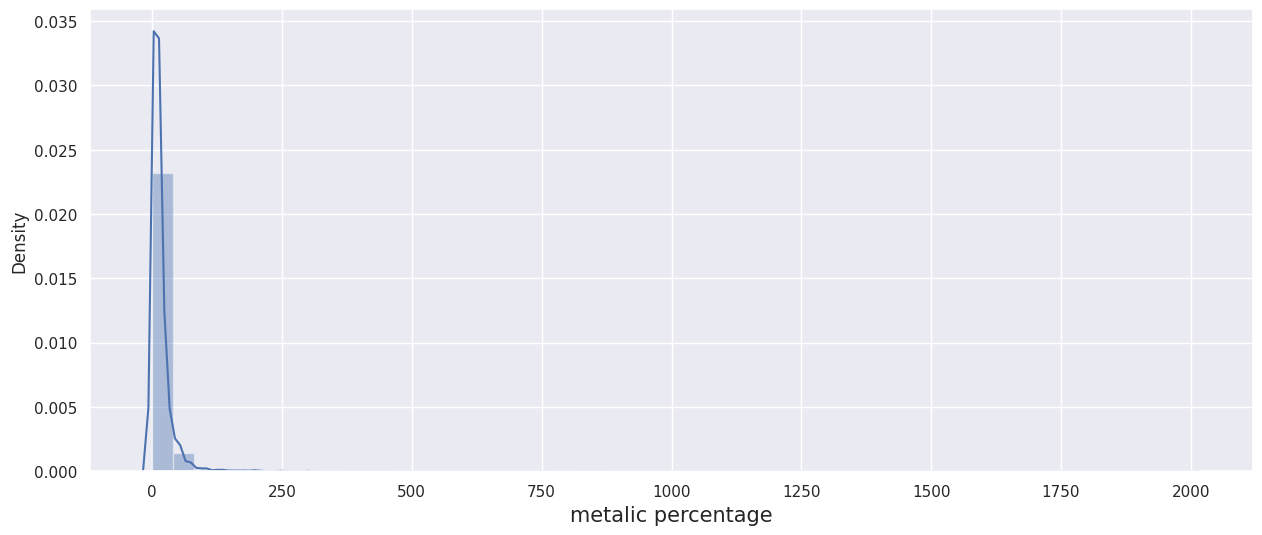

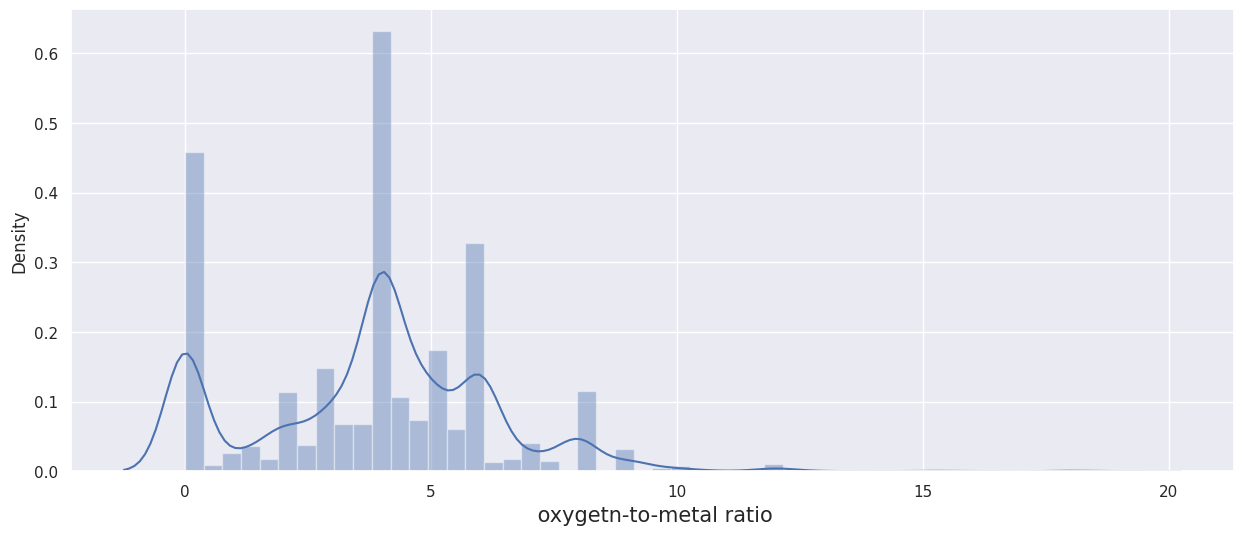

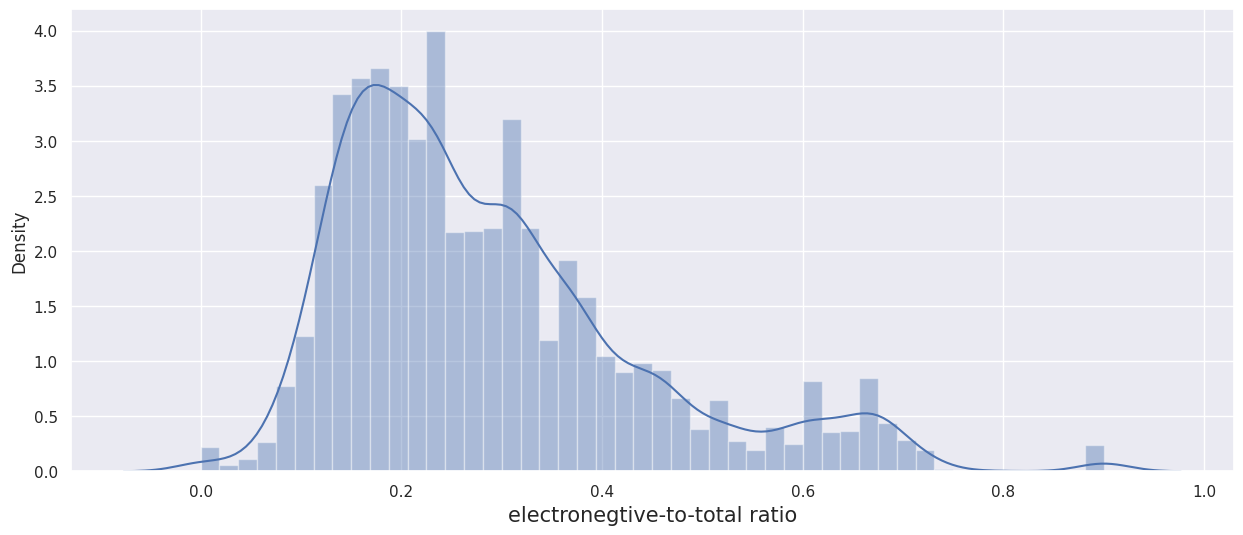

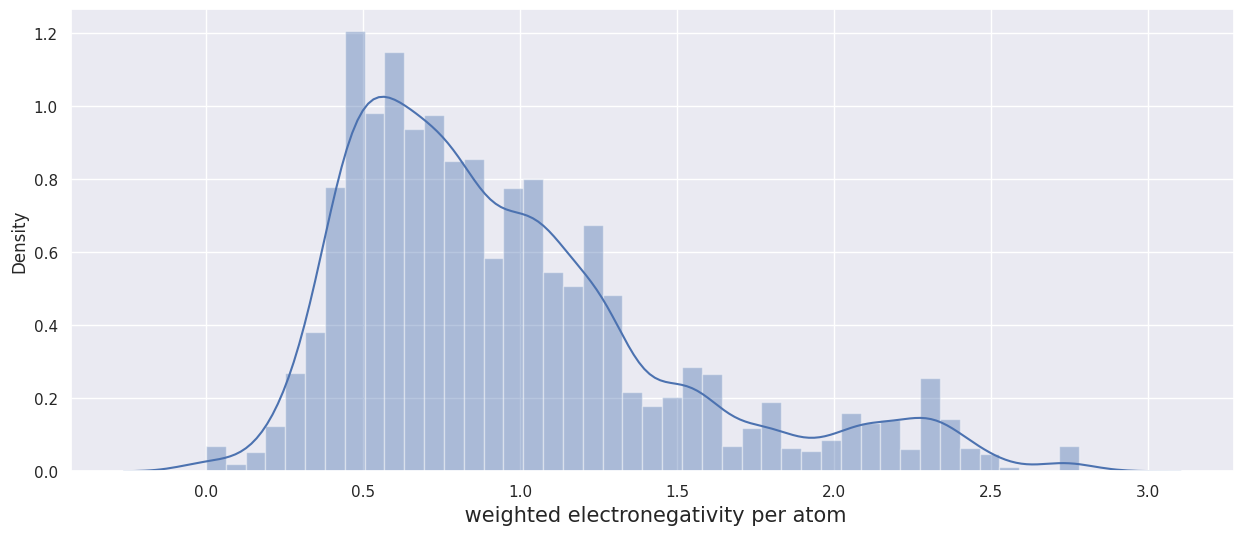

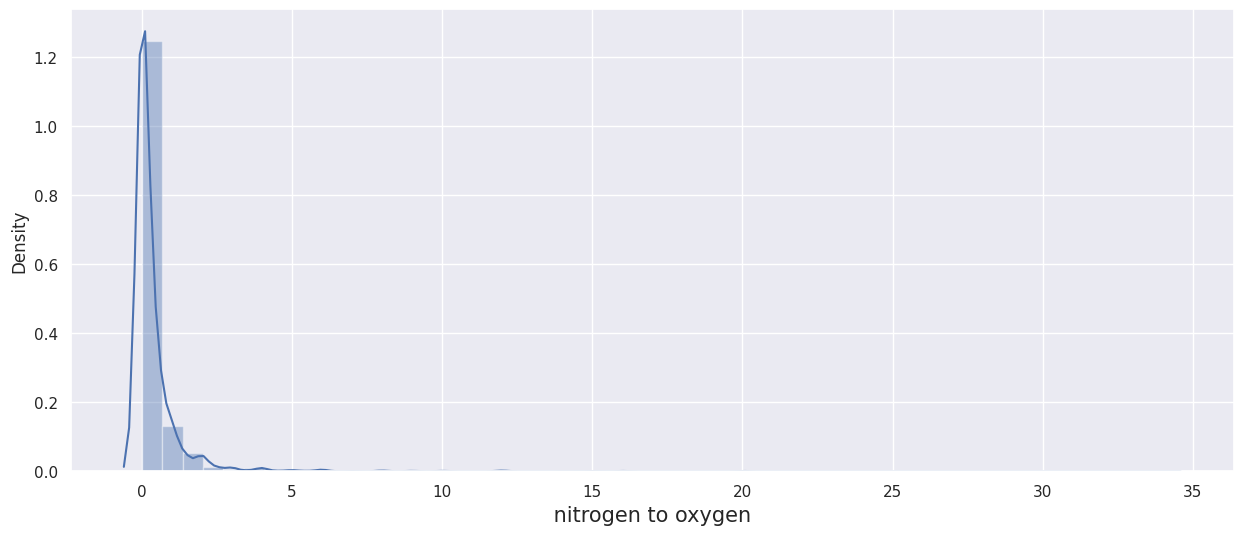

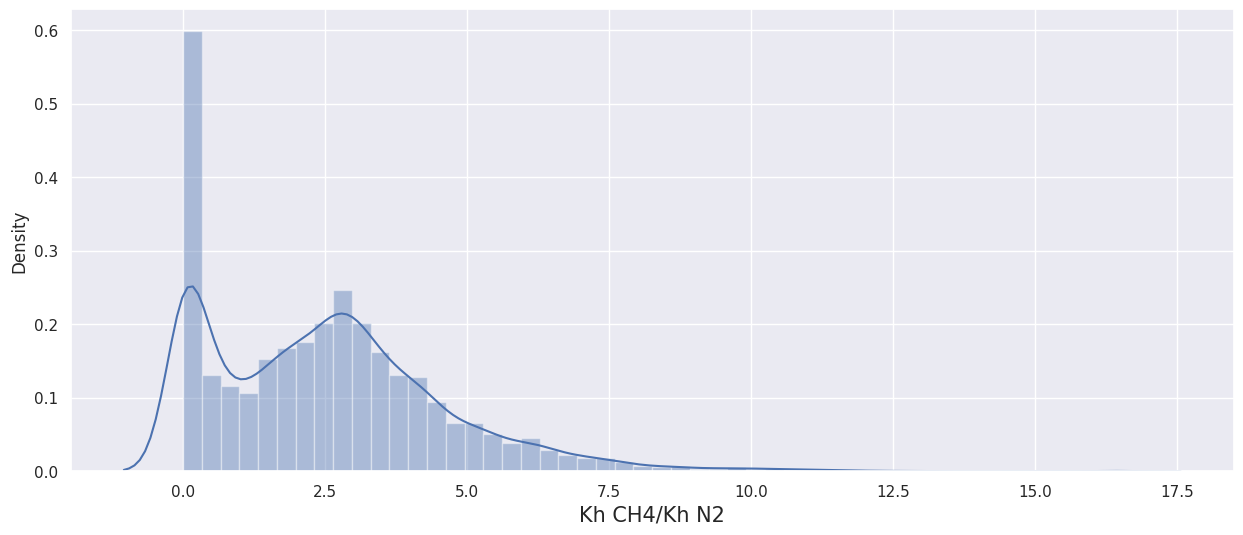

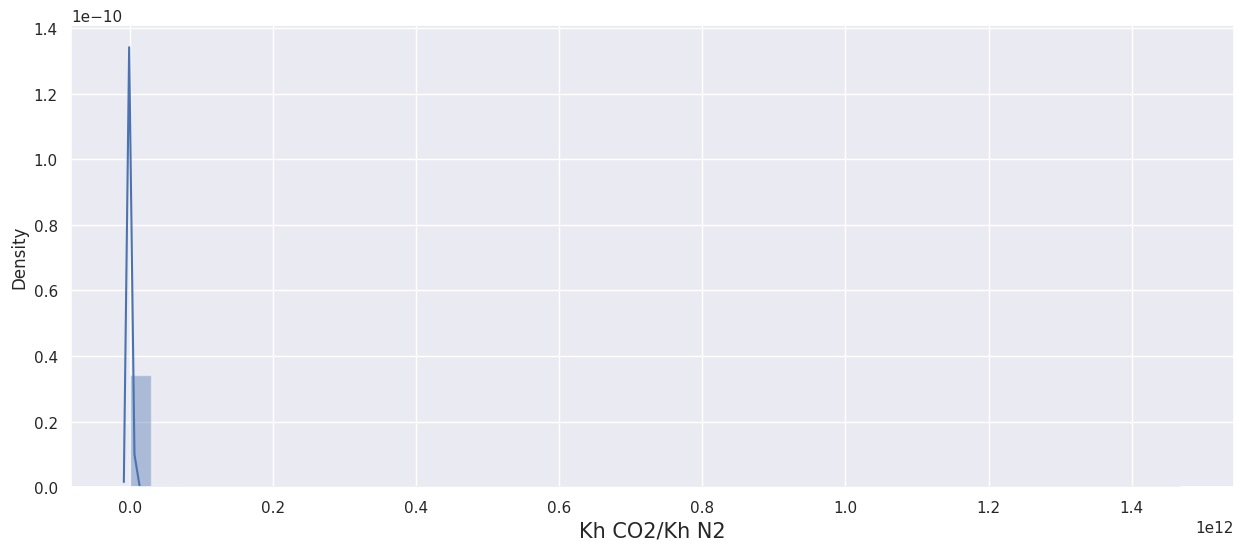

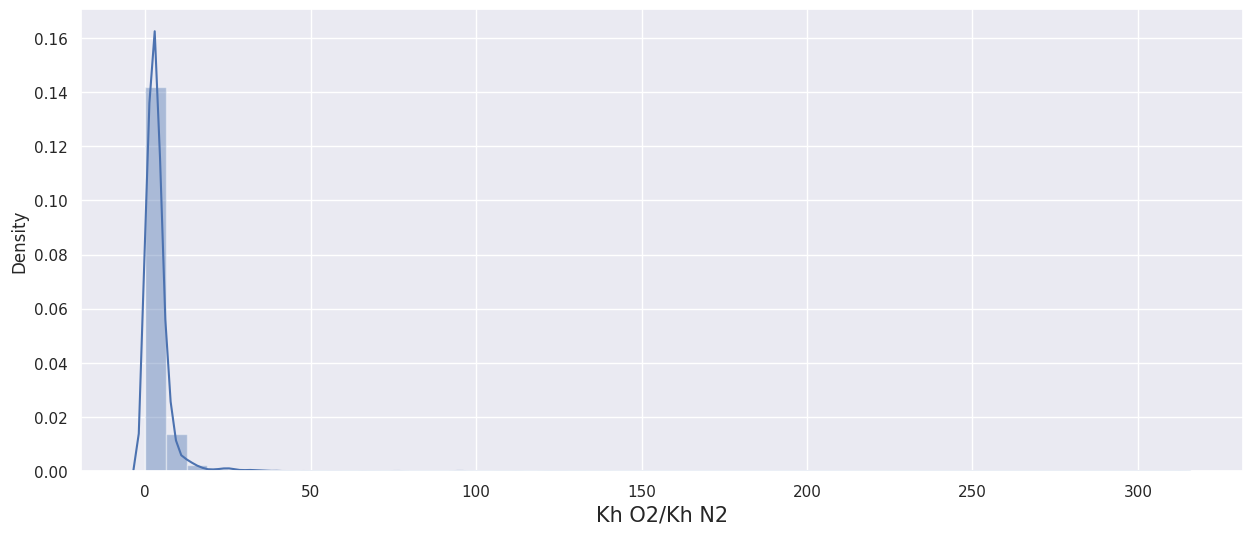

In [124]:
for column in dfe.columns:
  plt.figure(figsize=(15,6))
  sns.distplot(dfe[column])
  plt.xlabel(column, fontsize= 15)
  plt.plot()

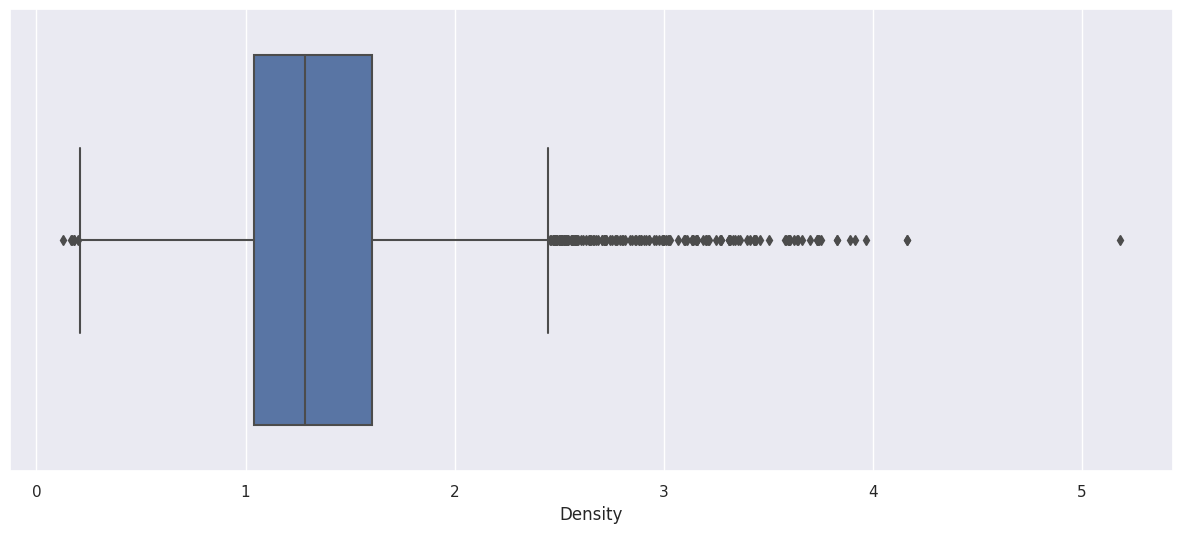

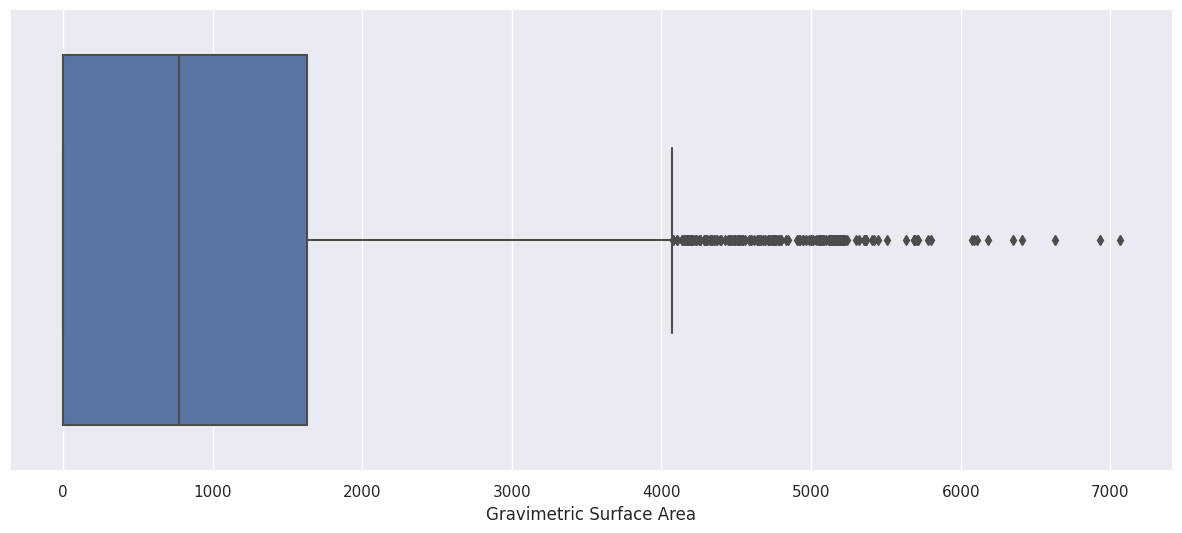

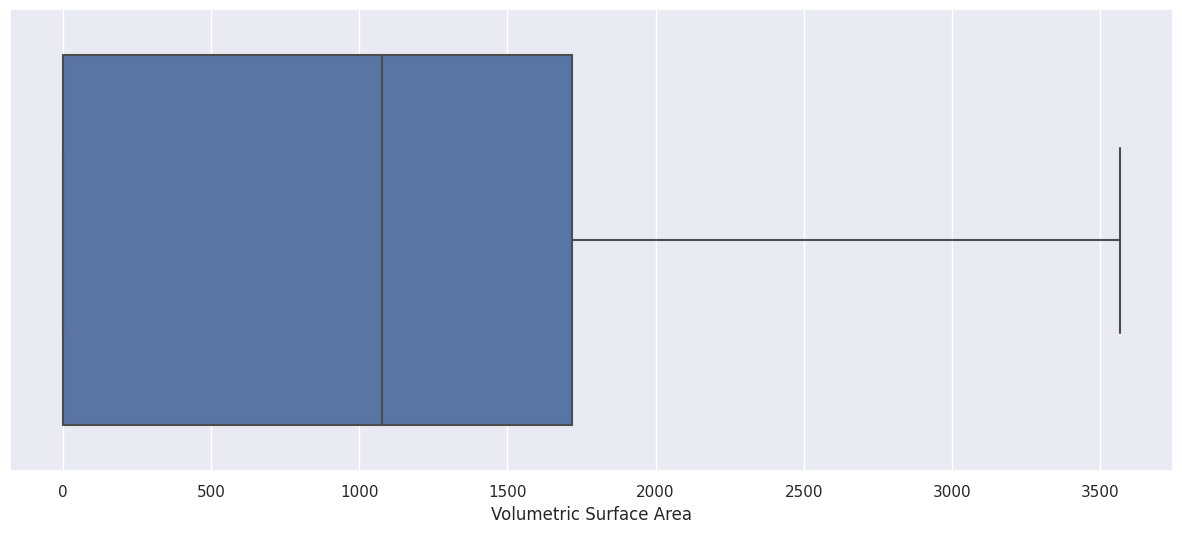

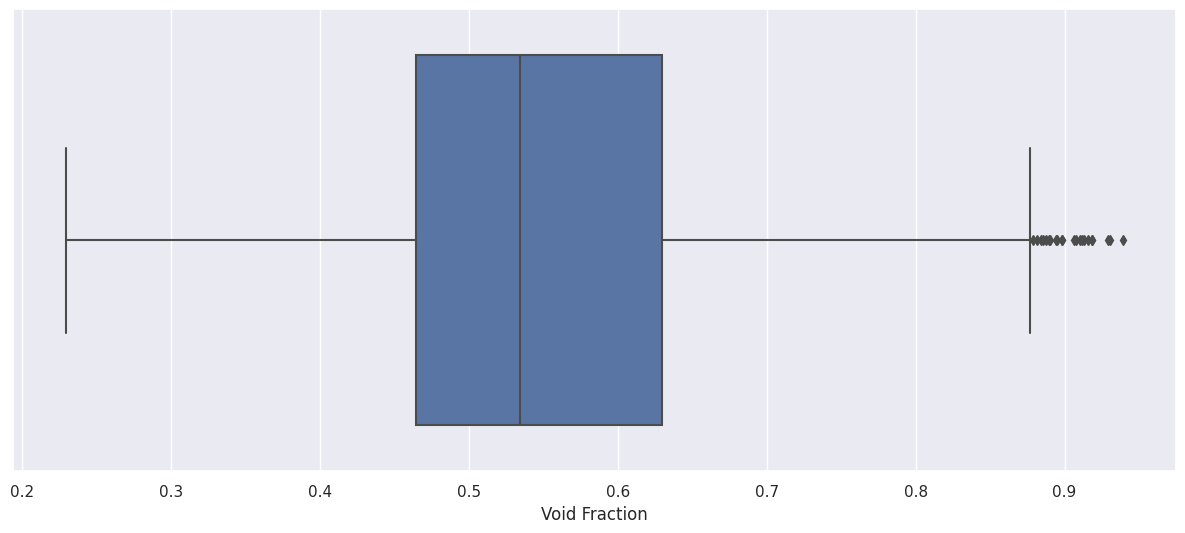

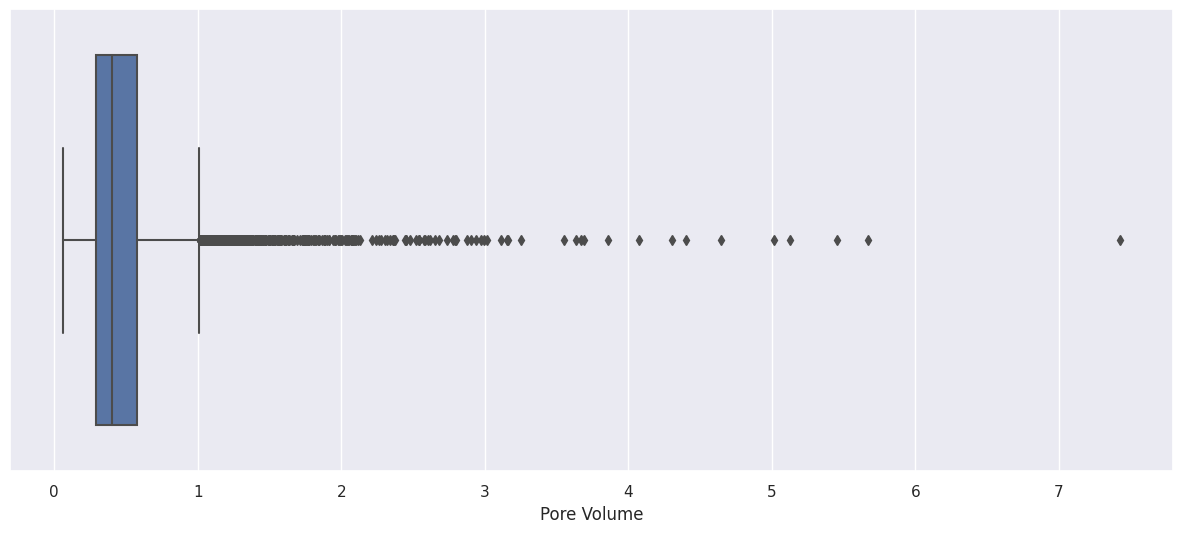

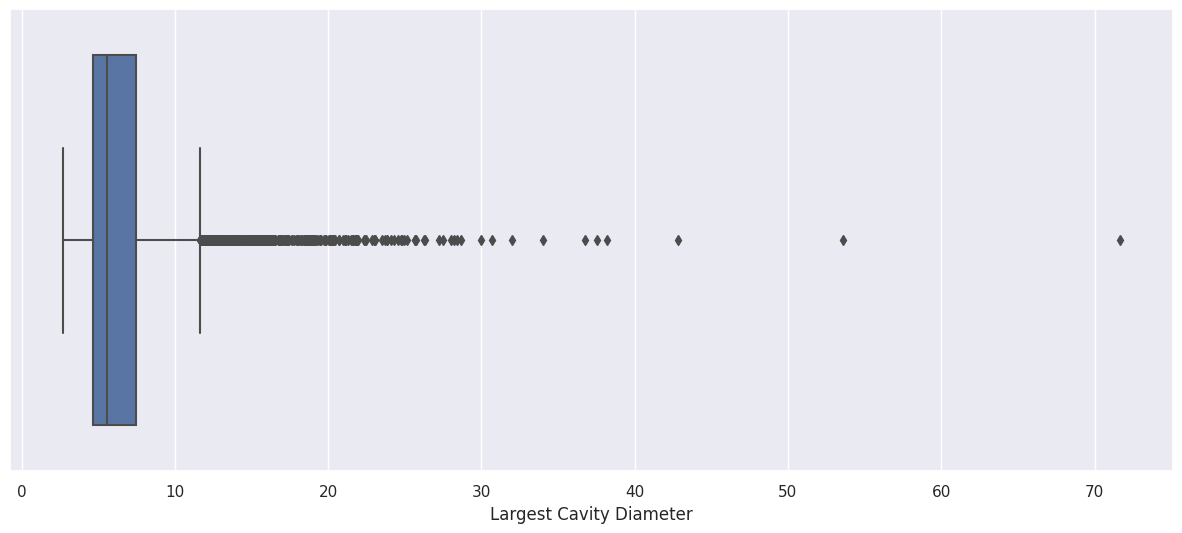

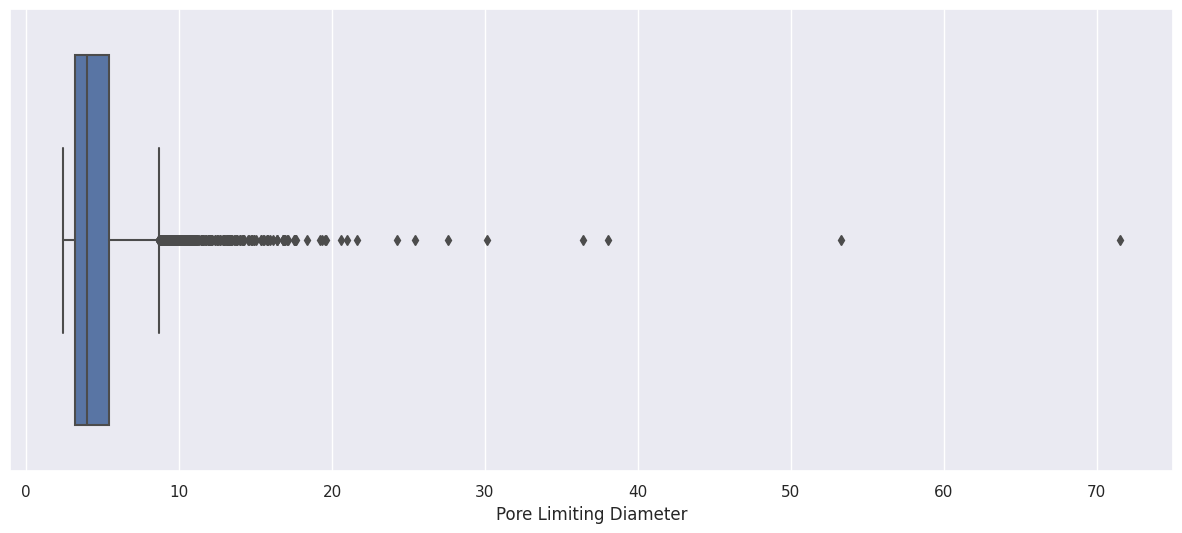

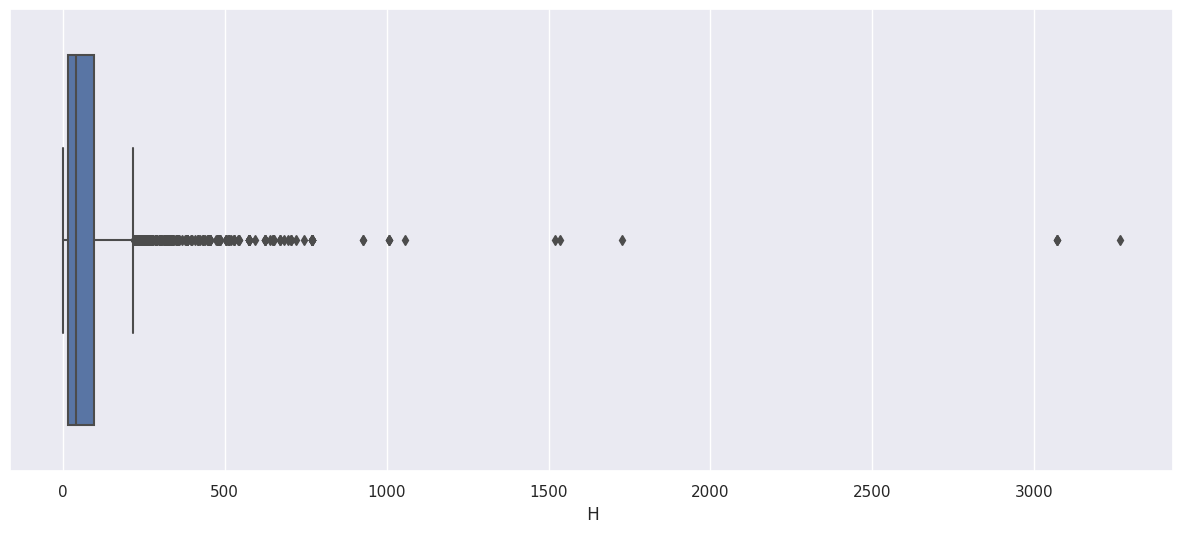

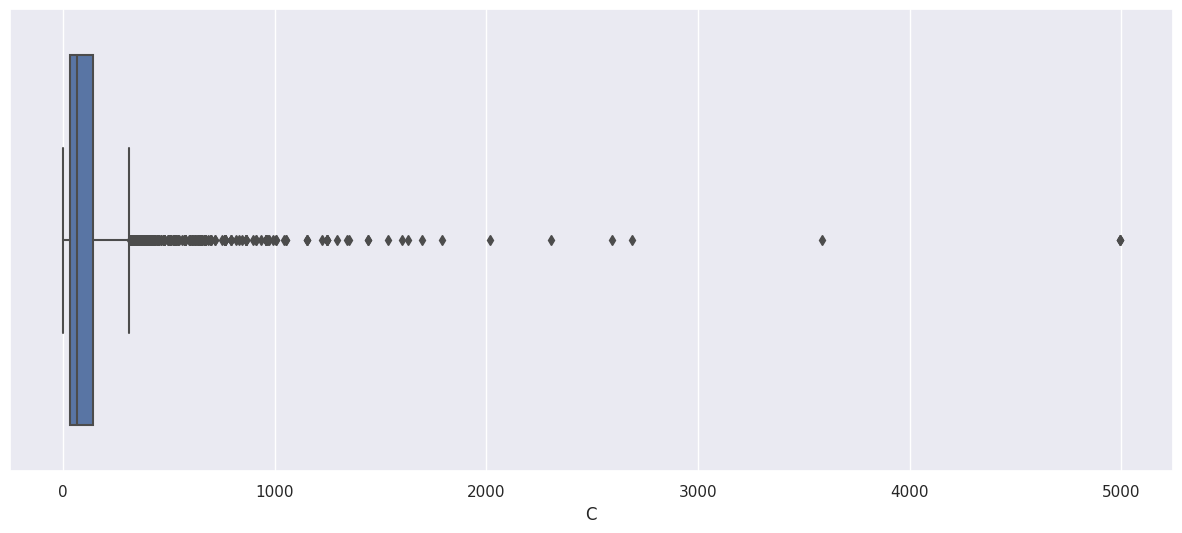

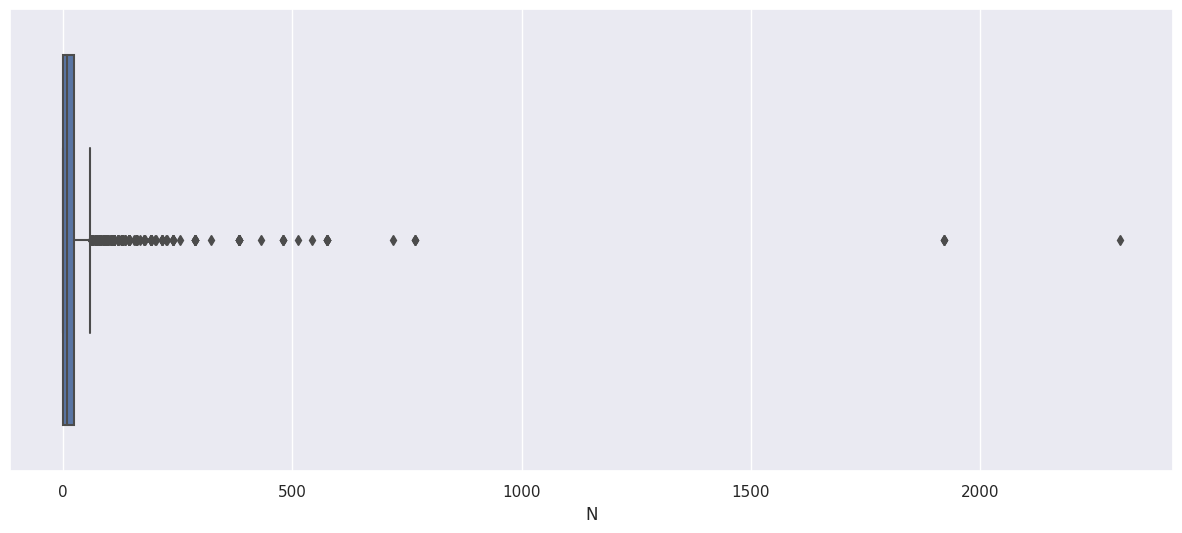

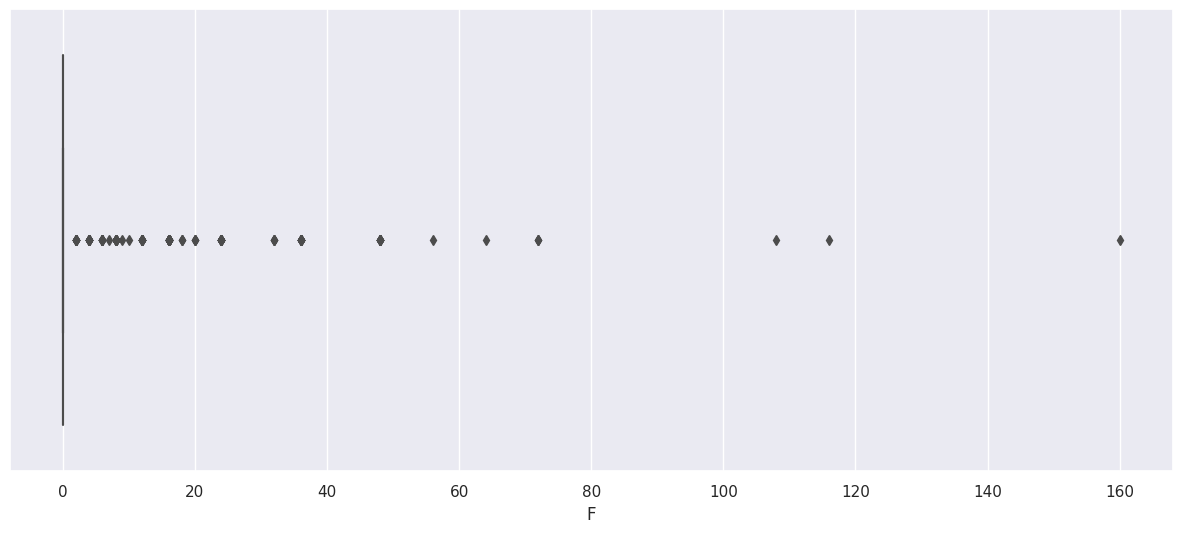

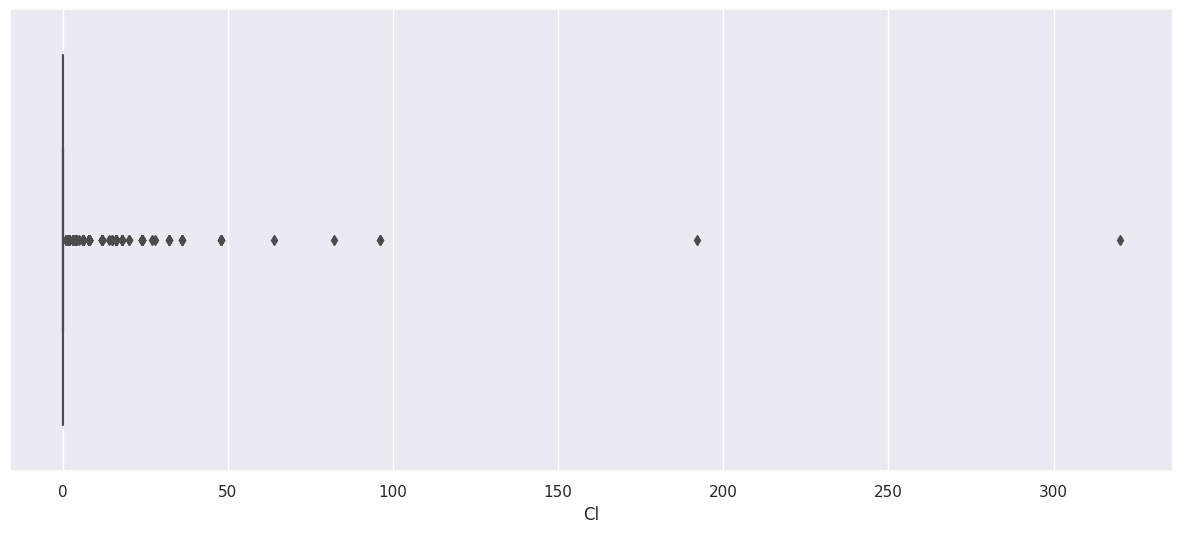

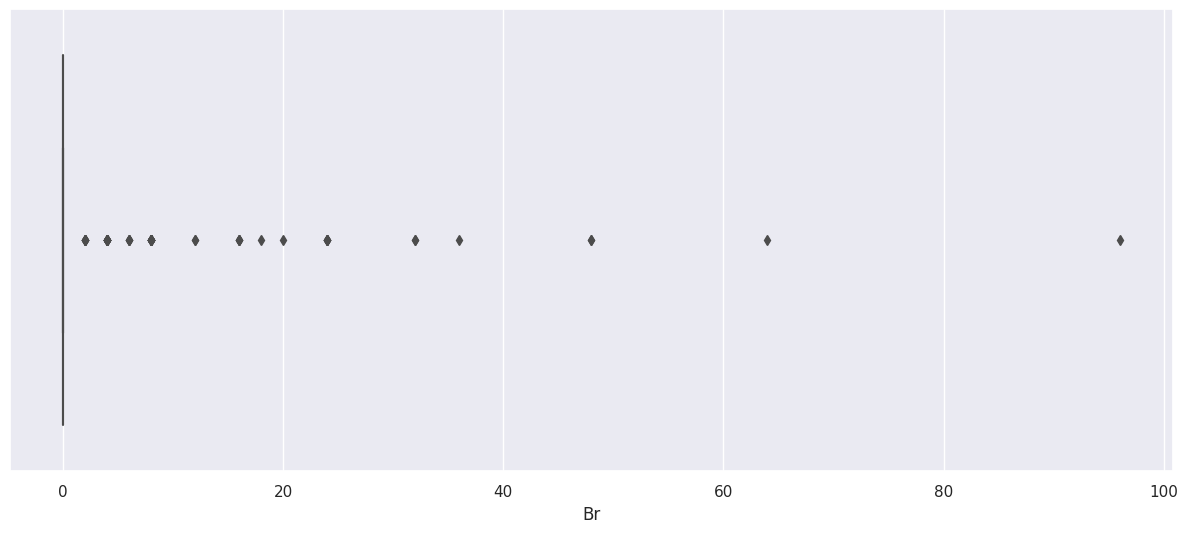

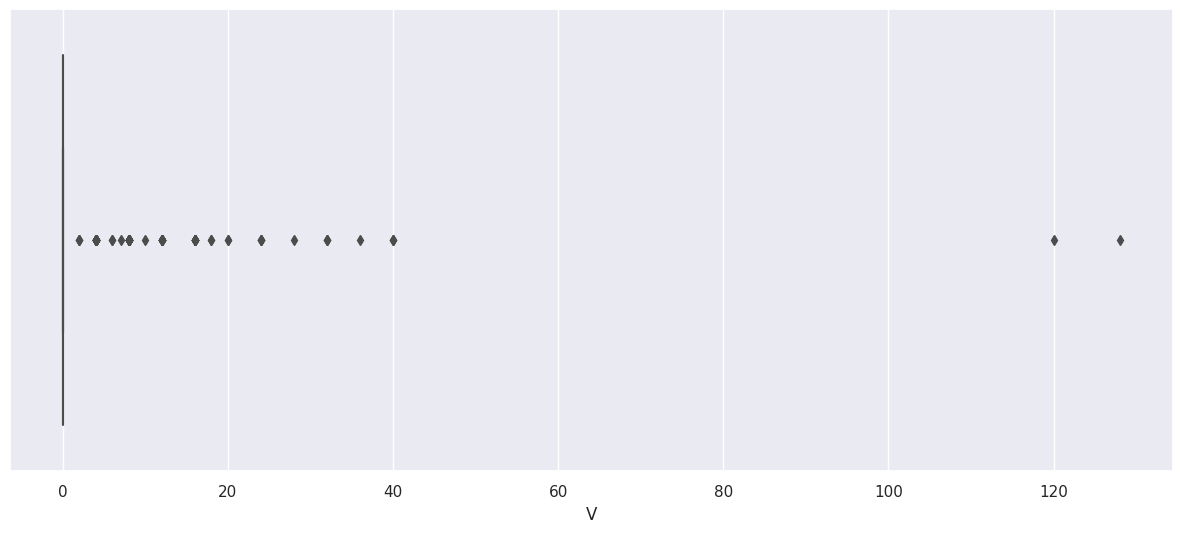

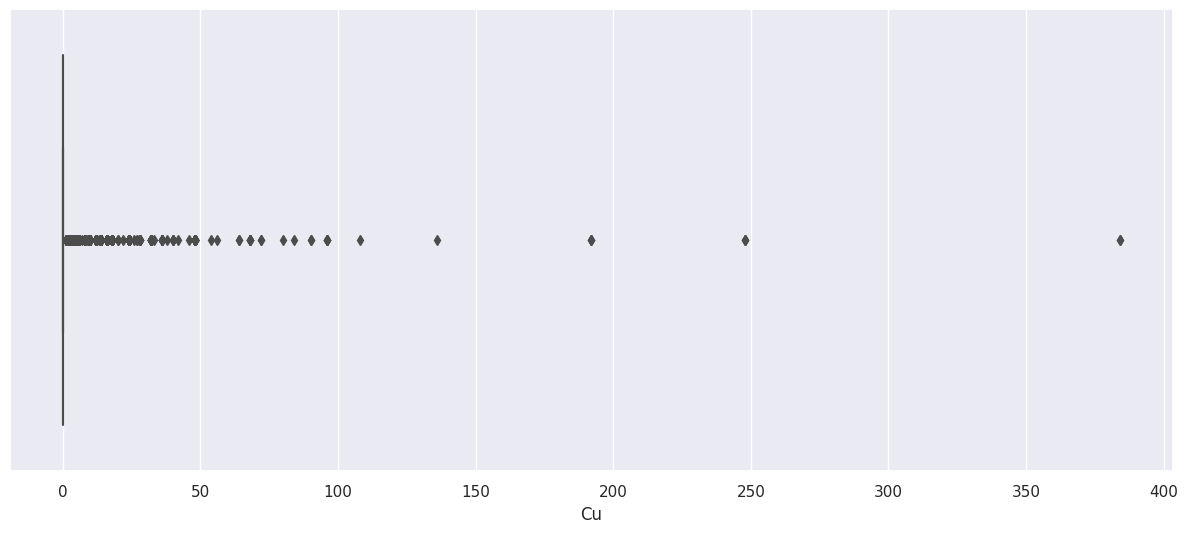

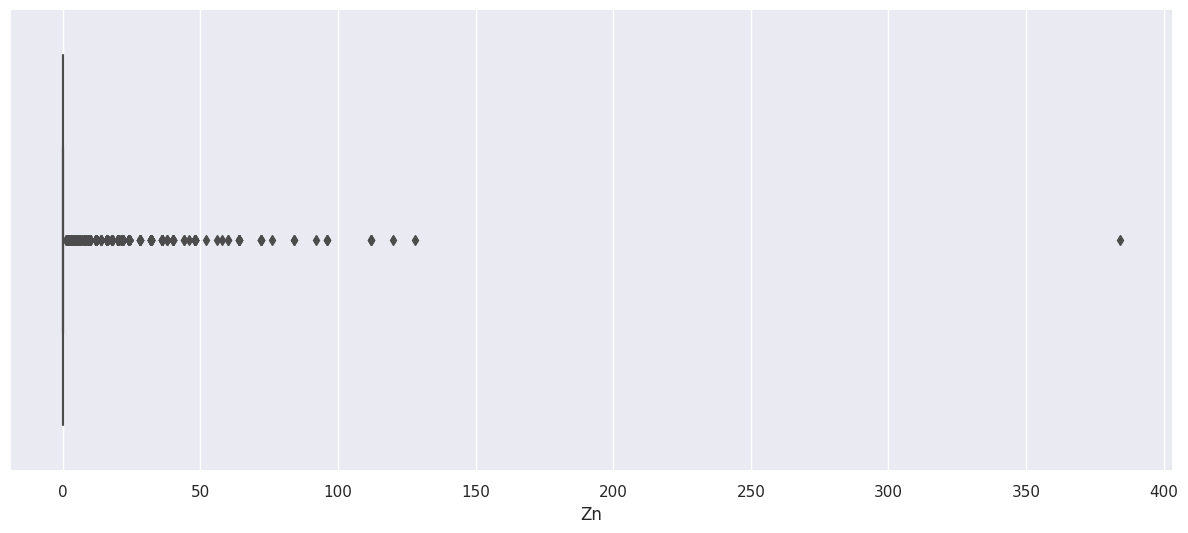

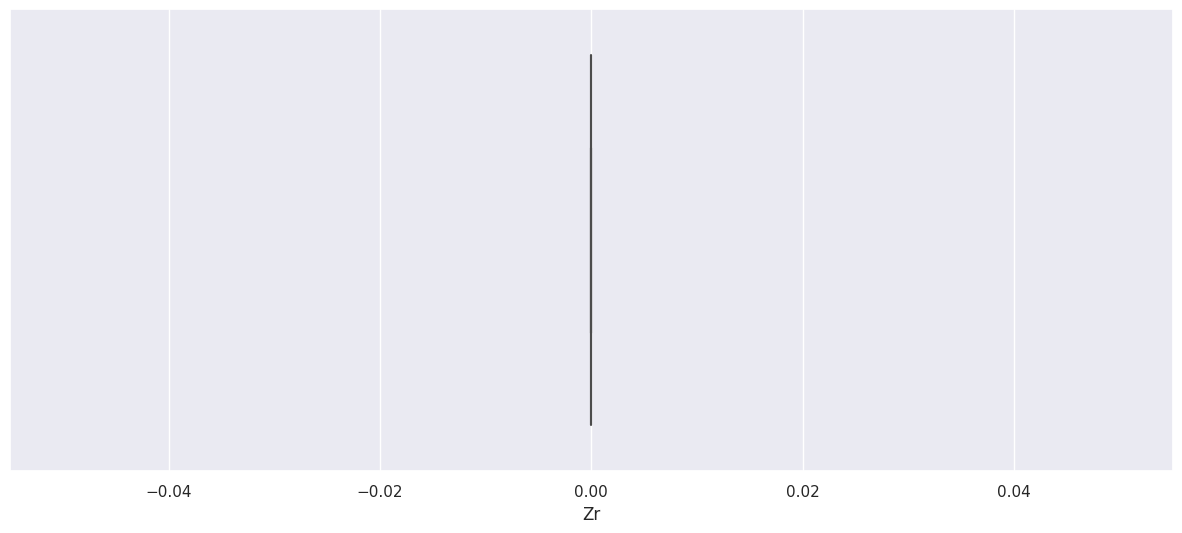

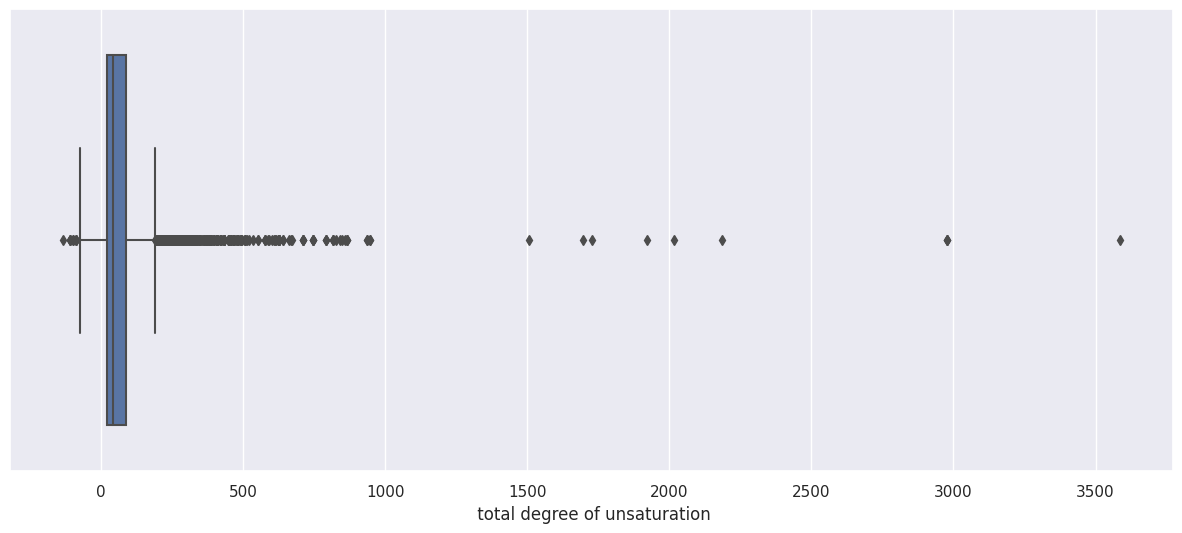

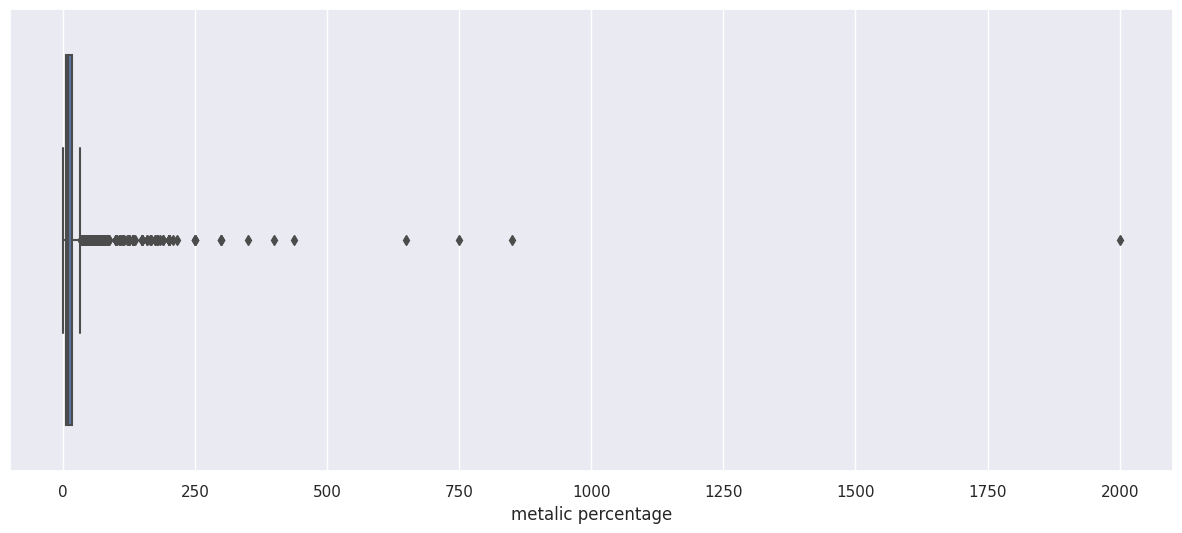

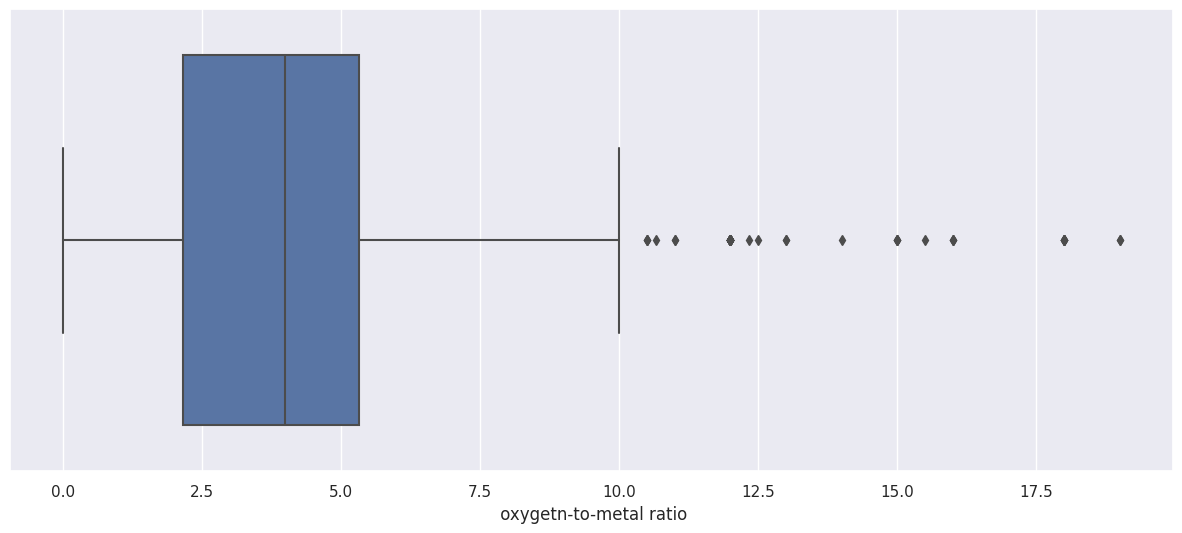

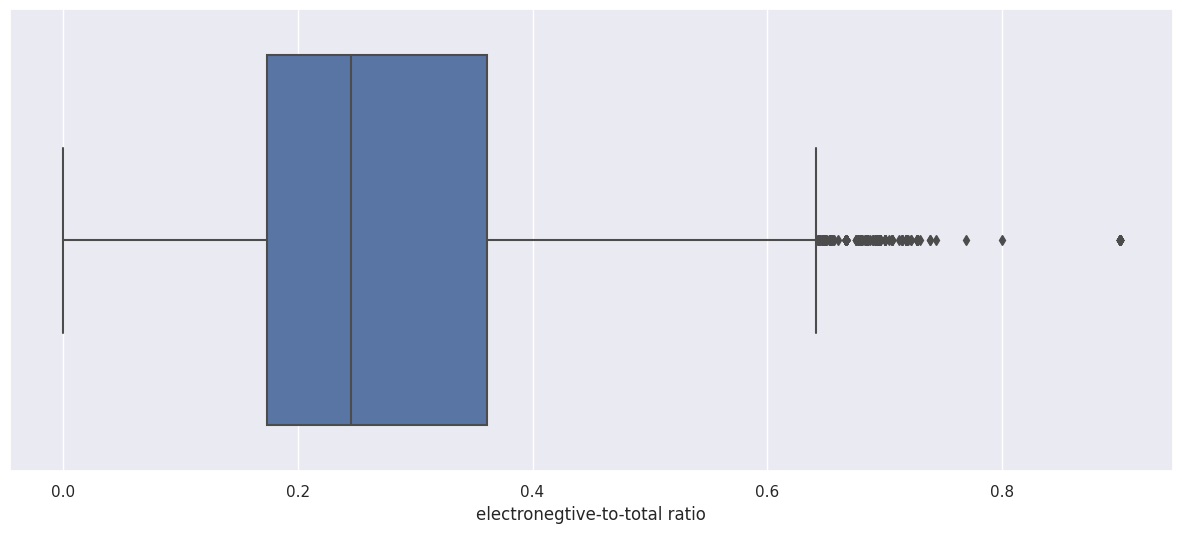

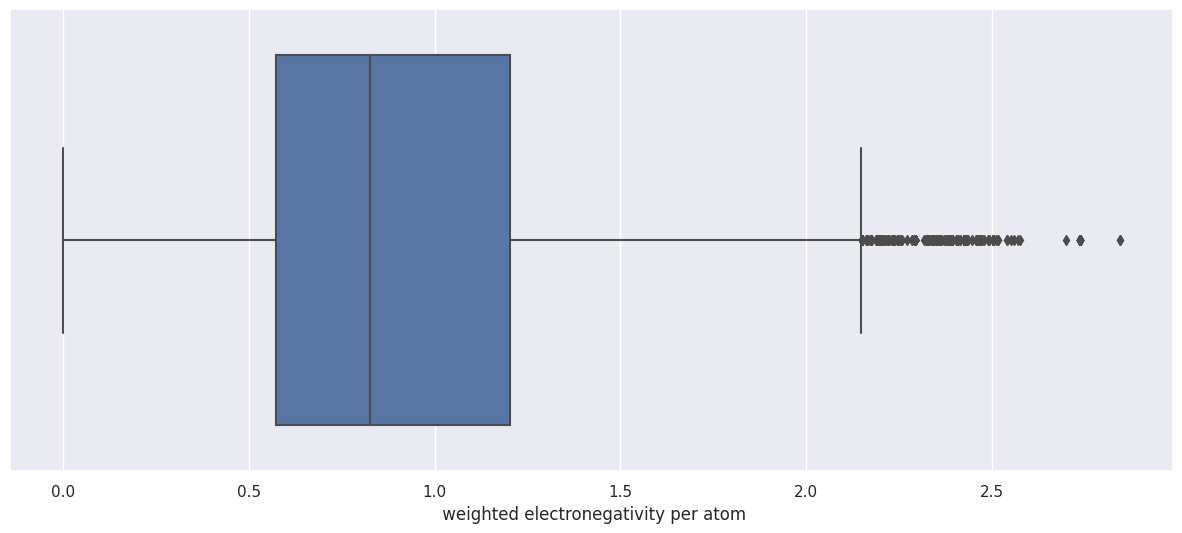

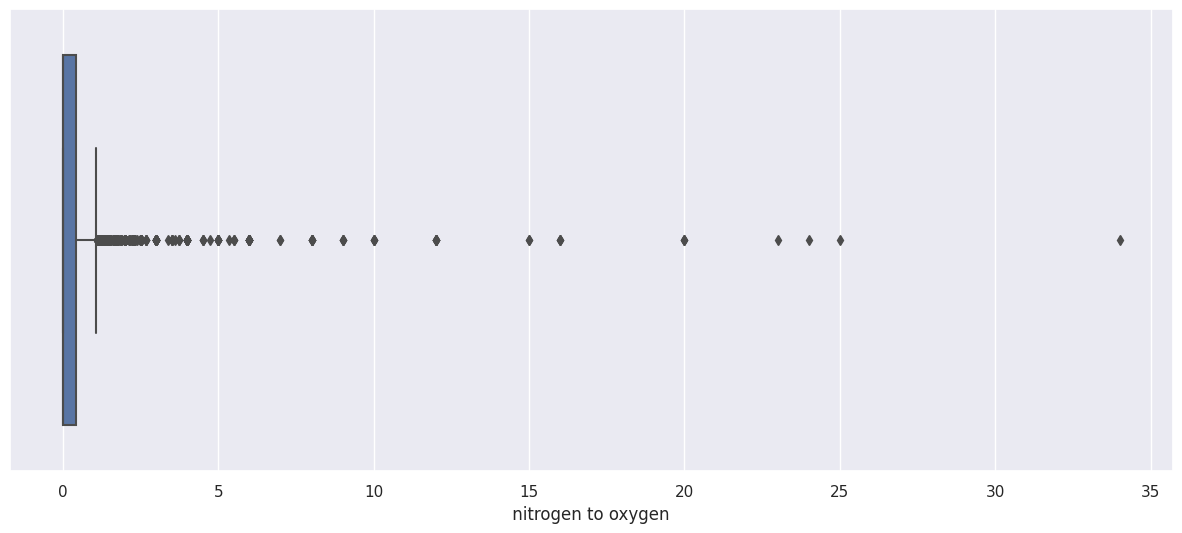

In [125]:
for column in dfe.columns:
  if column == "Kh CH4/Kh N2":
    break;
  plt.figure(figsize=(15,6))
  sns.boxplot(x=dfe[column])
  plt.xlabel(column)
  plt.show()

<Axes: >

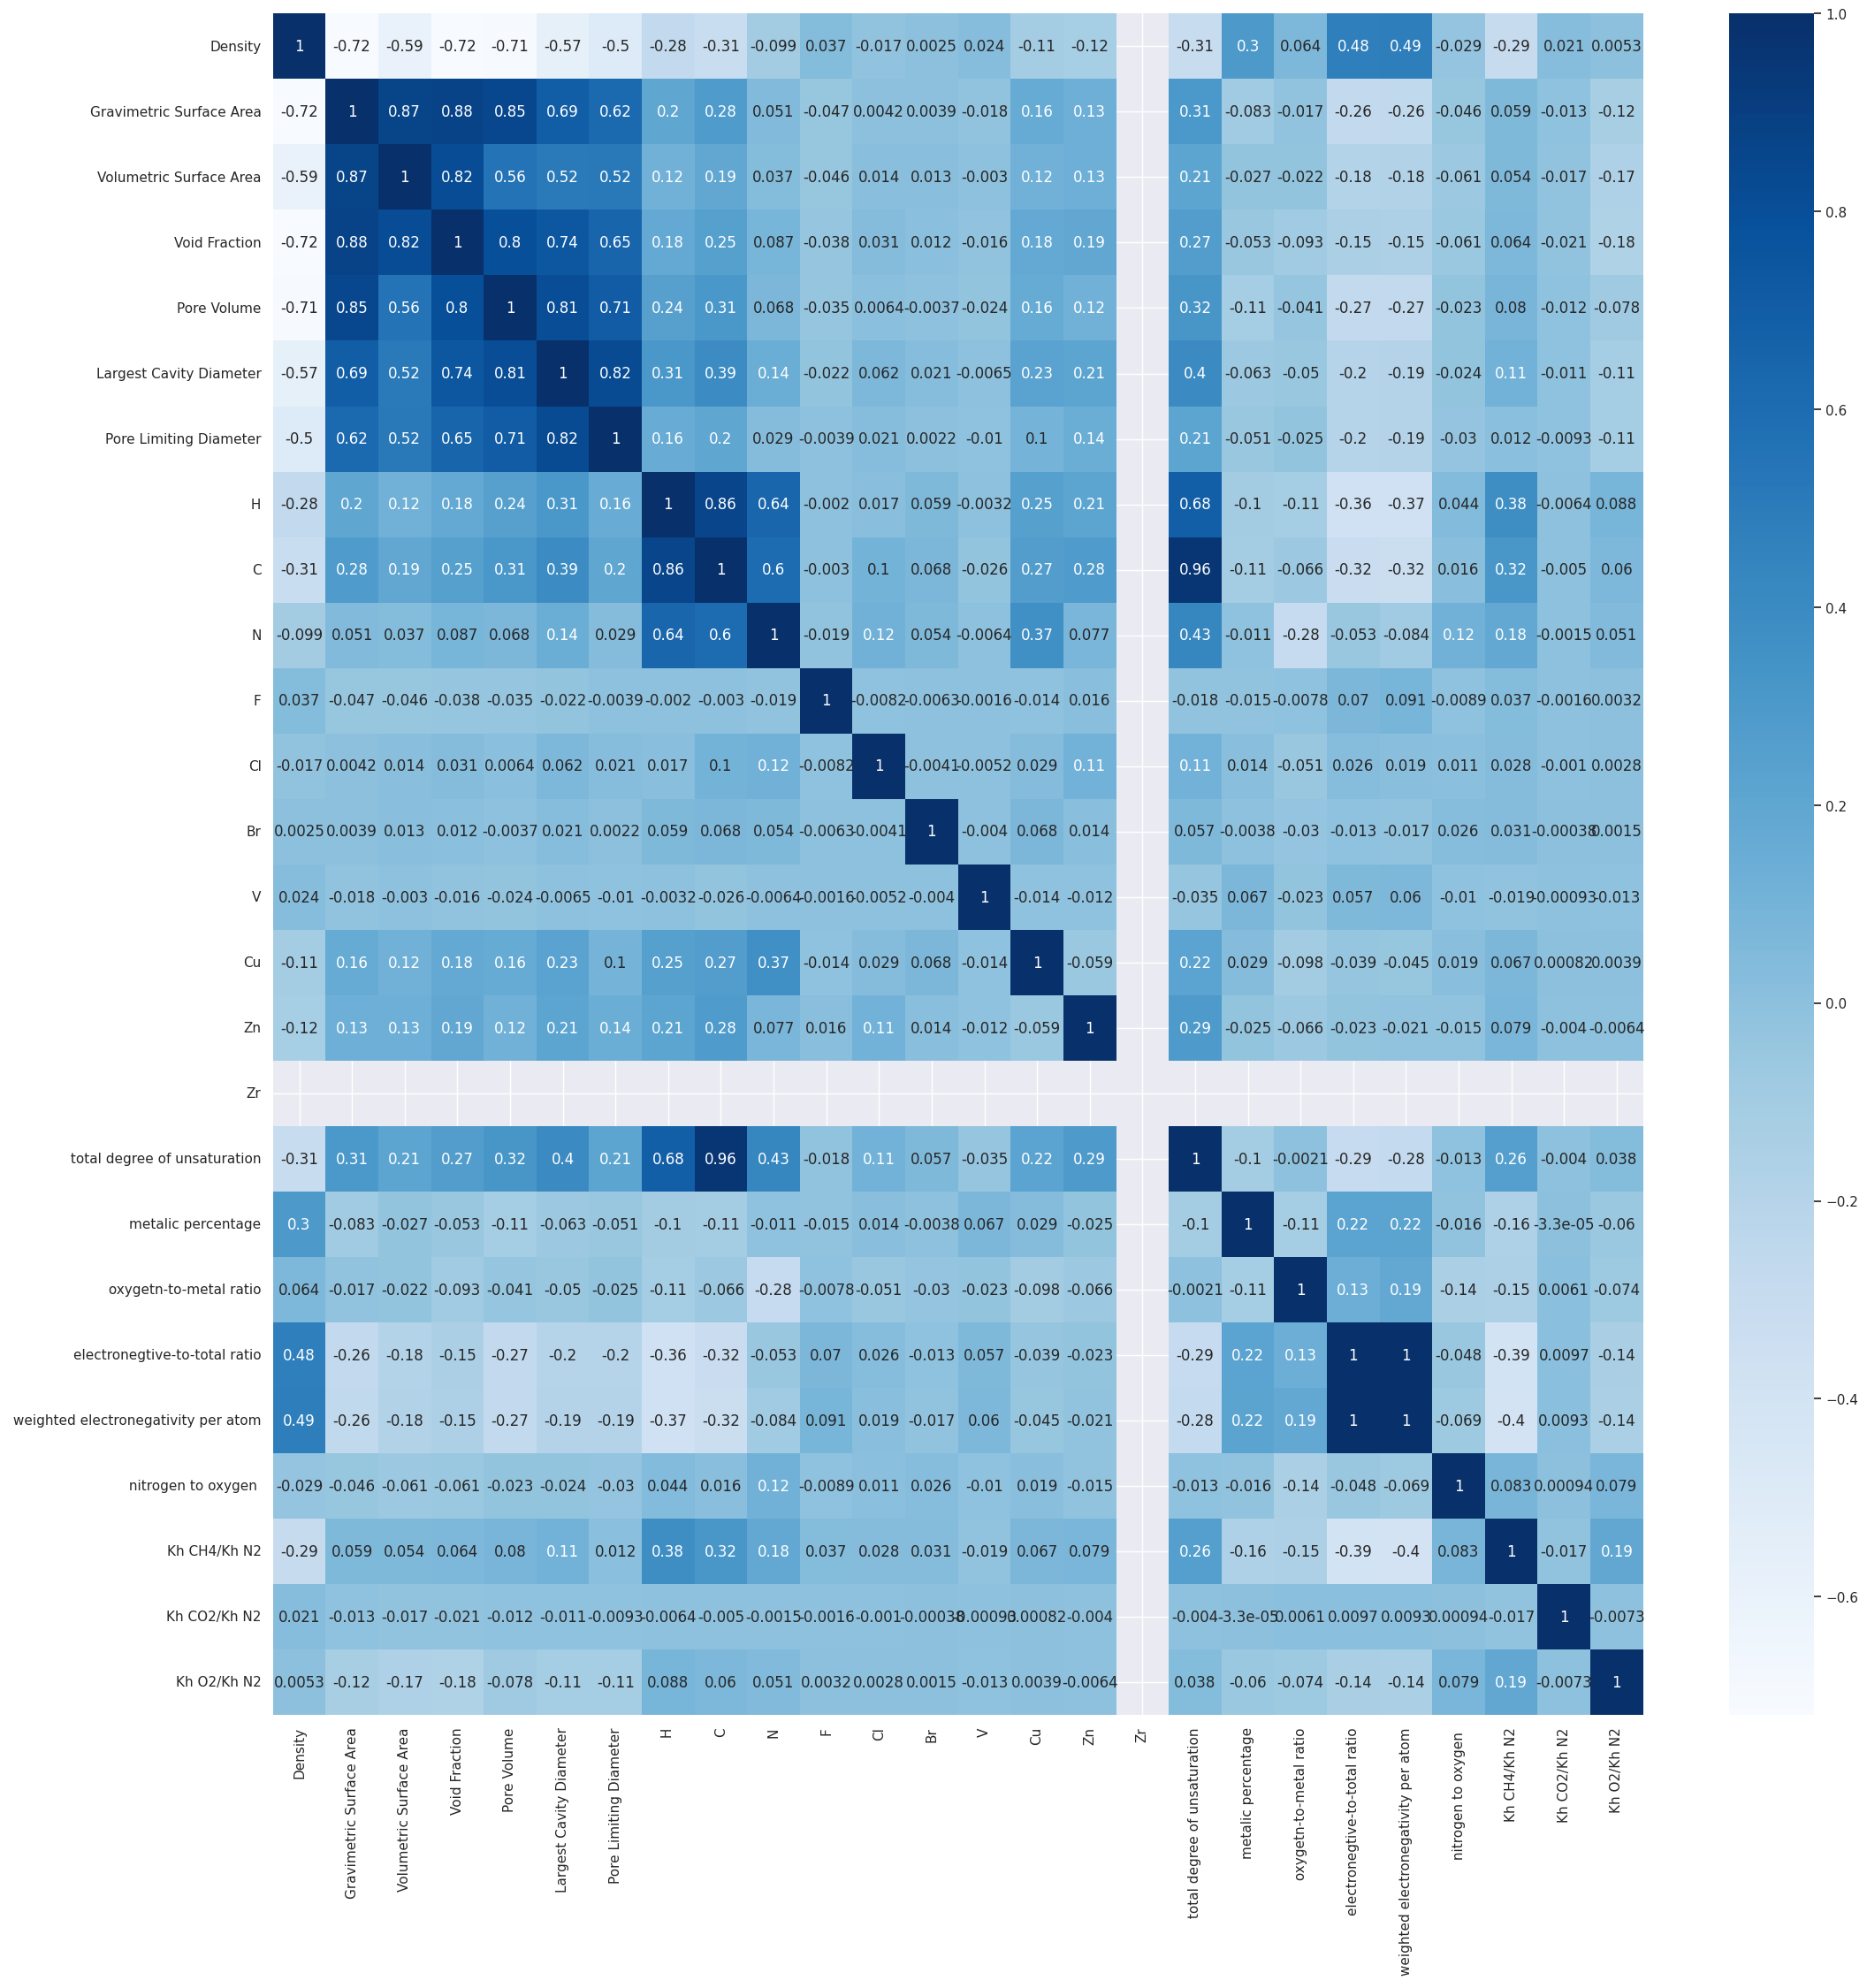

In [126]:
plt.figure(figsize=(25,25))
sns.heatmap(dfe.corr(), cmap="Blues", annot=True)

## Data Handling

### Removing potential outliers

In [127]:
dx = dfe.drop(target_col, axis=1)

In [128]:
dx.shape

(7664, 23)

In [129]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Density                               7664 non-null   float64
 1   Gravimetric Surface Area              7664 non-null   float64
 2   Volumetric Surface Area               7664 non-null   float64
 3   Void Fraction                         7664 non-null   float64
 4   Pore Volume                           7664 non-null   float64
 5   Largest Cavity Diameter               7664 non-null   float64
 6   Pore Limiting Diameter                7664 non-null   float64
 7    H                                    7664 non-null   int64  
 8   C                                     7664 non-null   int64  
 9   N                                     7664 non-null   int64  
 10  F                                     7664 non-null   int64  
 11  Cl               

In [130]:
from scipy.stats import zscore

# Assuming 'data' is your DataFrame or Series
z_scores = zscore(dx)
outliers = (z_scores > 3) | (z_scores < -3)

# Remove outliers from the DataFrame
do = dx[~outliers]

In [131]:
do.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Density                               7575 non-null   float64
 1   Gravimetric Surface Area              7525 non-null   float64
 2   Volumetric Surface Area               7664 non-null   float64
 3   Void Fraction                         7647 non-null   float64
 4   Pore Volume                           7539 non-null   float64
 5   Largest Cavity Diameter               7529 non-null   float64
 6   Pore Limiting Diameter                7566 non-null   float64
 7    H                                    7553 non-null   float64
 8   C                                     7568 non-null   float64
 9   N                                     7609 non-null   float64
 10  F                                     7554 non-null   float64
 11  Cl               

In [132]:
for column in do.columns:
  do.fillna(do[column].mean(), inplace = True)

In [133]:
do.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Density                               7664 non-null   float64
 1   Gravimetric Surface Area              7664 non-null   float64
 2   Volumetric Surface Area               7664 non-null   float64
 3   Void Fraction                         7664 non-null   float64
 4   Pore Volume                           7664 non-null   float64
 5   Largest Cavity Diameter               7664 non-null   float64
 6   Pore Limiting Diameter                7664 non-null   float64
 7    H                                    7664 non-null   float64
 8   C                                     7664 non-null   float64
 9   N                                     7664 non-null   float64
 10  F                                     7664 non-null   float64
 11  Cl               

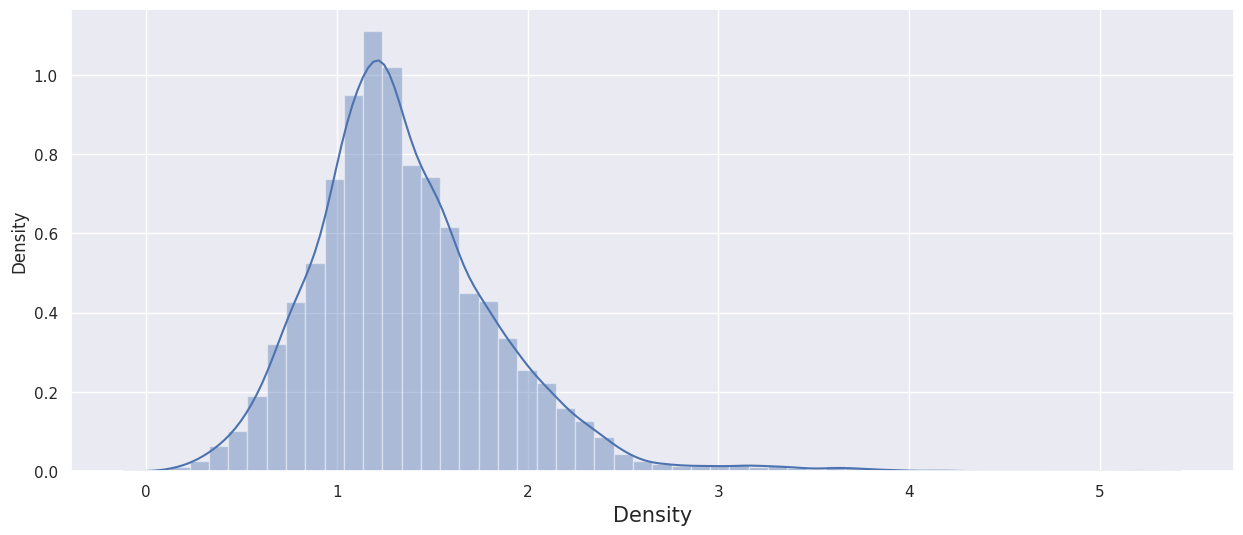

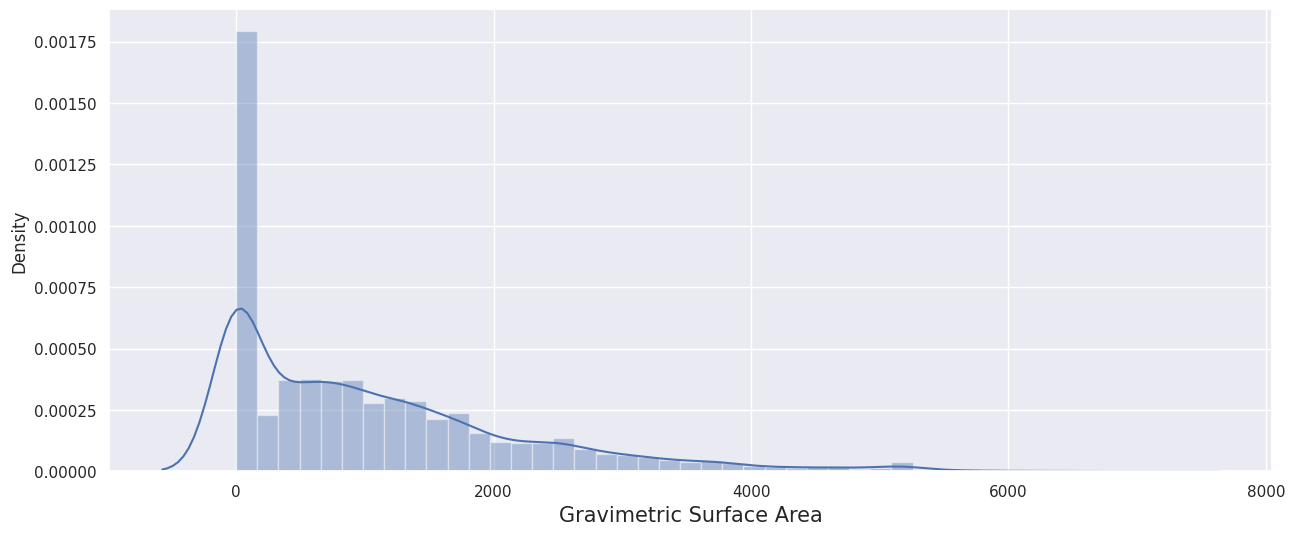

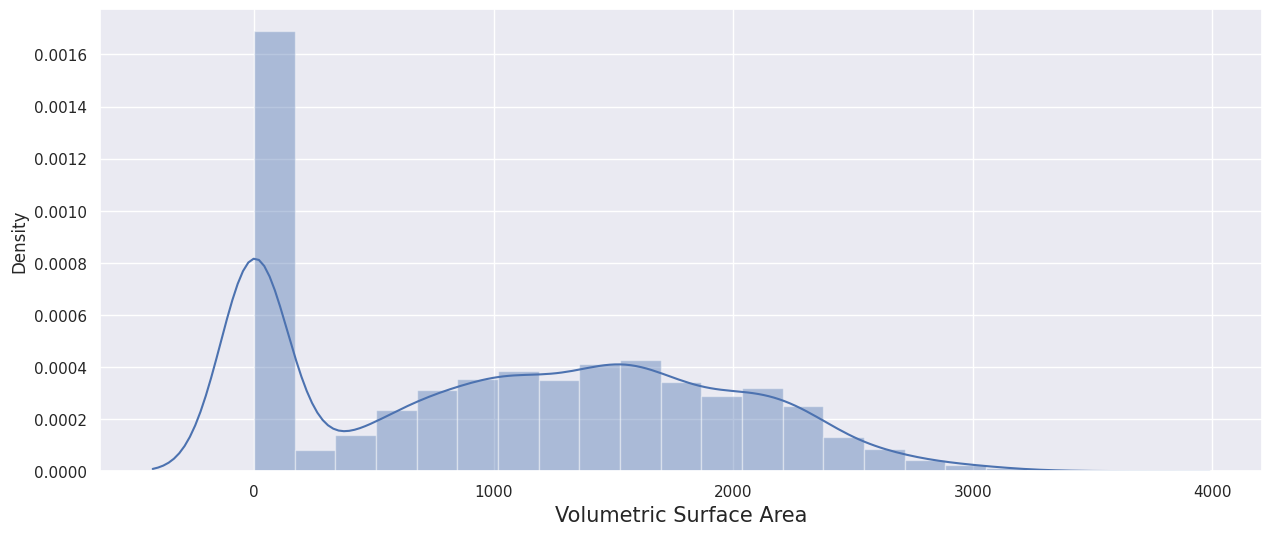

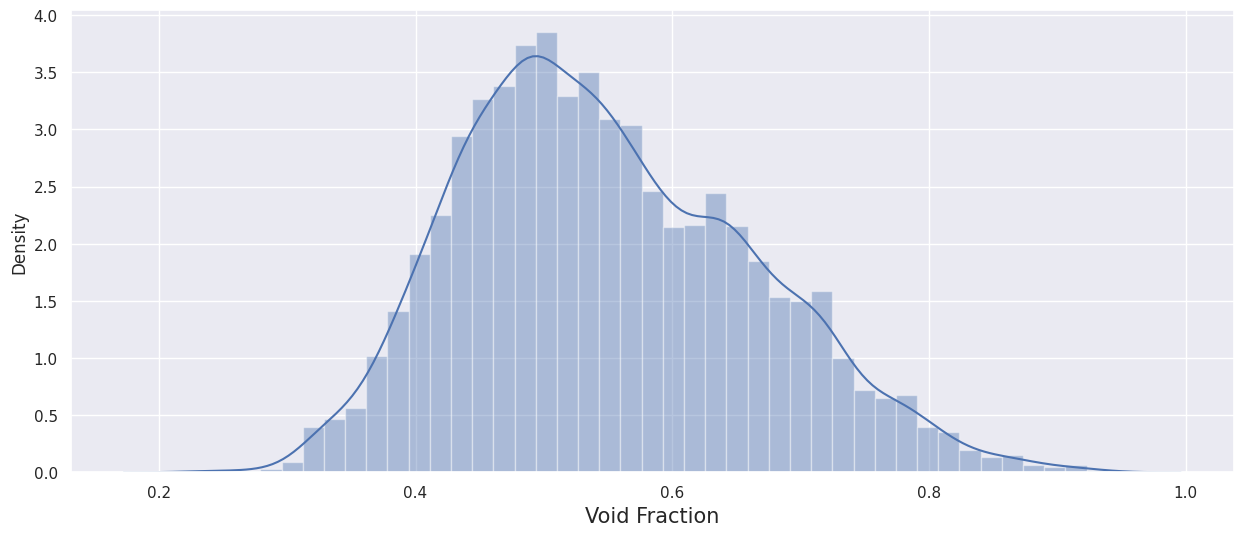

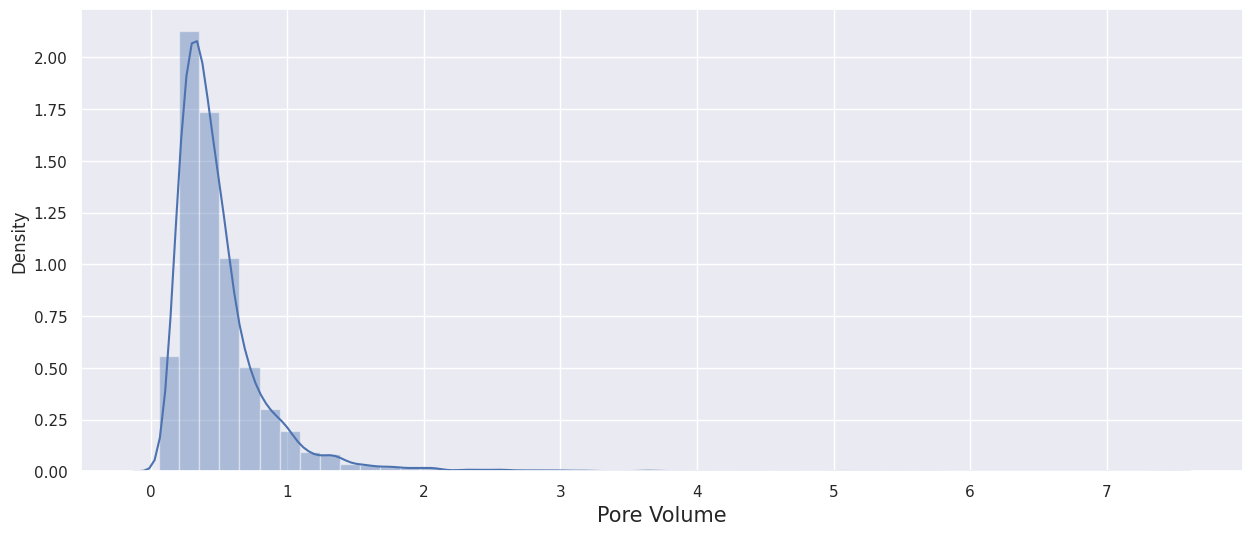

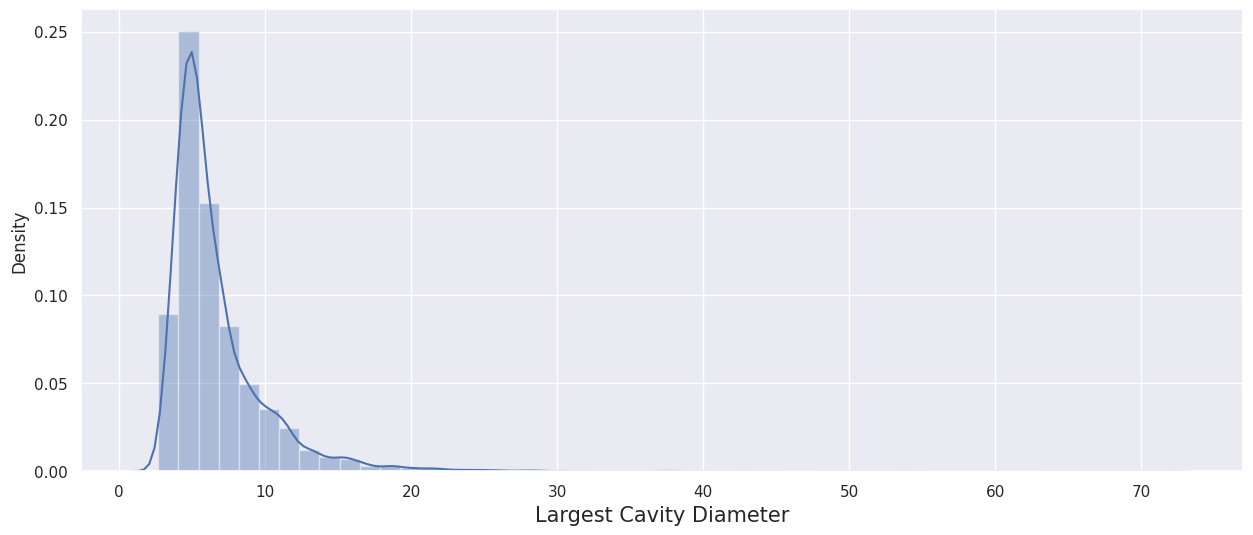

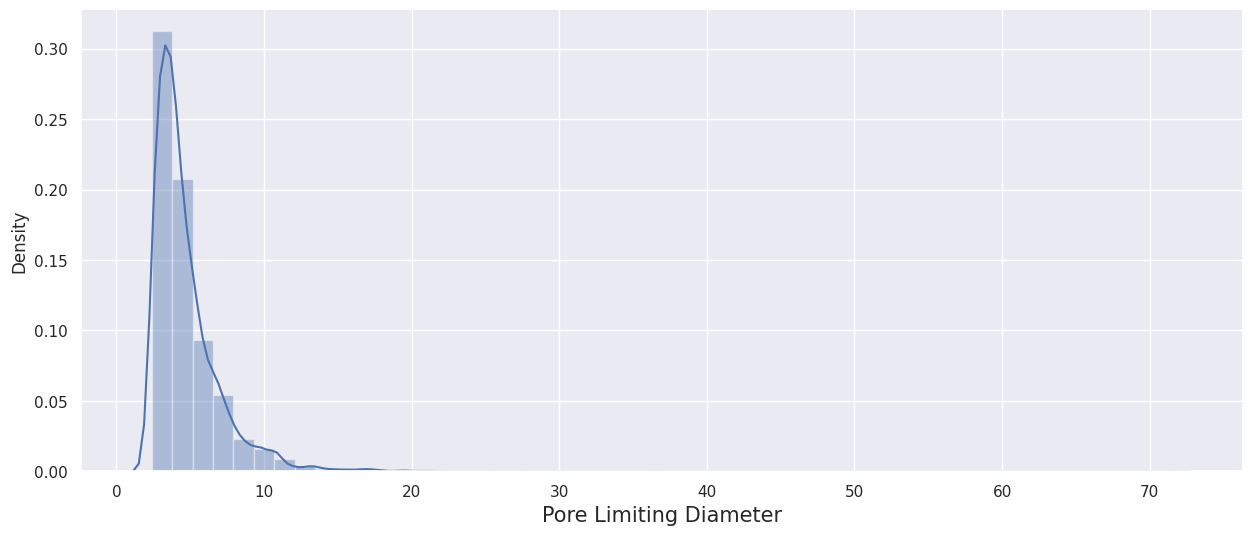

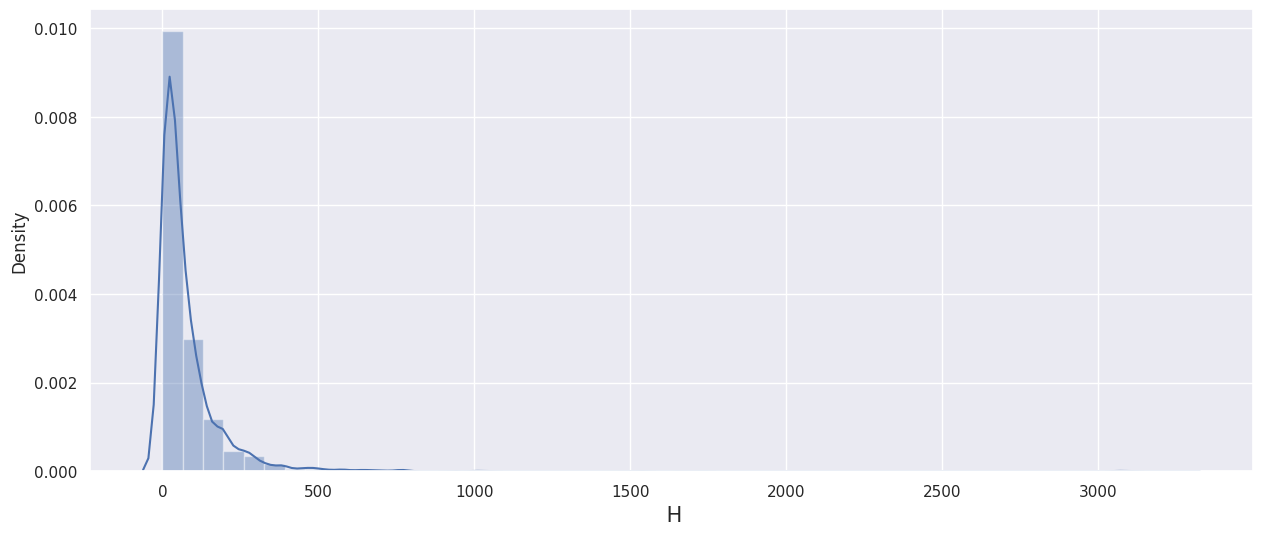

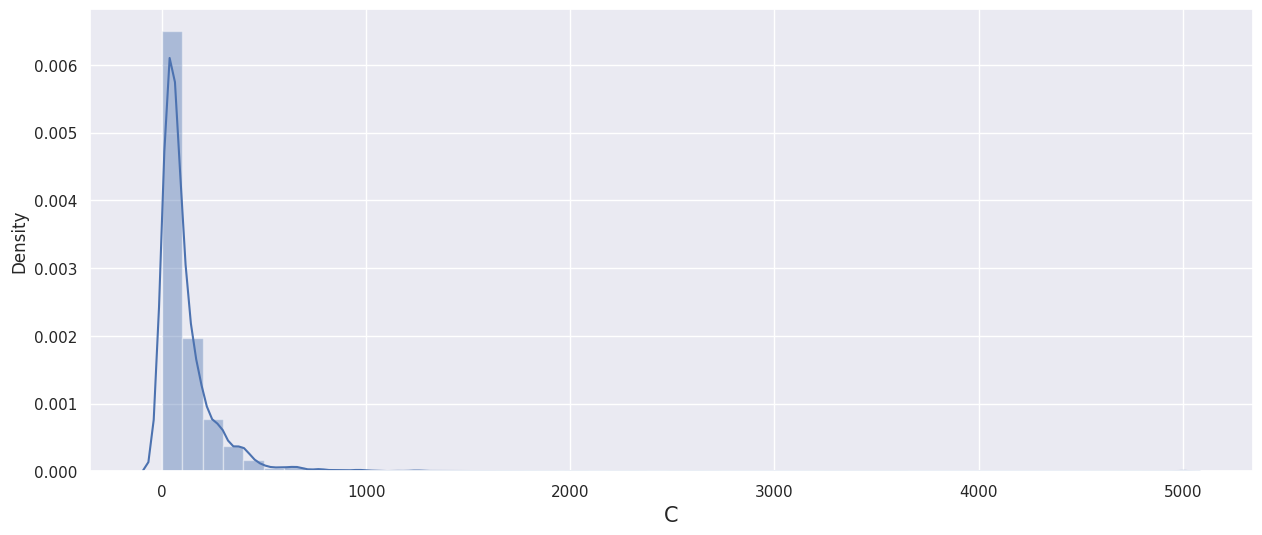

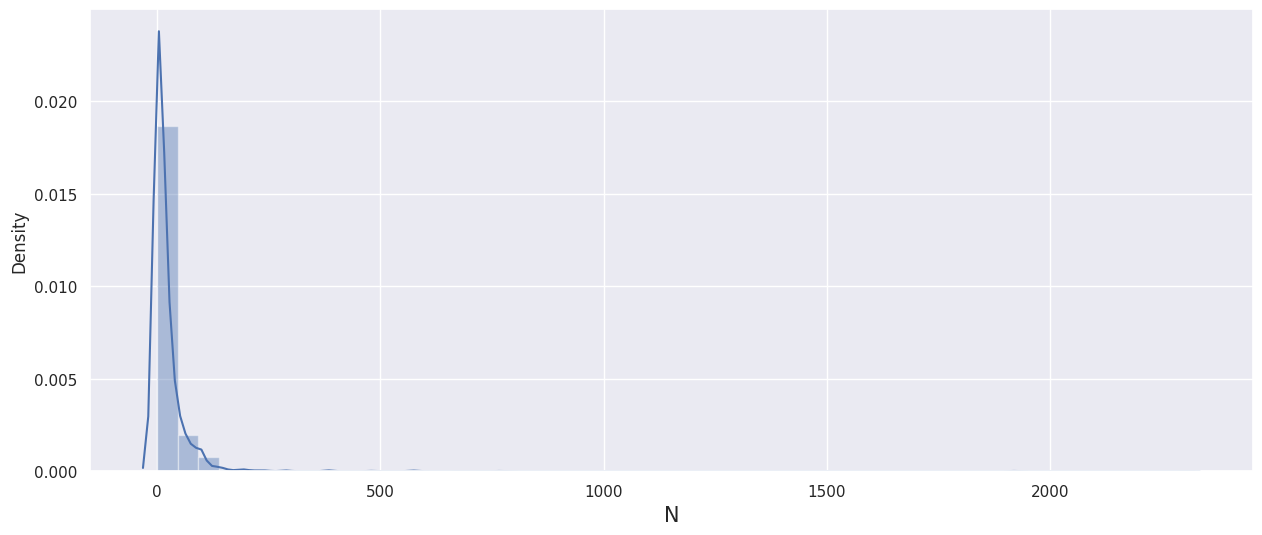

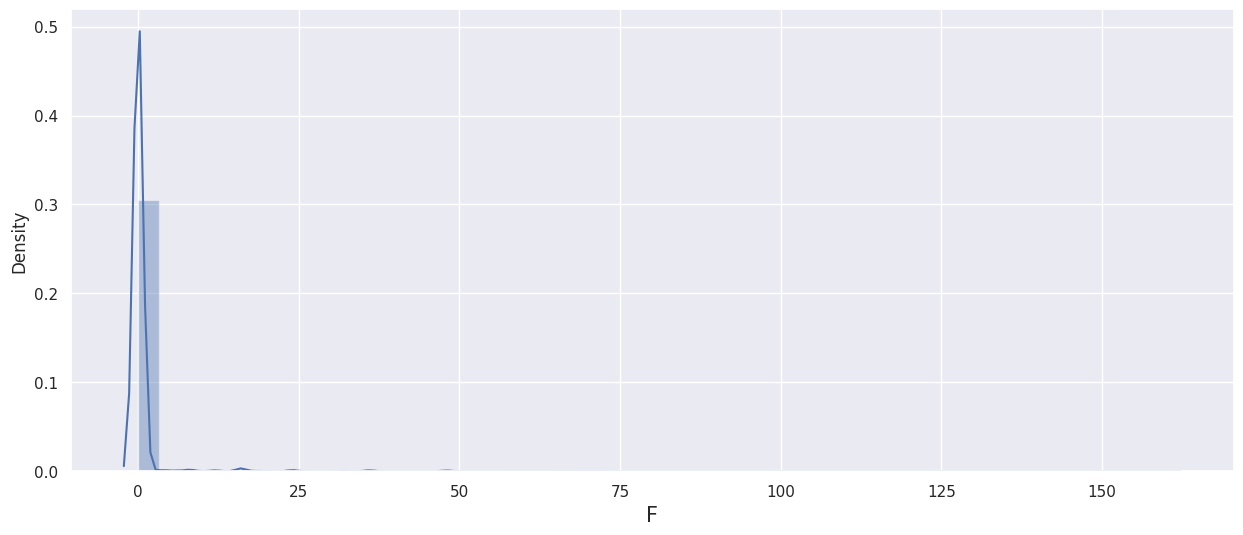

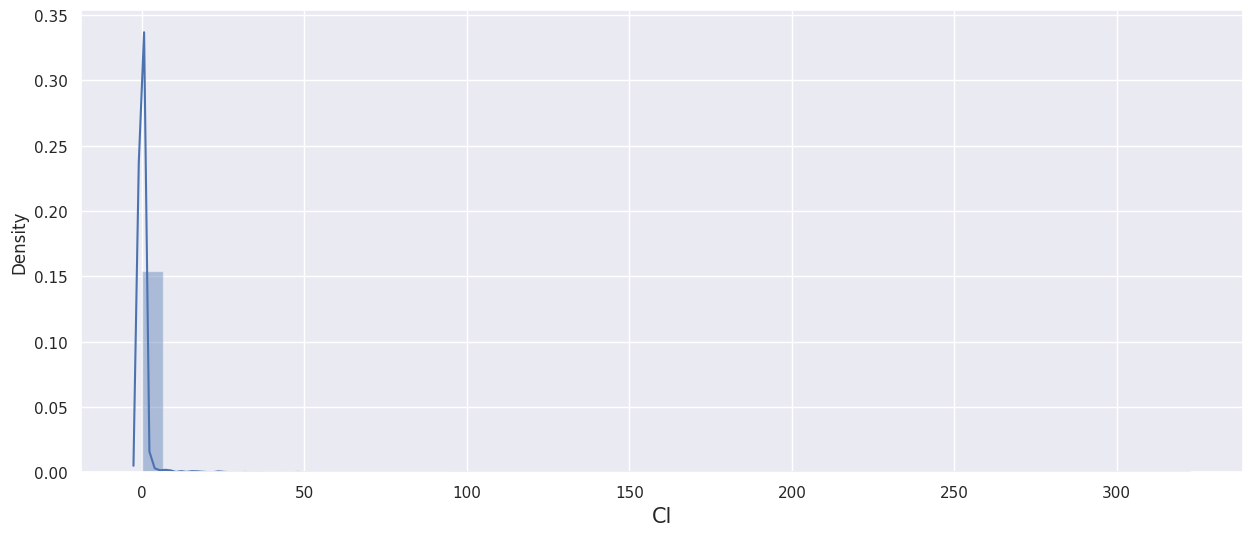

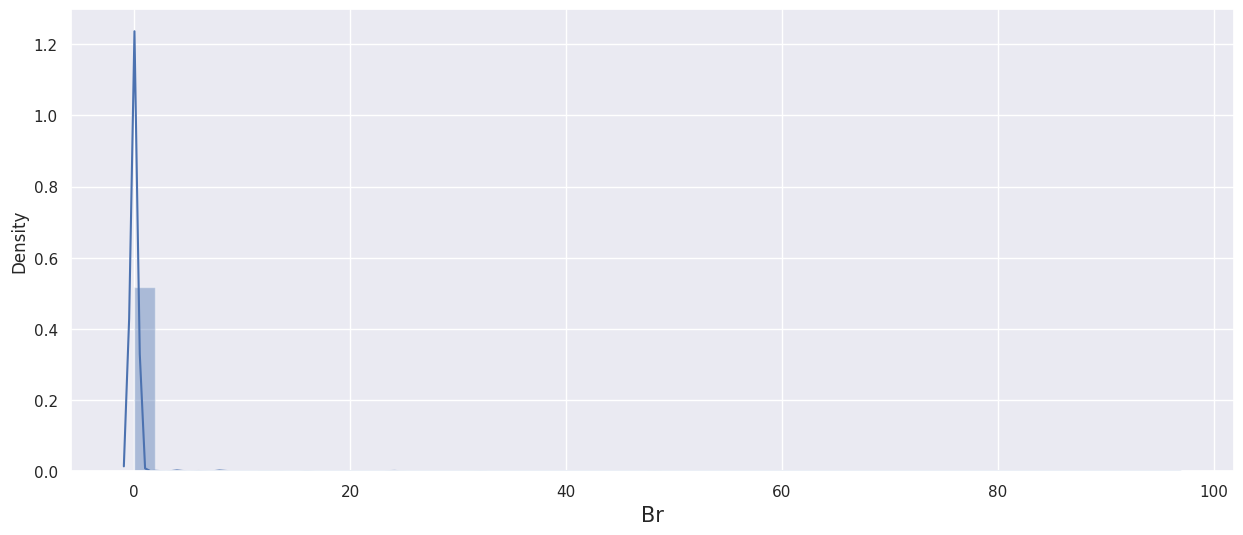

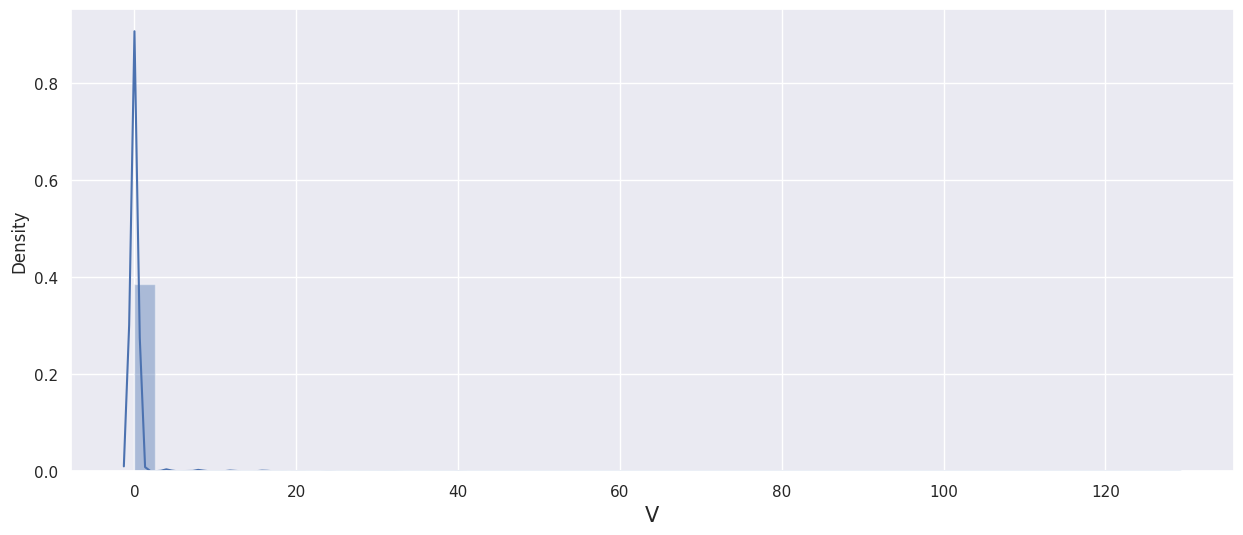

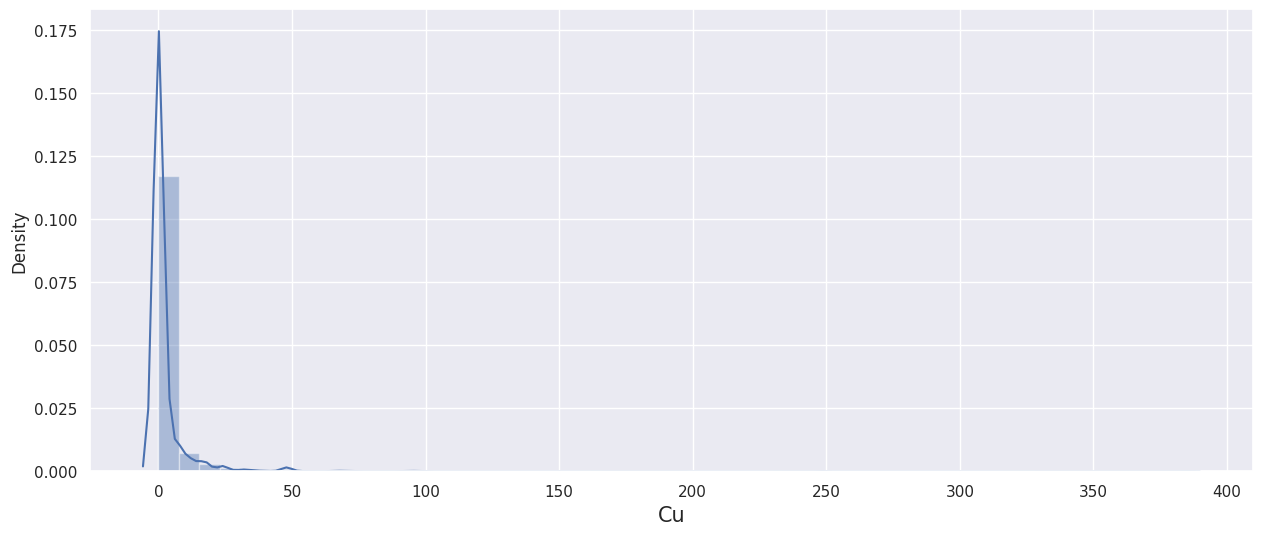

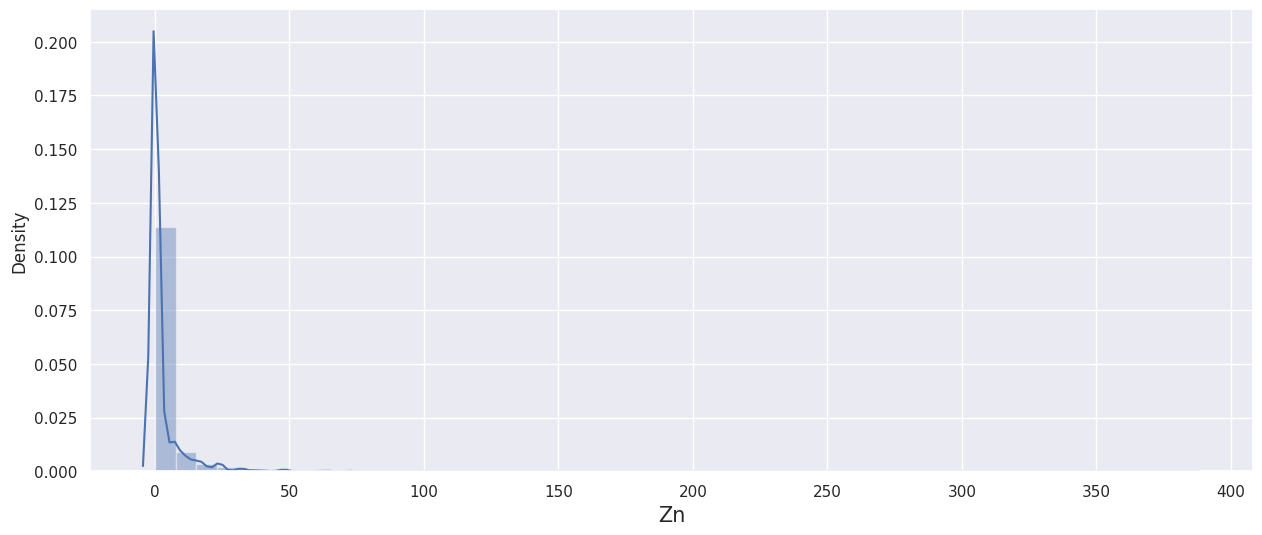

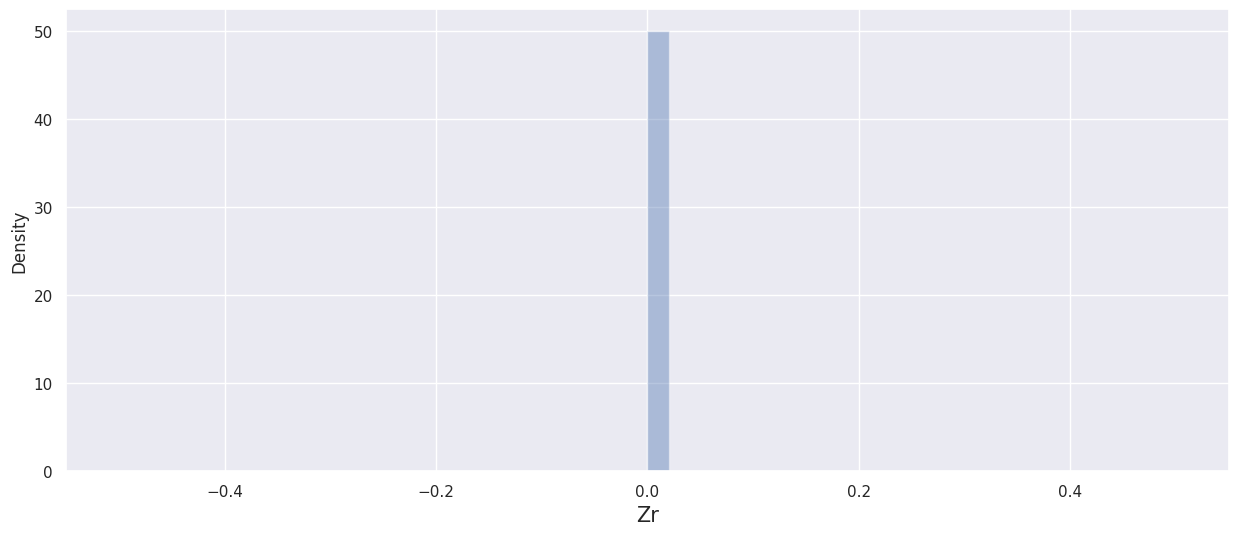

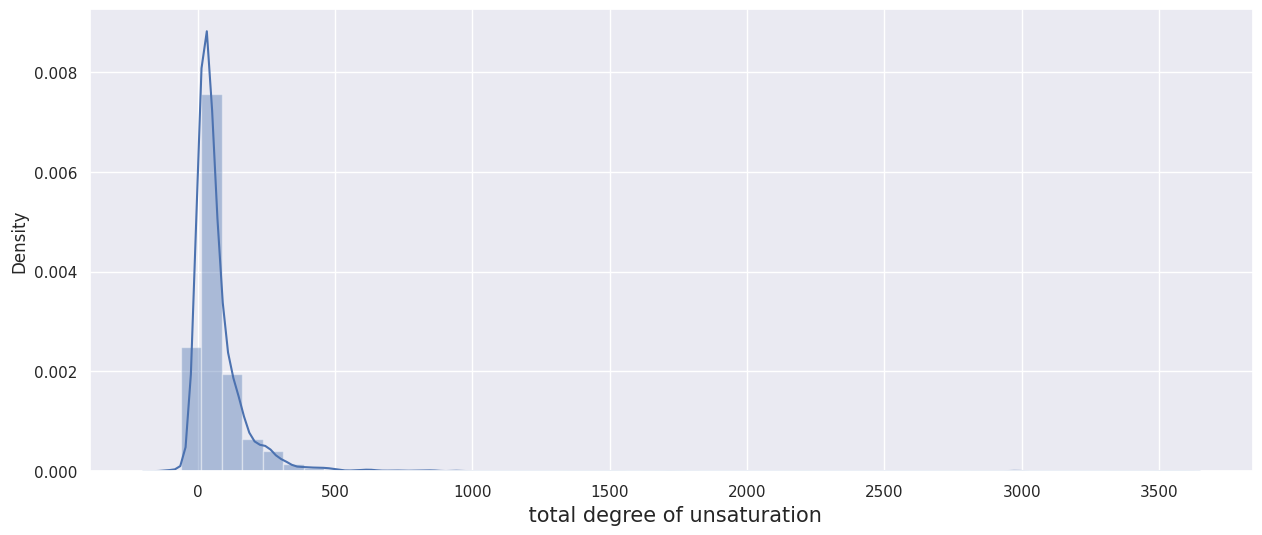

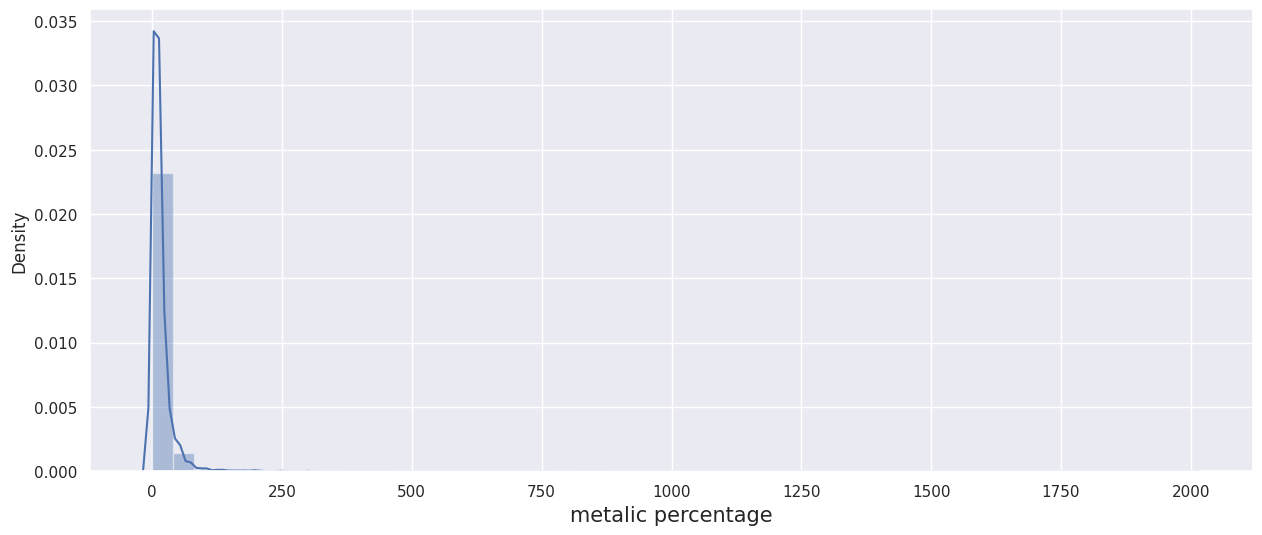

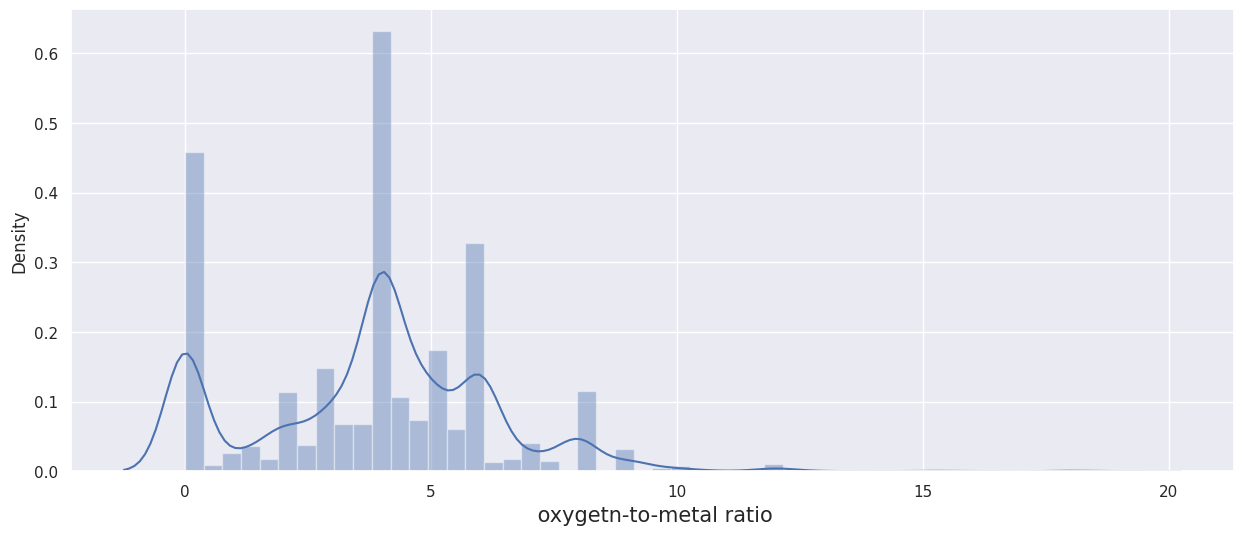

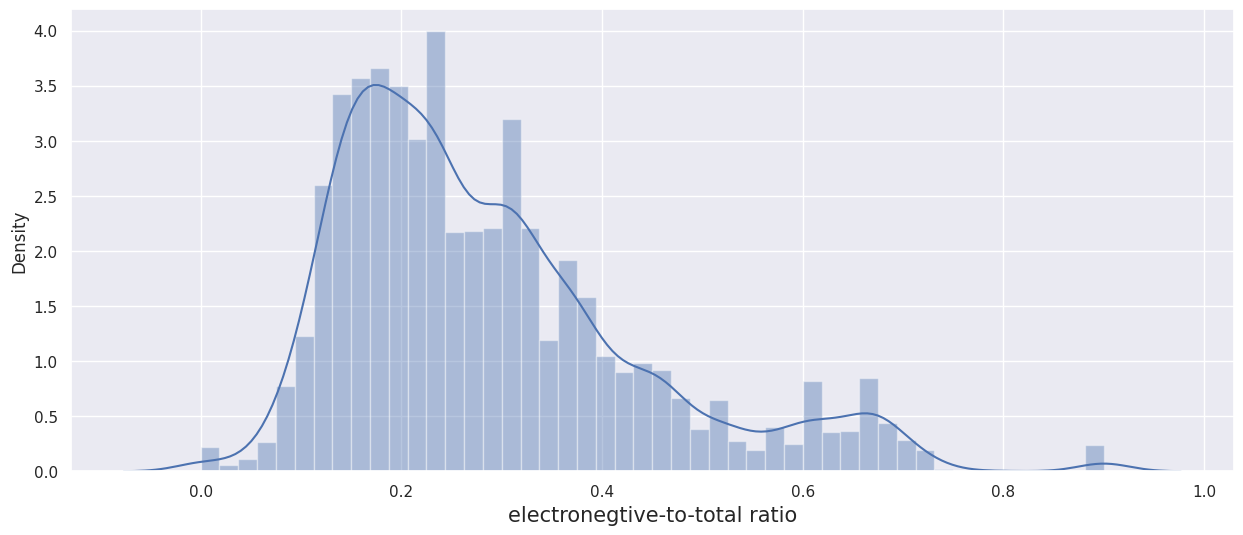

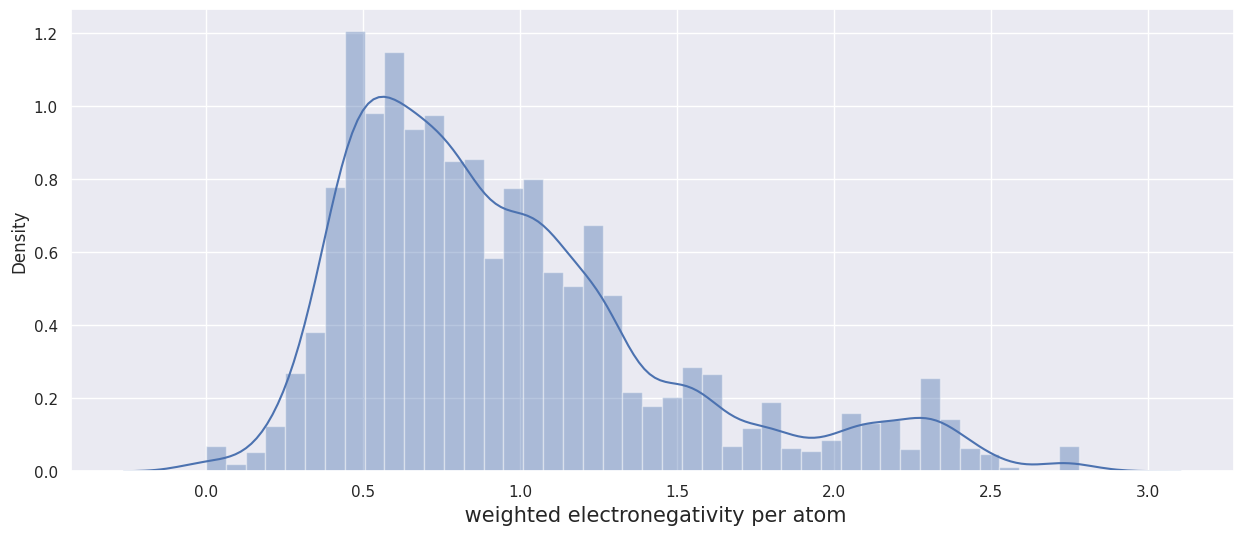

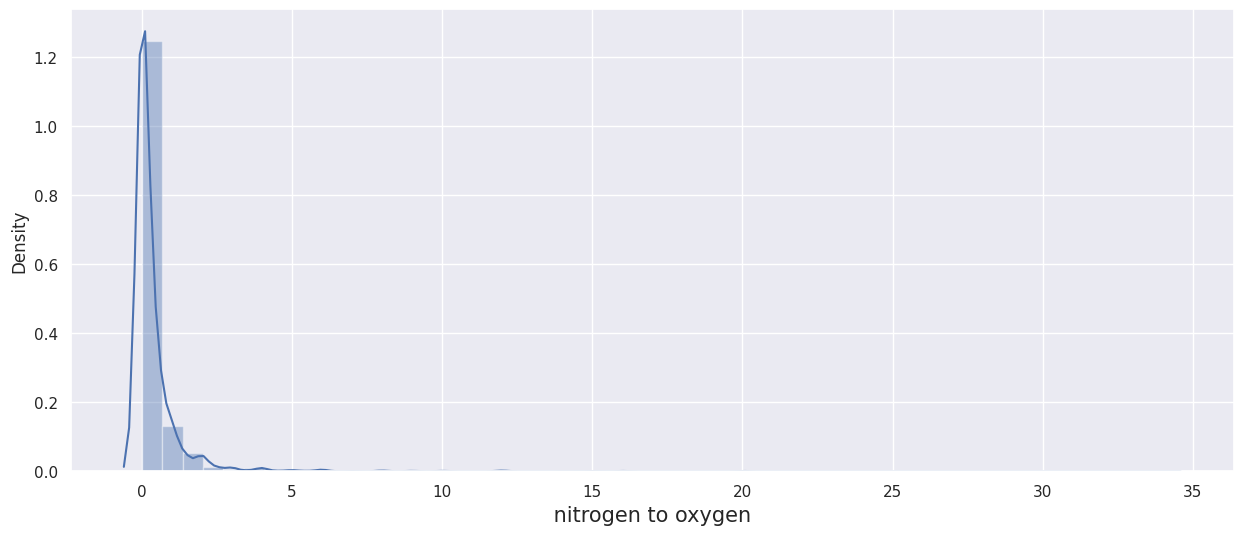

In [134]:
for column in dx.columns:
  plt.figure(figsize=(15,6))
  sns.distplot(dx[column])
  plt.xlabel(column, fontsize= 15)
  plt.plot()

### Checking Multicollinearity

In [135]:
## Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = dx
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(var, i) for i in range(var.shape[1])]
vif["Features"] = dx.columns

In [136]:
vif

VIF                              Features
0     16.745280                               Density
1     44.189790              Gravimetric Surface Area
2     32.696247               Volumetric Surface Area
3     63.725328                         Void Fraction
4     39.650256                           Pore Volume
5     27.710002               Largest Cavity Diameter
6     16.969407                Pore Limiting Diameter
7    937.110542                                     H
8   8435.211143                                     C
9     52.863732                                     N
10     1.979188                                     F
11     2.184152                                    Cl
12     1.157235                                    Br
13     1.020206                                     V
14     1.329349                                    Cu
15     1.333228                                    Zn
16          NaN                                    Zr
17  3787.569825          total degree of unsaturation
18     1.417437                    metalic percentage
19     5.406777                oxygetn-to-metal ratio
20   978.779055         electronegtive-to-total ratio
21   958.369811   weighted electronegativity per atom
22     1.186692                   nitrogen to oxygen

## Segregating Feature and Target Variables

In [243]:
X = dx.values
y1 = dp.iloc[:, -3].values
y2 = dp.iloc[:, -2].values
y3 = dp.iloc[:, -1].values

In [244]:
X.shape

(7664, 23)

In [245]:
y1.shape

(7664,)

## Feature Scaling

In [277]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [278]:
X_sc.shape

(7664, 23)

## Taking Ch4/N2 as Target Varibale

In [279]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y1, test_size = 0.25,
                                                    random_state = 0)

In [280]:
X_train.shape

(5748, 23)

In [281]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
     "Random Forest Regressor": RandomForestRegressor(),
     "Gradient Boosting": GradientBoostingRegressor(),
     "XGBRegressor": XGBRegressor(),
     "CatBoosting Regressor": CatBoostRegressor(verbose=False),
     "AdaBoost Regressor": AdaBoostRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "Support Vector Regressor(RBF)": SVR(kernel="rbf"),
    "Support Vector Regressor(linear)": SVR(kernel="linear"),
    "Nu SVR(rbf)": NuSVR(kernel="rbf")
}

In [282]:
r2_train_score = {}
r2_test_score = {}
def evaluate_model(models):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        r2_train_score[model_name] = r2_score(y_train, y_train_pred)
        r2_test_score[model_name] = r2_score(y_test, y_test_pred)
        
evaluate_model(models)

In [283]:
score = pd.DataFrame(list(zip(models.keys(), r2_train_score.values(), r2_test_score.values())), columns=["Model","r2_train_score", "r2_test_score"])
score

Model  r2_train_score  r2_test_score
0                Linear Regression        0.303912       0.284134
1                            Lasso        0.000000      -0.001516
2            K-Neighbors Regressor        0.729790       0.558962
3                    Decision Tree        1.000000       0.478992
4          Random Forest Regressor        0.961986       0.713444
5                Gradient Boosting        0.701325       0.628500
6                     XGBRegressor        0.964411       0.674280
7            CatBoosting Regressor        0.883185       0.683349
8               AdaBoost Regressor        0.291565       0.221944
9              ExtraTreesRegressor        1.000000       0.718115
10   Support Vector Regressor(RBF)        0.562096       0.532808
11  Support Vector Regressor(Poly)        0.377237     -17.381990
12                     Nu SVR(rbf)        0.571617       0.542583

## Taking CO2/N2 as Target Variable

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y2, test_size = 0.25,
                                                    random_state = 0)

In [285]:
X_train.shape

(5748, 23)

In [286]:
r2_train_score = {}
r2_test_score = {}
def evaluate_model(models):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        r2_train_score[model_name] = r2_score(y_train, y_train_pred)
        r2_test_score[model_name] = r2_score(y_test, y_test_pred)
        
evaluate_model(models)

In [287]:
score = pd.DataFrame(list(zip(models.keys(), r2_train_score.values(), r2_test_score.values())), columns=["Model","r2_train_score", "r2_test_score"])
score

Model  r2_train_score  r2_test_score
0                Linear Regression        0.005973      -0.000404
1                            Lasso        0.005355      -0.000415
2            K-Neighbors Regressor        0.318304       0.012738
3                    Decision Tree        1.000000      -0.001426
4          Random Forest Regressor        0.886664       0.003597
5                Gradient Boosting        0.994895       0.000348
6                     XGBRegressor        0.999997       0.000095
7            CatBoosting Regressor        0.998834       0.001980
8               AdaBoost Regressor        0.988337       0.001504
9              ExtraTreesRegressor        1.000000       0.018888
10   Support Vector Regressor(RBF)       -0.000905      -0.000633
11  Support Vector Regressor(Poly)       -0.000905      -0.000633
12                     Nu SVR(rbf)       -0.000905      -0.000633

## Taking O2/N2 as Target Variable

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y3, test_size = 0.25,
                                                    random_state = 0)

In [293]:
X_train.shape

(5748, 23)

In [294]:
r2_train_score = {}
r2_test_score = {}
def evaluate_model(models):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        r2_train_score[model_name] = r2_score(y_train, y_train_pred)
        r2_test_score[model_name] = r2_score(y_test, y_test_pred)
        
evaluate_model(models)

In [295]:
score = pd.DataFrame(list(zip(models.keys(), r2_train_score.values(), r2_test_score.values())), columns=["Model","r2_train_score", "r2_test_score"])
score

Model  r2_train_score  r2_test_score
0                Linear Regression        0.082282       0.099764
1                            Lasso        0.014221       0.016746
2            K-Neighbors Regressor        0.527702       0.251402
3                    Decision Tree        1.000000       0.502714
4          Random Forest Regressor        0.937500       0.720345
5                Gradient Boosting        0.896995       0.475524
6                     XGBRegressor        0.991862       0.677670
7            CatBoosting Regressor        0.974647       0.596146
8               AdaBoost Regressor        0.522004       0.179568
9              ExtraTreesRegressor        1.000000       0.769146
10   Support Vector Regressor(RBF)        0.110436       0.144317
11  Support Vector Regressor(Poly)        0.046809      -0.673204
12                     Nu SVR(rbf)        0.113027       0.147455

## HyperParameter Tuning

In [298]:
selected_models = score[score["r2_test_score"] > 0.5]["Model"].tolist()

In [297]:
models

['Decision Tree',
 'Random Forest Regressor',
 'XGBRegressor',
 'CatBoosting Regressor',
 'ExtraTreesRegressor']